EDA questions :

Having seen the descriptive stats/top rows, below are a few questions that can be answered using the given data. For this analysis, we will try to answer a few of the questions. Due to a large number of columns present, we will try to answer a few EDA questions one by one, in the process of cleaning the relevant and needed columns and not ending up cleaning all the columns present in the data,

We answer the following questions:

1. What factors are most strongly associated with the price of an Airbnb rental in San Francisco? For example, how does neighborhood affect pricing?

2. What neighborhoods in San Francisco have the highest demand for Airbnb rentals?

3. Can you identify any interesting trends or patterns in the demand for Airbnb rentals in San Francisco over time?

4. Can you predict the occupancy rate and/or price of a given Airbnb listing in San Francisco based on its attributes and availability?

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

!pwd

import os
os.chdir('/content/drive/MyDrive/airbnb-data-analysis')

!pwd

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content
/content/drive/MyDrive/airbnb-data-analysis


In [2]:
# !rm ~/.streamlit/config.toml
# !pip install -q streamlit
# !npm install localtunnel
# !streamlit run /content/drive/MyDrive/airbnb-data-analysis/app.py &>/content/logs.txt &
# !npx localtunnel --port 8501
# !pip install pyngrok
# !pip install streamlit
# !pip install chart_studio

# Airbnb San Francisco Data Analysis

## We will be analyzing Airbnb's trends in San Francisco. We will start off with basic analysis of popular trends and data visualization of such trends.

## Once we have some general idea of how the market breaks down in SF, we can use scikit learn and machine learning to predict prices based on several factors.

In [3]:
!pip install basemap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [5]:
import numpy as np
import pandas as pd
import csv
from collections import Counter
%matplotlib inline
import matplotlib.pyplot as plt
plt.close('all')
# module created by UC Berkeley students
from datascience import *
from mpl_toolkits.basemap import Basemap
import sklearn.metrics as metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.model_selection import cross_validate
from sklearn import linear_model
from sklearn import ensemble
from IPython.core.display import HTML
from datetime import datetime

# set the max rows into 15 for display
# pd.set_option('display.height', 15)
# pd.set_option('display.max_Rows', 15)

listings_file = '/content/drive/MyDrive/airbnb-data-analysis/detailed_listings.csv'

listingorig = pd.read_csv(listings_file)
listingorig.head()

id                          listing_url       scrape_id last_scraped  \
0  144978  https://www.airbnb.com/rooms/144978  20221204162417   2022-12-04   
1     958     https://www.airbnb.com/rooms/958  20221204162417   2022-12-04   
2    5858    https://www.airbnb.com/rooms/5858  20221204162417   2022-12-04   
3    8142    https://www.airbnb.com/rooms/8142  20221204162417   2022-12-04   
4    8339    https://www.airbnb.com/rooms/8339  20221204162417   2022-12-04   

        source                                               name  \
0  city scrape                  Prime Location - Small Basic Room   
1  city scrape              Bright, Modern Garden Unit - 1BR/1BTH   
2  city scrape                                 Creative Sanctuary   
3  city scrape  Friendly Room Apt. Style -UCSF/USF - San Franc...   
4  city scrape                    Historic Alamo Square Victorian   

                                         description  \
0  <b>The space</b><br />This is a small room in ...   
1  Please check local laws re Covid before you re...   
2  We live in a large Victorian house on a quiet ...   
3  Nice and good public transportation.  7 minute...   
4  Pls email before booking. <br />Interior featu...   

                               neighborhood_overview  \
0                                                NaN   
1  Quiet cul de sac in friendly neighborhood<br /...   
2  I love how our neighborhood feels quiet but is...   
3  N Juda Muni, Bus and UCSF Shuttle.<br /><br />...   
4                                                NaN   

                                         picture_url  host_id  ...  \
0  https://a0.muscache.com/pictures/915742/ada9fb...   216682  ...   
1  https://a0.muscache.com/pictures/b7c2a199-4c17...     1169  ...   
2  https://a0.muscache.com/pictures/17714/3a7aea1...     8904  ...   
3  https://a0.muscache.com/pictures/12d8bff0-1698...    21994  ...   
4  https://a0.muscache.com/pictures/miso/Hosting-...    24215  ...   

  review_scores_communication review_scores_location review_scores_value  \
0                        4.81                   4.81                4.66   
1                        4.88                   4.98                4.76   
2                        4.85                   4.77                4.68   
3                        4.78                   4.67                4.67   
4                        5.00                   4.94                4.75   

                     license instant_bookable calculated_host_listings_count  \
0                        NaN                f                              9   
1  City Registration Pending                f                              1   
2                        NaN                f                              1   
3                        NaN                f                             12   
4                STR-0000264                f                              2   

  calculated_host_listings_count_entire_homes  \
0                                           4   
1                                           1   
2                                           1   
3                                           0   
4                                           2   

  calculated_host_listings_count_private_rooms  \
0                                            5   
1                                            0   
2                                            0   
3                                           12   
4                                            0   

  calculated_host_listings_count_shared_rooms reviews_per_month  
0                                           0              0.86  
1                                           0              2.28  
2                                           0              0.67  
3                                           0              0.09  
4                                           0              0.17  

[5 rows x 75 columns]

In [6]:
listingorig.info(verbose = True, null_counts= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6789 entries, 0 to 6788
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            6789 non-null   int64  
 1   listing_url                                   6789 non-null   object 
 2   scrape_id                                     6789 non-null   int64  
 3   last_scraped                                  6789 non-null   object 
 4   source                                        6789 non-null   object 
 5   name                                          6789 non-null   object 
 6   description                                   6739 non-null   object 
 7   neighborhood_overview                         4741 non-null   object 
 8   picture_url                                   6789 non-null   object 
 9   host_id                                       6789 non-null   i

<ipython-input-6-5ec66070a6a7>:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  listingorig.info(verbose = True, null_counts= True)


In [7]:
listingorig.describe()

id     scrape_id       host_id  host_listings_count  \
count  6.789000e+03  6.789000e+03  6.789000e+03          6789.000000   
mean   1.208976e+17  2.022120e+13  1.023542e+08           131.413905   
std    2.589342e+17  0.000000e+00  1.332468e+08           667.079273   
min    9.580000e+02  2.022120e+13  1.169000e+03             1.000000   
25%    1.693015e+07  2.022120e+13  5.805679e+06             1.000000   
50%    3.564333e+07  2.022120e+13  3.601338e+07             3.000000   
75%    5.123414e+07  2.022120e+13  1.565042e+08            14.000000   
max    7.734981e+17  2.022120e+13  4.896232e+08          4559.000000   

       host_total_listings_count  neighbourhood_group_cleansed     latitude  \
count                6789.000000                           0.0  6789.000000   
mean                  164.548682                           NaN    37.768296   
std                   803.755101                           NaN     0.023061   
min                     1.000000                           NaN    37.708370   
25%                     2.000000                           NaN    37.752970   
50%                     4.000000                           NaN    37.772640   
75%                    22.000000                           NaN    37.787430   
max                  7328.000000                           NaN    37.809540   

         longitude  accommodates  bathrooms  ...  review_scores_cleanliness  \
count  6789.000000   6789.000000        0.0  ...                5542.000000   
mean   -122.430186      3.190602        NaN  ...                   4.770016   
std       0.027537      1.950000        NaN  ...                   0.409131   
min    -122.512460      0.000000        NaN  ...                   0.000000   
25%    -122.442880      2.000000        NaN  ...                   4.710000   
50%    -122.423030      2.000000        NaN  ...                   4.910000   
75%    -122.410390      4.000000        NaN  ...                   5.000000   
max    -122.358480     16.000000        NaN  ...                   5.000000   

       review_scores_checkin  review_scores_communication  \
count            5541.000000                  5542.000000   
mean                4.880628                     4.851875   
std                 0.311893                     0.378333   
min                 0.000000                     1.000000   
25%                 4.890000                     4.870000   
50%                 4.980000                     4.980000   
75%                 5.000000                     5.000000   
max                 5.000000                     5.000000   

       review_scores_location  review_scores_value  \
count             5541.000000          5541.000000   
mean                 4.790137             4.664091   
std                  0.388416             0.441526   
min                  0.000000             0.000000   
25%                  4.760000             4.590000   
50%                  4.900000             4.760000   
75%                  5.000000             4.900000   
max                  5.000000             5.000000   

       calculated_host_listings_count  \
count                     6789.000000   
mean                        13.667256   
std                         31.192535   
min                          1.000000   
25%                          1.000000   
50%                          2.000000   
75%                          9.000000   
max                        153.000000   

       calculated_host_listings_count_entire_homes  \
count                                  6789.000000   
mean                                      9.624098   
std                                      30.470613   
min                                       0.000000   
25%                                       0.000000   
50%                                       1.000000   
75%                                       2.000000   
max                                     152.000000   

       calculated_host_listings_count_private_room

In [8]:
listingorig.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [9]:
# import columns we want to drop
columns_to_drop= ['listing_url','scrape_id','last_scraped','picture_url','host_url','host_location','host_about',
                             'host_thumbnail_url','host_picture_url','host_neighbourhood',
                             'host_verifications','neighbourhood',
                             'minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights',
                             'minimum_nights_avg_ntm','maximum_nights_avg_ntm','calendar_last_scraped']

In [10]:
listing = pd.read_csv(listings_file)

### Cleaning up the data

In [11]:
listing.isna().sum()

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
source                                             0
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               1227
Length: 75, dtype: int64

In [12]:
listing.head()

id                          listing_url       scrape_id last_scraped  \
0  144978  https://www.airbnb.com/rooms/144978  20221204162417   2022-12-04   
1     958     https://www.airbnb.com/rooms/958  20221204162417   2022-12-04   
2    5858    https://www.airbnb.com/rooms/5858  20221204162417   2022-12-04   
3    8142    https://www.airbnb.com/rooms/8142  20221204162417   2022-12-04   
4    8339    https://www.airbnb.com/rooms/8339  20221204162417   2022-12-04   

        source                                               name  \
0  city scrape                  Prime Location - Small Basic Room   
1  city scrape              Bright, Modern Garden Unit - 1BR/1BTH   
2  city scrape                                 Creative Sanctuary   
3  city scrape  Friendly Room Apt. Style -UCSF/USF - San Franc...   
4  city scrape                    Historic Alamo Square Victorian   

                                         description  \
0  <b>The space</b><br />This is a small room in ...   
1  Please check local laws re Covid before you re...   
2  We live in a large Victorian house on a quiet ...   
3  Nice and good public transportation.  7 minute...   
4  Pls email before booking. <br />Interior featu...   

                               neighborhood_overview  \
0                                                NaN   
1  Quiet cul de sac in friendly neighborhood<br /...   
2  I love how our neighborhood feels quiet but is...   
3  N Juda Muni, Bus and UCSF Shuttle.<br /><br />...   
4                                                NaN   

                                         picture_url  host_id  ...  \
0  https://a0.muscache.com/pictures/915742/ada9fb...   216682  ...   
1  https://a0.muscache.com/pictures/b7c2a199-4c17...     1169  ...   
2  https://a0.muscache.com/pictures/17714/3a7aea1...     8904  ...   
3  https://a0.muscache.com/pictures/12d8bff0-1698...    21994  ...   
4  https://a0.muscache.com/pictures/miso/Hosting-...    24215  ...   

  review_scores_communication review_scores_location review_scores_value  \
0                        4.81                   4.81                4.66   
1                        4.88                   4.98                4.76   
2                        4.85                   4.77                4.68   
3                        4.78                   4.67                4.67   
4                        5.00                   4.94                4.75   

                     license instant_bookable calculated_host_listings_count  \
0                        NaN                f                              9   
1  City Registration Pending                f                              1   
2                        NaN                f                              1   
3                        NaN                f                             12   
4                STR-0000264                f                              2   

  calculated_host_listings_count_entire_homes  \
0                                           4   
1                                           1   
2                                           1   
3                                           0   
4                                           2   

  calculated_host_listings_count_private_rooms  \
0                                            5   
1                                            0   
2                                            0   
3                                           12   
4                                            0   

  calculated_host_listings_count_shared_rooms reviews_per_month  
0                                           0              0.86  
1                                           0              2.28  
2                                           0              0.67  
3                                           0              0.09  
4                                           0              0.17  

[5 rows x 75 columns]

In [13]:
print(
      round((listing
      .isnull()
      .sum().sort_values())/len(listing.index),2)
      )

id                              0.00
host_has_profile_pic            0.00
availability_60                 0.00
number_of_reviews_ltm           0.00
neighbourhood_cleansed          0.00
                                ... 
host_about                      0.32
license                         0.40
calendar_updated                1.00
neighbourhood_group_cleansed    1.00
bathrooms                       1.00
Length: 75, dtype: float64


In [14]:
listing.nunique()

id                                              6789
listing_url                                     6789
scrape_id                                          1
last_scraped                                       1
source                                             2
                                                ... 
calculated_host_listings_count                    36
calculated_host_listings_count_entire_homes       27
calculated_host_listings_count_private_rooms      26
calculated_host_listings_count_shared_rooms        8
reviews_per_month                                672
Length: 75, dtype: int64

In [15]:
listing.duplicated().sum()

0

In [16]:
listing["id"].unique().shape[0]/listing["id"].shape[0]*100
print("\n-----\n")
listing["host_id"].unique().shape[0]/listing["host_id"].shape[0]*100


-----



53.07114449845338

Because there are a high number of Nan values, I will delete license column.

In [17]:
listing.drop(columns=["license"], axis=1, inplace=True)

**As we can see, We will drop the features that have over 85% of missing values**

In [18]:
listing.drop(['bathrooms', 'calendar_updated'], axis=1, inplace=True)

In [19]:
# #Filling the NaN value in neighbour_group with the respective location name
listing["neighbourhood_group_cleansed"].fillna("San Francisco", inplace=True)
listing.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availabilit

In [20]:
#Also, verifying if the id of the listings is unique and no duplicate listings in the data
listing["id"].nunique() == listing.shape[0]

True

In [21]:
listing = listing.drop(columns = columns_to_drop)

In [22]:
pd.set_option('display.max_rows', listing.shape[0]+1)

In [23]:
# calculate the % missing values
percentage_result = listing.isnull().sum()/listing.shape[0] * 100
# create a DataFrame to show case the result
percentage_result = pd.DataFrame({"columns": percentage_result.keys(), "% missing": percentage_result})
percentage_result.reset_index(drop=True, inplace=True)
percentage_result

columns  % missing
0                                             id   0.000000
1                                         source   0.000000
2                                           name   0.000000
3                                    description   0.736485
4                          neighborhood_overview  30.166446
5                                        host_id   0.000000
6                                      host_name   0.000000
7                                     host_since   0.000000
8                             host_response_time  15.377817
9                             host_response_rate  15.377817
10                          host_acceptance_rate  11.769038
11                             host_is_superhost   0.073649
12                           host_listings_count   0.000000
13                     host_total_listings_count   0.000000
14                          host_has_profile_pic   0.000000
15                        host_identity_verified   0.000000
16                        neighbourhood_cleansed   0.000000
17                  neighbourhood_group_cleansed   0.000000
18                                      latitude   0.000000
19                                     longitude   0.000000
20                                 property_type   0.000000
21                                     room_type   0.000000
22                                  accommodates   0.000000
23                                bathrooms_text   0.147297
24                                      bedrooms  13.521874
25                                          beds   1.811754
26                                     amenities   0.000000
27                                         price   0.000000
28                                minimum_nights   0.000000
29                                maximum_nights   0.000000
30                              has_availability   0.000000
31                               availability_30   0.000000
32                               availability_60   0.000000
33                               availability_90   0.000000
34                              availability_365   0.000000
35                             number_of_reviews   0.000000
36                         number_of_reviews_ltm   0.000000
37                        number_of_reviews_l30d   0.000000
38                                  first_review  18.073354
39                                   last_review  18.073354
40                          review_scores_rating  18.073354
41                        review_scores_accuracy  18.367948
42                     review_scores_cleanliness  18.367948
43                         review_scores_checkin  18.382678
44                   review_scores_communication  18.367948
45                        review_scores_location  18.382678
46                           review_scores_value  18.382678
47                              instant_bookable   0.000000
48                calculated_host_listings_count   0.000000
49   calculated_host_listings_count_entire_homes   0.000000
50  calculated_host_listings_count_private_rooms   0.000000
51   calculated_host_listings_count_shared_rooms   0.000000
52                             reviews_per_month  18.073354

In [24]:
listing.shape

(6789, 53)

Overall missing values in entire dataframe

In [25]:
print("Overall missing values in entire dataframe :: listing.isnull().sum().sum() :: ", listing.isnull().sum().sum())
print("Overall missing values in entire dataframe :: listing.isna().sum().sum() :: ", listing.isna().sum().sum())
print("Overall missing values in entire dataframe :: sum(listing.isnull().values.ravel()) :: ", sum(listing.isnull().values.ravel()))

Overall missing values in entire dataframe :: listing.isnull().sum().sum() ::  18434
Overall missing values in entire dataframe :: listing.isna().sum().sum() ::  18434
Overall missing values in entire dataframe :: sum(listing.isnull().values.ravel()) ::  18434


Number of columns with no missing values in entire dataframe

In [26]:
print("Number of columns with no missing values in entire dataframe :: (listing.isna().sum(axis=0) == 0).sum() :: ", (listing.isna().sum(axis=0) == 0).sum())
print("Number of columns with no missing values in entire dataframe :: (listing.isnull().sum(axis=0) == 0).sum() :: ", (listing.isnull().sum(axis=0) == 0).sum())

Number of columns with no missing values in entire dataframe :: (listing.isna().sum(axis=0) == 0).sum() ::  34
Number of columns with no missing values in entire dataframe :: (listing.isnull().sum(axis=0) == 0).sum() ::  34


Number of columns with at least one missing value in entire dataframe

In [27]:
print("Number of columns with at least one missing value in entire dataframe :: sum([True for idx,col in listing.iteritems() if any(col.isnull())]) :: ", sum([True for idx,col in listing.iteritems() if any(col.isnull())]))
print("Number of columns with at least one missing value in entire dataframe :: listing.isna().sum(axis=0) > 0).sum() :: ", (listing.isna().sum(axis=0) > 0).sum())
sum(map(any, listing.isnull()))

Number of columns with at least one missing value in entire dataframe :: sum([True for idx,col in listing.iteritems() if any(col.isnull())]) ::  19
Number of columns with at least one missing value in entire dataframe :: listing.isna().sum(axis=0) > 0).sum() ::  19


<ipython-input-27-d715e80fceae>:1: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  print("Number of columns with at least one missing value in entire dataframe :: sum([True for idx,col in listing.iteritems() if any(col.isnull())]) :: ", sum([True for idx,col in listing.iteritems() if any(col.isnull())]))


53

Number of rows with no missing values in entire dataframe

In [28]:
print("Number of rows with no missing values in entire dataframe :: (listing.isna().sum(axis=1) == 0).sum() :: ", (listing.isna().sum(axis=1) == 0).sum())
print("Number of rows with no missing values in entire dataframe :: (listing.isnull().sum(axis=1) == 0).sum() :: ", (listing.isnull().sum(axis=1) == 0).sum())

Number of rows with no missing values in entire dataframe :: (listing.isna().sum(axis=1) == 0).sum() ::  3063
Number of rows with no missing values in entire dataframe :: (listing.isnull().sum(axis=1) == 0).sum() ::  3063


Number of rows with at least one missing value in entire dataframe

In [29]:
print("Number of rows with at least one missing value in entire dataframe :: sum([True for idx,row in listing.iterrows() if any(row.isnull())]) :: ", sum([True for idx,row in listing.iterrows() if any(row.isnull())]))
print("Number of rows with at least one missing value in entire dataframe :: (listing.isna().sum(axis=1) > 0).sum() :: ", (listing.isna().sum(axis=1) > 0).sum())

Number of rows with at least one missing value in entire dataframe :: sum([True for idx,row in listing.iterrows() if any(row.isnull())]) ::  3726
Number of rows with at least one missing value in entire dataframe :: (listing.isna().sum(axis=1) > 0).sum() ::  3726


In [30]:
listing[(listing.isna().sum(axis=1) <= 0)].shape

(3063, 53)

In [31]:
listing[(listing.isna().sum(axis=1) > 0)].shape

(3726, 53)

In [32]:
listing.isna().sum()

id                                                 0
source                                             0
name                                               0
description                                       50
neighborhood_overview                           2048
host_id                                            0
host_name                                          0
host_since                                         0
host_response_time                              1044
host_response_rate                              1044
host_acceptance_rate                             799
host_is_superhost                                  5
host_listings_count                                0
host_total_listings_count                          0
host_has_profile_pic                               0
host_identity_verified                             0
neighbourhood_cleansed                             0
neighbourhood_group_cleansed                       0
latitude                                      

In [33]:
# Exploring the data

listing['host_response_time'].value_counts(dropna = False)

within an hour        4034
within a few hours    1136
NaN                   1044
within a day           514
a few days or more      61
Name: host_response_time, dtype: int64

In [34]:
# Exploring the data

listing['host_identity_verified'].value_counts(dropna = False)

t    5939
f     850
Name: host_identity_verified, dtype: int64

In [35]:
# Looking for duplicates (no duplicates found)

df_dups = listing[listing.duplicated()]
df_dups

Empty DataFrame
Columns: [id, source, name, description, neighborhood_overview, host_id, host_name, host_since, host_response_time, host_response_rate, host_acceptance_rate, host_is_superhost, host_listings_count, host_total_listings_count, host_has_profile_pic, host_identity_verified, neighbourhood_cleansed, neighbourhood_group_cleansed, latitude, longitude, property_type, room_type, accommodates, bathrooms_text, bedrooms, beds, amenities, price, minimum_nights, maximum_nights, has_availability, availability_30, availability_60, availability_90, availability_365, number_of_reviews, number_of_reviews_ltm, number_of_reviews_l30d, first_review, last_review, review_scores_rating, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location, review_scores_value, instant_bookable, calculated_host_listings_count, calculated_host_listings_count_entire_homes, calculated_host_listings_count_private_rooms, calculated_host_listings_count_shared_rooms, reviews_per_month]
Index: []

[0 rows x 53 columns]

In [36]:
listing.dropna(subset = ['host_is_superhost'], inplace = True)

***Since there are no NaN in 'host_since', I am directly converting it from object to datetime***

In [37]:
listing['host_since'] = pd.to_datetime(listing['host_since'])

***Replacing NaN from 'host_response_time' & 'bathrooms_text' to 'Unknown'***

Note: I decided to impute 'Unknown' as these missing rows belong to text-based, categorical columns

In [38]:
# listing['host_response_time'].fillna('Unknown', inplace=True)
# listing['bathrooms_text'].fillna('Unknown', inplace=True)

***Handling 'host_response_rate' & 'host_acceptance_rate' columns***

Note: Here is a slightly complex transformation, but necessary in order to be able to correlate these values

1. Removing the % sign from the 'host_response_rate' & 'host_acceptance_rate' columns

In [39]:
listing['host_response_rate'] = listing['host_response_rate'].str.replace('%','')

In [40]:
listing['host_acceptance_rate'] = listing['host_acceptance_rate'].str.replace('%','')

2. Imputing the mean value for both columns (For ease, the mean was calculated in excel / Data type error in Python)

In [41]:
# listing['host_response_rate'].fillna(88, inplace=True)

In [42]:
# listing['host_acceptance_rate'].fillna(88, inplace=True)

3. Changing the data type (from object to int)

In [43]:
listing['host_response_rate'] = listing['host_response_rate'].astype('float64')

In [44]:
listing['host_acceptance_rate'] = listing['host_acceptance_rate'].astype('float64')

In [45]:
# extract the 'prices' from the table
price = listing['price']
prices = []

In [46]:
for element in price:
    element = float(element[1:].replace(',',''))
    prices.append(element)

In [47]:
# # replacing the current column into a new one for future use
listing['price'] = prices

In [48]:
import seaborn as sb

In [49]:
plt.figure(figsize=(20,6))
sb.displot(listing['price'], rug=True)

In [50]:
# calculate the % missing values
percentage_result = listing.isnull().sum()/listing.shape[0] * 100
# create a DataFrame to show case the result
percentage_result = pd.DataFrame({"columns": percentage_result.keys(), "% missing": percentage_result})
percentage_result.reset_index(drop=True, inplace=True)
percentage_result

columns  % missing
0                                             id   0.000000
1                                         source   0.000000
2                                           name   0.000000
3                                    description   0.678066
4                          neighborhood_overview  30.129717
5                                        host_id   0.000000
6                                      host_name   0.000000
7                                     host_since   0.000000
8                             host_response_time  15.374410
9                             host_response_rate  15.374410
10                          host_acceptance_rate  11.777712
11                             host_is_superhost   0.000000
12                           host_listings_count   0.000000
13                     host_total_listings_count   0.000000
14                          host_has_profile_pic   0.000000
15                        host_identity_verified   0.000000
16                        neighbourhood_cleansed   0.000000
17                  neighbourhood_group_cleansed   0.000000
18                                      latitude   0.000000
19                                     longitude   0.000000
20                                 property_type   0.000000
21                                     room_type   0.000000
22                                  accommodates   0.000000
23                                bathrooms_text   0.117925
24                                      bedrooms  13.502358
25                                          beds   1.783608
26                                     amenities   0.000000
27                                         price   0.000000
28                                minimum_nights   0.000000
29                                maximum_nights   0.000000
30                              has_availability   0.000000
31                               availability_30   0.000000
32                               availability_60   0.000000
33                               availability_90   0.000000
34                              availability_365   0.000000
35                             number_of_reviews   0.000000
36                         number_of_reviews_ltm   0.000000
37                        number_of_reviews_l30d   0.000000
38                                  first_review  18.027712
39                                   last_review  18.027712
40                          review_scores_rating  18.027712
41                        review_scores_accuracy  18.322524
42                     review_scores_cleanliness  18.322524
43                         review_scores_checkin  18.337264
44                   review_scores_communication  18.322524
45                        review_scores_location  18.337264
46                           review_scores_value  18.337264
47                              instant_bookable   0.000000
48                calculated_host_listings_count   0.000000
49   calculated_host_listings_count_entire_homes   0.000000
50  calculated_host_listings_count_private_rooms   0.000000
51   calculated_host_listings_count_shared_rooms   0.000000
52                             reviews_per_month  18.027712

In [51]:
pd.reset_option("all")

<ipython-input-51-815ccf52250a>:1: FutureWarning: column_space is deprecated and will be removed in a future version. Use df.to_string(col_space=...) instead.
  pd.reset_option("all")
<ipython-input-51-815ccf52250a>:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead.
  pd.reset_option("all")
<ipython-input-51-815ccf52250a>:1: FutureWarning: 
: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.

  pd.reset_option("all")


In [52]:
listing[["price","minimum_nights","number_of_reviews","calculated_host_listings_count","availability_365"]].describe()

price  minimum_nights  number_of_reviews  \
count   6784.000000     6784.000000        6784.000000   
mean     267.522995       23.571197          48.693986   
std      942.983499       53.765463          94.502349   
min        0.000000        1.000000           0.000000   
25%       99.000000        2.000000           1.000000   
50%      150.000000        6.000000           8.000000   
75%      250.000000       30.000000          49.000000   
max    25000.000000     1125.000000         977.000000   

       calculated_host_listings_count  availability_365  
count                     6784.000000       6784.000000  
mean                        13.676297        173.119546  
std                         31.202248        133.115308  
min                          1.000000          0.000000  
25%                          1.000000         46.000000  
50%                          2.000000        165.000000  
75%                          9.000000        310.000000  
max                        153.000000        365.000000

**Inferences made from the above statistical summary**

**price** - ranges from 0 to 25000, per night. However, 75 percentile of the listings have price <= $250 per night. The data looks to be right tailed.

I should drop the records with zero price, as this is not a valid data based on domain knowledge.

**minimum nights** - ranges from 1 to 1125, with 50 percentile of listings of 6 nights.

I should be dropping the data with minimum nights 1125 as such a listing is an outlier.

**reviews** - There are listings with no reviews to listings with a maximum of 977 reviews. General range of reviews is 1 to 10.

In [53]:
listing.shape

(6784, 53)

In [54]:
#Analysing the price data

listing[listing["price"]==0]["price"].count()

1

***Replacing NaN from 'first_review' & 'last_review' to '1900-01-01'***

Note: I decided to impute '1900-01-01' as it will be easy to see these dates as being just place holders and it will allow me to convert all of the columns values into a date format.

In [55]:
listing['first_review'].fillna('1900-01-01', inplace=True)
listing['last_review'].fillna('1900-01-01', inplace=True)

Now converting the data type to date

In [56]:
listing['first_review'] = pd.to_datetime(listing['first_review'])
listing['last_review'] = pd.to_datetime(listing['last_review'])

***Imputing the mean for 'bedrooms', 'beds' and other continuous variables***

Note: Here I made this choice to be able to use this dataset and find correlations, without changing key metrics.

For 'bedrooms' and 'beds', imputing the mean allows me to still know which values are imputed and which are orginal. For all other continuous variables, imputing the mean won't change the dataset's key metrics but will improve usability.

In [57]:
print(len(listing[listing.review_scores_rating == 0]))
print(len(listing[listing.review_scores_accuracy == 0]))
print(len(listing[listing.review_scores_cleanliness == 0]))
print(len(listing[listing.review_scores_checkin == 0]))
print(len(listing[listing.review_scores_communication == 0]))
print(len(listing[listing.review_scores_location == 0]))
print(len(listing[listing.review_scores_value == 0]))
print(len(listing[listing.reviews_per_month == 0]))
print(len(listing[listing.accommodates == 0]))
print(len(listing[listing.price == 0]))
print(len(listing[listing.minimum_nights > 365]))

18
1
1
1
0
1
1
0
0
1
7


In [58]:
# # excluding listings with "0" for price, bedrooms, etc
listing = listing[listing.price > 0]

In [59]:
listing.shape

(6783, 53)

In [60]:
listing = listing[listing.bedrooms > 0]
listing = listing[listing.beds > 0]
listing = listing[listing.review_scores_rating > 0]
listing = listing[listing.reviews_per_month > 0]
listing = listing[listing.accommodates > 0]

In [61]:
listing.shape

(4696, 53)

In [62]:

listing.describe()

id       host_id  host_response_rate  host_acceptance_rate  \
count  4.696000e+03  4.696000e+03         4070.000000           4312.000000   
mean   9.089598e+16  9.286244e+07           97.622604             88.936688   
std    2.256663e+17  1.290035e+08            9.832416             19.920369   
min    9.580000e+02  1.169000e+03            0.000000              0.000000   
25%    1.190642e+07  4.773429e+06          100.000000             88.000000   
50%    3.112447e+07  2.511642e+07          100.000000             98.000000   
75%    4.906086e+07  1.312004e+08          100.000000            100.000000   
max    7.669620e+17  4.873070e+08          100.000000            100.000000   

       host_listings_count  host_total_listings_count     latitude  \
count          4696.000000                4696.000000  4696.000000   
mean             46.834327                  59.220613    37.764559   
std             373.323164                 426.430282     0.023558   
min               1.000000                   1.000000    37.708370   
25%               1.000000                   2.000000    37.747965   
50%               2.000000                   4.000000    37.765105   
75%               6.000000                   9.000000    37.784042   
max            4559.000000                7328.000000    37.809540   

         longitude  accommodates     bedrooms  ...  review_scores_cleanliness  \
count  4696.000000   4696.000000  4696.000000  ...                4694.000000   
mean   -122.433578      3.325596     1.552811  ...                   4.774631   
std       0.028595      1.996011     0.870399  ...                   0.400039   
min    -122.511360      1.000000     1.000000  ...                   0.000000   
25%    -122.447023      2.000000     1.000000  ...                   4.712500   
50%    -122.427065      3.000000     1.000000  ...                   4.910000   
75%    -122.412328      4.000000     2.000000  ...                   5.000000   
max    -122.358480     16.000000     9.000000  ...                   5.000000   

       review_scores_checkin  review_scores_communication  \
count            4693.000000                  4694.000000   
mean                4.886866                     4.866219   
std                 0.300629                     0.350621   
min                 0.000000                     1.000000   
25%                 4.900000                     4.880000   
50%                 4.980000                     4.980000   
75%                 5.000000                     5.000000   
max                 5.000000                     5.000000   

       review_scores_location  review_scores_value  \
count             4693.000000          4693.000000   
mean                 4.803505             4.678483   
std                  0.346808             0.425082   
min                  0.000000             0.000000   
25%                  4.770000             4.600000   
50%                  4.900000             4.770000   
75%                  5.000000             4.900000   
max                  5.000000             5.000000   

       calculated_host_listings_count  \
count                     4696.000000   
mean                         6.745102   
std                         17.546833   
min                          1.000000   
25%                          1.000000   
50%                          2.000000   
75%                          4.000000   
max                        153.000000   

       calculated_host_listings_count_entire_homes  \
count                                  4696.000000   
mean                                      3.963373   
std                                      16.413466   
min                                       0.000000   
25%                                       0.000000   
50%                                       1.000000   
75%                                       2.000000   
max                                     152.000000   

       calculated_host_listings_count_private_room

In [63]:
print(len(listing[listing.review_scores_rating == 0]))
print(len(listing[listing.review_scores_accuracy == 0]))
print(len(listing[listing.review_scores_cleanliness == 0]))
print(len(listing[listing.review_scores_checkin == 0]))
print(len(listing[listing.review_scores_communication == 0]))
print(len(listing[listing.review_scores_location == 0]))
print(len(listing[listing.review_scores_value == 0]))
print(len(listing[listing.reviews_per_month == 0]))
print(len(listing[listing.accommodates == 0]))
print(len(listing[listing.price == 0]))
print(len(listing[listing.minimum_nights > 365]))
print(len(listing[listing.bedrooms == 0]))
print(len(listing[listing.beds == 0]))

0
1
1
1
0
1
1
0
0
0
6
0
0


In [64]:
listing.shape

(4696, 53)

In [65]:
listing[listing["price"]==0]["price"].count()

0

In [66]:
listing["price"].min()

10.0

In [67]:
plt.figure(figsize=(20,6))
sb.displot(listing['price'], rug=True)

In [68]:
plt.figure(figsize=(20,6))
sb.histplot(listing['price'])

<AxesSubplot: xlabel='price', ylabel='Count'>

In [69]:
listing.price.describe()

count     4696.000000
mean       242.693143
std        653.676135
min         10.000000
25%        100.000000
50%        150.000000
75%        250.000000
max      25000.000000
Name: price, dtype: float64

**Cleaning the minimum nights outliers**

Dropping the records whose minimum nights is more than 365 days. As general lease agreement is not more than a year long.

In [70]:
listing.minimum_nights.describe()

count    4696.000000
mean       19.417164
std        46.227119
min         1.000000
25%         2.000000
50%         4.000000
75%        30.000000
max      1125.000000
Name: minimum_nights, dtype: float64

In [71]:
#Analysing the records count whose minimum_nights is greater than 365
listing[listing["minimum_nights"]>365].shape[0]

6

In [72]:
# #dropping the outlier whose minimum nights is greater than 365
listing = listing[listing["minimum_nights"]<=365]

In [73]:
listing.shape

(4690, 53)

In [74]:
listing["minimum_nights"].max()

365

In [75]:
listing.columns

Index(['id', 'source', 'name', 'description', 'neighborhood_overview',
       'host_id', 'host_name', 'host_since', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_listings_count', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_s

In [76]:
listing.isna().sum()

id                                                 0
source                                             0
name                                               0
description                                       19
neighborhood_overview                           1113
host_id                                            0
host_name                                          0
host_since                                         0
host_response_time                               620
host_response_rate                               620
host_acceptance_rate                             379
host_is_superhost                                  0
host_listings_count                                0
host_total_listings_count                          0
host_has_profile_pic                               0
host_identity_verified                             0
neighbourhood_cleansed                             0
neighbourhood_group_cleansed                       0
latitude                                      

In [77]:
listing.describe()

id       host_id  host_response_rate  host_acceptance_rate  \
count  4.690000e+03  4.690000e+03         4070.000000           4311.000000   
mean   9.101226e+16  9.297332e+07           97.622604             88.957318   
std    2.257871e+17  1.290486e+08            9.832416             19.876557   
min    9.580000e+02  1.169000e+03            0.000000              0.000000   
25%    1.195827e+07  4.811219e+06          100.000000             88.000000   
50%    3.112525e+07  2.513549e+07          100.000000             98.000000   
75%    4.906251e+07  1.312004e+08          100.000000            100.000000   
max    7.669620e+17  4.873070e+08          100.000000            100.000000   

       host_listings_count  host_total_listings_count     latitude  \
count          4690.000000                4690.000000  4690.000000   
mean             46.891684                  59.292537    37.764557   
std             373.558489                 426.698276     0.023567   
min               1.000000                   1.000000    37.708370   
25%               1.000000                   2.000000    37.747955   
50%               2.000000                   4.000000    37.765125   
75%               6.000000                   9.000000    37.784047   
max            4559.000000                7328.000000    37.809540   

         longitude  accommodates     bedrooms  ...  review_scores_cleanliness  \
count  4690.000000   4690.000000  4690.000000  ...                4688.000000   
mean   -122.433591      3.326439     1.553305  ...                   4.774520   
std       0.028597      1.996864     0.870744  ...                   0.400206   
min    -122.511360      1.000000     1.000000  ...                   0.000000   
25%    -122.447047      2.000000     1.000000  ...                   4.710000   
50%    -122.427070      3.000000     1.000000  ...                   4.910000   
75%    -122.412395      4.000000     2.000000  ...                   5.000000   
max    -122.358480     16.000000     9.000000  ...                   5.000000   

       review_scores_checkin  review_scores_communication  \
count            4687.000000                  4688.000000   
mean                4.886763                     4.866165   
std                 0.300796                     0.350798   
min                 0.000000                     1.000000   
25%                 4.900000                     4.880000   
50%                 4.980000                     4.980000   
75%                 5.000000                     5.000000   
max                 5.000000                     5.000000   

       review_scores_location  review_scores_value  \
count             4687.000000          4687.000000   
mean                 4.803636             4.678419   
std                  0.346927             0.425290   
min                  0.000000             0.000000   
25%                  4.770000             4.600000   
50%                  4.900000             4.770000   
75%                  5.000000             4.900000   
max                  5.000000             5.000000   

       calculated_host_listings_count  \
count                     4690.000000   
mean                         6.751173   
std                         17.557198   
min                          1.000000   
25%                          1.000000   
50%                          2.000000   
75%                          4.000000   
max                        153.000000   

       calculated_host_listings_count_entire_homes  \
count                                  4690.000000   
mean                                      3.967804   
std                                      16.423486   
min                                       0.000000   
25%                                       0.000000   
50%                                       1.000000   
75%                                       2.000000   
max                                     152.000000   

       calculated_host_listings_count_private_room

In [78]:
# Checking the mean of each continuous variables with missing values

listing[['bedrooms','beds','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication',
         'review_scores_location','review_scores_value','reviews_per_month']].mean()

bedrooms                       1.553305
beds                           1.904478
review_scores_rating           4.783625
review_scores_accuracy         4.824102
review_scores_cleanliness      4.774520
review_scores_checkin          4.886763
review_scores_communication    4.866165
review_scores_location         4.803636
review_scores_value            4.678419
reviews_per_month              1.446723
dtype: float64

In [79]:
# Replacing continuous variables' missing values with their respective mean value.
# listing['bedrooms'].fillna(1.55, inplace=True)
# listing['beds'].fillna(1.8, inplace=True)
# listing['review_scores_rating'].fillna(4.75, inplace=True)
# listing['review_scores_accuracy'].fillna(4.82, inplace=True)
# listing['review_scores_cleanliness'].fillna(4.77, inplace=True)
# listing['review_scores_checkin'].fillna(4.88, inplace=True)
# listing['review_scores_communication'].fillna(4.86, inplace=True)
# listing['review_scores_location'].fillna(4.8, inplace=True)
# listing['review_scores_value'].fillna(4.67, inplace=True)
# listing['reviews_per_month'].fillna(1.37, inplace=True)

In [80]:
#Change f/t values to binary 0/1
listing['host_is_superhost'].replace('t',1, inplace=True)
listing['host_is_superhost'].replace('f',0, inplace=True)
listing['instant_bookable'].replace('t',1, inplace=True)
listing['instant_bookable'].replace('f',0, inplace=True)
listing['host_has_profile_pic'].replace('t',1, inplace=True)
listing['host_has_profile_pic'].replace('f',0, inplace=True)
listing['host_identity_verified'].replace('t',1, inplace=True)
listing['host_identity_verified'].replace('f',0, inplace=True)
listing['has_availability'].replace('t',1, inplace=True)
listing['has_availability'].replace('f',0, inplace=True)

In [81]:
listing.has_availability.unique()

array([1, 0])

In [82]:
listing.has_availability.value_counts()

1    4619
0      71
Name: has_availability, dtype: int64

In [83]:
listing['data_date']= datetime.strptime('2022-12-04', '%Y-%m-%d')
listing['host_months'] = round((listing['data_date']-listing['host_since']).dt.days/30,0)
#Drop original host_since and data_date variables
# listing = listing.drop(['data_date', 'host_since'], axis=1)

In [84]:
listing.isna().sum()

id                                                 0
source                                             0
name                                               0
description                                       19
neighborhood_overview                           1113
host_id                                            0
host_name                                          0
host_since                                         0
host_response_time                               620
host_response_rate                               620
host_acceptance_rate                             379
host_is_superhost                                  0
host_listings_count                                0
host_total_listings_count                          0
host_has_profile_pic                               0
host_identity_verified                             0
neighbourhood_cleansed                             0
neighbourhood_group_cleansed                       0
latitude                                      

In [85]:
listing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4690 entries, 0 to 6788
Data columns (total 55 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            4690 non-null   int64         
 1   source                                        4690 non-null   object        
 2   name                                          4690 non-null   object        
 3   description                                   4671 non-null   object        
 4   neighborhood_overview                         3577 non-null   object        
 5   host_id                                       4690 non-null   int64         
 6   host_name                                     4690 non-null   object        
 7   host_since                                    4690 non-null   datetime64[ns]
 8   host_response_time                            4070 non-null   object

**Visualizing Missing Data**

Visualization of missing values in each column

In [86]:
!pip install missingno

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [87]:
import missingno as msno
msno.bar(listingorig);

In [88]:
msno.bar(listing);

In [89]:
pd.set_option('display.max_rows', listing.shape[0]+1)

In [90]:
# calculate the % missing values
percentage_result = listing.isnull().sum()/listing.shape[0] * 100
# create a DataFrame to show case the result
percentage_result = pd.DataFrame({"columns": percentage_result.keys(), "% missing": percentage_result})
percentage_result.reset_index(drop=True, inplace=True)
percentage_result

columns  % missing
0                                             id   0.000000
1                                         source   0.000000
2                                           name   0.000000
3                                    description   0.405117
4                          neighborhood_overview  23.731343
5                                        host_id   0.000000
6                                      host_name   0.000000
7                                     host_since   0.000000
8                             host_response_time  13.219616
9                             host_response_rate  13.219616
10                          host_acceptance_rate   8.081023
11                             host_is_superhost   0.000000
12                           host_listings_count   0.000000
13                     host_total_listings_count   0.000000
14                          host_has_profile_pic   0.000000
15                        host_identity_verified   0.000000
16                        neighbourhood_cleansed   0.000000
17                  neighbourhood_group_cleansed   0.000000
18                                      latitude   0.000000
19                                     longitude   0.000000
20                                 property_type   0.000000
21                                     room_type   0.000000
22                                  accommodates   0.000000
23                                bathrooms_text   0.106610
24                                      bedrooms   0.000000
25                                          beds   0.000000
26                                     amenities   0.000000
27                                         price   0.000000
28                                minimum_nights   0.000000
29                                maximum_nights   0.000000
30                              has_availability   0.000000
31                               availability_30   0.000000
32                               availability_60   0.000000
33                               availability_90   0.000000
34                              availability_365   0.000000
35                             number_of_reviews   0.000000
36                         number_of_reviews_ltm   0.000000
37                        number_of_reviews_l30d   0.000000
38                                  first_review   0.000000
39                                   last_review   0.000000
40                          review_scores_rating   0.000000
41                        review_scores_accuracy   0.042644
42                     review_scores_cleanliness   0.042644
43                         review_scores_checkin   0.063966
44                   review_scores_communication   0.042644
45                        review_scores_location   0.063966
46                           review_scores_value   0.063966
47                              instant_bookable   0.000000
48                calculated_host_listings_count   0.000000
49   calculated_host_listings_count_entire_homes   0.000000
50  calculated_host_listings_count_private_rooms   0.000000
51   calculated_host_listings_count_shared_rooms   0.000000
52                             reviews_per_month   0.000000
53                                     data_date   0.000000
54                                   host_months   0.000000

In [91]:
pd.reset_option("all")

<ipython-input-91-815ccf52250a>:1: FutureWarning: column_space is deprecated and will be removed in a future version. Use df.to_string(col_space=...) instead.
  pd.reset_option("all")
<ipython-input-91-815ccf52250a>:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead.
  pd.reset_option("all")
<ipython-input-91-815ccf52250a>:1: FutureWarning: 
: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.

  pd.reset_option("all")


Heatmap to see correlation of data between columns

In [92]:
msno.heatmap(listingorig);

In [93]:
pd.set_option('display.max_rows', listingorig.shape[0]+1)

In [94]:
pd.reset_option("all")

<ipython-input-94-815ccf52250a>:1: FutureWarning: column_space is deprecated and will be removed in a future version. Use df.to_string(col_space=...) instead.
  pd.reset_option("all")
<ipython-input-94-815ccf52250a>:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead.
  pd.reset_option("all")
<ipython-input-94-815ccf52250a>:1: FutureWarning: 
: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.

  pd.reset_option("all")


In [95]:
msno.heatmap(listing);

In [96]:
listing.drop('source', axis=1, inplace=True)

In [97]:
listing.columns

Index(['id', 'name', 'description', 'neighborhood_overview', 'host_id',
       'host_name', 'host_since', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms_text',
       'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights',
       'maximum_nights', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'in

In [98]:
listing.corr()

<ipython-input-98-c333f7400c6c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  listing.corr()


id   host_id  \
id                                            1.000000  0.273018   
host_id                                       0.273018  1.000000   
host_response_rate                            0.019001 -0.012834   
host_acceptance_rate                          0.083673  0.130295   
host_is_superhost                            -0.076129 -0.076351   
host_listings_count                          -0.022730  0.004018   
host_total_listings_count                    -0.017262  0.002018   
host_has_profile_pic                         -0.010871 -0.007650   
host_identity_verified                       -0.013502 -0.125341   
latitude                                     -0.030716  0.037785   
longitude                                    -0.027001 -0.038845   
accommodates                                  0.060676 -0.014000   
bedrooms                                      0.035131 -0.053391   
beds                                          0.020701 -0.030289   
price                                        -0.002441  0.029177   
minimum_nights                               -0.075807 -0.032468   
maximum_nights                               -0.009887 -0.012374   
has_availability                              0.049981 -0.001647   
availability_30                               0.049960  0.109226   
availability_60                               0.063604  0.117780   
availability_90                               0.067424  0.119758   
availability_365                              0.036294  0.068497   
number_of_reviews                            -0.208088 -0.141651   
number_of_reviews_ltm                        -0.067359  0.118540   
number_of_reviews_l30d                        0.117926  0.136037   
review_scores_rating                          0.025331 -0.080216   
review_scores_accuracy                       -0.000582 -0.074393   
review_scores_cleanliness                     0.041027 -0.037834   
review_scores_checkin                         0.030140 -0.051486   
review_scores_communication                   0.024909 -0.070393   
review_scores_location                       -0.029314 -0.073910   
review_scores_value                           0.029485 -0.061577   
instant_bookable                              0.029222  0.176007   
calculated_host_listings_count               -0.033403 -0.014360   
calculated_host_listings_count_entire_homes  -0.010126 -0.044445   
calculated_host_listings_count_private_rooms -0.048145  0.058506   
calculated_host_listings_count_shared_rooms  -0.037370  0.021464   
reviews_per_month                             0.143772  0.187139   
host_months                                  -0.231963 -0.915542   

                                              host_response_rate  \
id                                                      0.019001   
host_id                                                -0.012834   
host_response_rate                                      1.000000   
host_acceptance_rate                                    0.261470   
host_is_superhost                                       0.145944   
host_listings_count                                     0.014676   
host_total_listings_count                               0.013966   
host_has_profile_pic                                    0.032681   
host_identity_verified                                 -0.011362   
latitude                                               -0.021508   
longitude                                              -0.036805   
accommodates                                            0.020008   
bedrooms                                               -0.004094   
beds                                                    0.006701   
price                                                   0.003374   
minimum_nights                                         -0.073758   
maximum_nights                                          0.001558   
has_availability                                       -0.005362   
availability_30                        

In [99]:
len(listingorig.columns)

75

In [100]:
len(listing.columns)

54

In [101]:
listing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4690 entries, 0 to 6788
Data columns (total 54 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            4690 non-null   int64         
 1   name                                          4690 non-null   object        
 2   description                                   4671 non-null   object        
 3   neighborhood_overview                         3577 non-null   object        
 4   host_id                                       4690 non-null   int64         
 5   host_name                                     4690 non-null   object        
 6   host_since                                    4690 non-null   datetime64[ns]
 7   host_response_time                            4070 non-null   object        
 8   host_response_rate                            4070 non-null   float6

In [102]:
import seaborn as sns

In [103]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif_(X):
    
    '''X - pandas dataframe'''
    thresh = 10.0
    print("vif_threshold :: ", thresh)
    variables = list(range(X.shape[1]))
    
    print("variables :: ", variables)

    for i in variables:
        print("i :: ", i)
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc]

    print('Remaining variables:')
    print(X.columns[variables])
    return X

from joblib import Parallel, delayed
from statsmodels.stats.outliers_influence import variance_inflation_factor

def removeMultiColl(data, vif_threshold = 5.0):
    print("vif_threshold :: ", vif_threshold)
    for i in data.columns:
        if data[i].nunique() == 1:
            print(f"Dropping {i} due to just 1 unique value")
            data.drop(columns = i, inplace = True)
    drop = True
    col_list = list(data.columns)
    print("col_list :: ", col_list)
    while drop == True:
        drop = False
        vif_list = Parallel(n_jobs = -1, verbose = 5)(delayed(variance_inflation_factor)(data[col_list].values, i) for i in range(data[col_list].shape[1]))
        print("vif_list :: ", vif_list)
        max_index = vif_list.index(max(vif_list))
        print("max_index :: ", max_index)
        if vif_list[max_index] > vif_threshold:
            print("vif_list[max_index] :: ", vif_list[max_index])
            print(f"Dropping column : {col_list[max_index]} at index - {max_index}")
            del col_list[max_index]
            drop = True
    print("Remaining columns :\n", list(data[col_list].columns))
    return data[col_list]

listing_droppedcopy = listing.apply(pd.to_numeric, errors='ignore').info()
listing_droppedcopy = listing.apply(pd.to_numeric, errors='ignore')
print("listing_droppedcopy 1 :: ", listing_droppedcopy)
print("listing_droppedcopy 1 check info :: ")
listing_droppedcopy.info()
listing_droppedcopy = listing_droppedcopy.select_dtypes(exclude=['object'])
print("listing_droppedcopy :: ", listing_droppedcopy)
print("listing_droppedcopy check info :: ")
listing_droppedcopy = listing_droppedcopy.select_dtypes(exclude=['datetime64[ns]'])
print("listing_droppedcopy excluded datetime64[ns] :: ", listing_droppedcopy)
print("listing_droppedcopy datetime64[ns] check info :: ")
listing_droppedcopy.info()
print("listing_droppedcopy check shape :: ", listing_droppedcopy.shape)
print("listing_droppedcopy check na values :: ", listing_droppedcopy.isna().sum())

listing_droppedcopy = listing_droppedcopy.dropna()

listing_droppedcopy['tt'] = 10

print("listing_droppedcopy ready for vif implementation / processing :: ", listing_droppedcopy.isna().sum())

vifdf = calculate_vif_(listing_droppedcopy)

print("vifdf :: ", vifdf.head())

print("vifdf check info :: ")

vifdf.drop('tt', axis = 1, inplace=True)

vifdf.info()

multicolldf = removeMultiColl(listing_droppedcopy, 10)

print("multicolldf check info :: ")

multicolldf.info()

print("listing_droppedcopy final check info :: ")

listing_droppedcopy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4690 entries, 0 to 6788
Data columns (total 54 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            4690 non-null   int64  
 1   name                                          4690 non-null   object 
 2   description                                   4671 non-null   object 
 3   neighborhood_overview                         3577 non-null   object 
 4   host_id                                       4690 non-null   int64  
 5   host_name                                     4690 non-null   object 
 6   host_since                                    4690 non-null   int64  
 7   host_response_time                            4070 non-null   object 
 8   host_response_rate                            4070 non-null   float64
 9   host_acceptance_rate                          4311 non-null   f

/usr/local/lib/python3.9/dist-packages/statsmodels/regression/linear_model.py:1752: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


dropping 'host_months' at index: 42
i ::  1
i ::  2
i ::  3
i ::  4
i ::  5
i ::  6
i ::  7
i ::  8
i ::  9
i ::  10
i ::  11
i ::  12
i ::  13
i ::  14
i ::  15
i ::  16
i ::  17
i ::  18
i ::  19
i ::  20
i ::  21
i ::  22
i ::  23
i ::  24
i ::  25
i ::  26
i ::  27
i ::  28
i ::  29
i ::  30
i ::  31
i ::  32
i ::  33
i ::  34
i ::  35
i ::  36
i ::  37
i ::  38
i ::  39
i ::  40
i ::  41
i ::  43
Remaining variables:
Index(['id', 'host_id', 'host_since', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'latitude', 'longitude', 'accommodates',
       'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review',
       'last_review', 'revi

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  36 out of  42 | elapsed:    1.7s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:    1.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


vif_list ::  [1.3343611266137863, 4.6400931192086867, 4.7895850790573933, 1.0365483624773222, 1.0868080184097342, 1.0467452595410374, 1.0318327634876019, 1.0329328784048832, 0.98837955381446918, 1.0112139819158319, 0.0014675396195532567, 0.00021050253872034657, 1.0089058513059661, 1.0112687221146628, 1.0053775364255422, 1.0014906175632721, 1.0261611211886821, 1.0009923815841213, 0.68813069800894344, 1.0126776882781243, 1.0163334723731272, 1.018321973718217, 1.0049549039772603, 1.4823485586122291, 1.071774995452901, 1.0504078474870018, 1.5881302096811343, 0.37104178189197495, 1.0016594138199528, 0.99501344466113428, 0.99260202791641272, 0.95153069300343684, 0.96920491840839773, 0.96039091394509501, 1.0007143229165709, 1.0342239646437323, 1.0476579879589352, 1.0397754339864185, 1.0316023590259447, 1.0100151307697691, 1.0808767597828268, 12.992558264646737]
max_index ::  41
vif_list[max_index] ::  12.9925582646
Dropping column : host_months at index - 41


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  26 out of  41 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  35 out of  41 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  41 out of  41 | elapsed:    0.2s finished


vif_list ::  [1.3343611267599664, 4.6400931187873349, 4.7895850778097575, 1.0365483624780538, 1.0868080179222663, 1.0467452595911986, 1.0318327636602542, 1.0329328785204621, 0.9883795537918223, 1.0112139819046726, 0.0014675396195075866, 0.0002105025387094035, 1.0089058510318536, 1.0112687218872305, 1.005377536307352, 1.0014906175162761, 1.0261611211878874, 1.0009923815841215, 0.68813069799782312, 1.0126776882784543, 1.0163334723800195, 1.0183219737181941, 1.0049549040666115, 1.4823485584584954, 1.0717749953930003, 1.0504078474061789, 1.5881302096792569, 0.37104178118627312, 1.0016594139343007, 0.99501344468838837, 0.99260202803644337, 0.95153069313637673, 0.9692049186102959, 0.96039091431668766, 1.0007143229800346, 1.0342239646492171, 1.0476579880095469, 1.0397754341442504, 1.0316023590384178, 1.0100151307688321, 1.0808767597651858]
max_index ::  2
Remaining columns :
 ['id', 'host_id', 'host_since', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_listings_coun

In [104]:
listing_droppedcopy.corr()

id   host_id  host_since  \
id                                            1.000000  0.282511    0.243266   
host_id                                       0.282511  1.000000    0.915586   
host_since                                    0.243266  0.915586    1.000000   
host_response_rate                            0.016100 -0.021673   -0.015580   
host_acceptance_rate                          0.076307  0.139782    0.150963   
host_is_superhost                            -0.116840 -0.094172   -0.091698   
host_listings_count                          -0.028288  0.000096    0.043807   
host_total_listings_count                    -0.023055 -0.002986    0.042478   
host_has_profile_pic                         -0.008929 -0.000332   -0.013461   
host_identity_verified                       -0.011275 -0.120906   -0.137470   
latitude                                     -0.037549  0.026684    0.029707   
longitude                                    -0.031847 -0.045154   -0.055928   
accommodates                                  0.067199 -0.006775   -0.007639   
bedrooms                                      0.041400 -0.041146   -0.055627   
beds                                          0.028181 -0.022945   -0.036314   
price                                         0.025403 -0.023321   -0.025853   
minimum_nights                               -0.075259 -0.056051   -0.048960   
maximum_nights                               -0.010628 -0.013033   -0.013255   
has_availability                              0.009559  0.015773    0.023116   
availability_30                               0.021556  0.106766    0.109340   
availability_60                               0.030834  0.118868    0.121119   
availability_90                               0.032843  0.121964    0.124074   
availability_365                              0.004521  0.065299    0.066710   
number_of_reviews                            -0.228016 -0.151996   -0.162615   
number_of_reviews_ltm                        -0.093117  0.110123    0.098338   
number_of_reviews_l30d                        0.100655  0.132760    0.118661   
first_review                                  0.484340  0.427967    0.464187   
last_review                                   0.154438  0.114889    0.108180   
review_scores_rating                          0.025846 -0.068258   -0.067411   
review_scores_accuracy                        0.004730 -0.066769   -0.059013   
review_scores_cleanliness                     0.041033 -0.021230   -0.015684   
review_scores_checkin                         0.032827 -0.040127   -0.041332   
review_scores_communication                   0.027085 -0.058253   -0.071982   
review_scores_location                       -0.035510 -0.081542   -0.073069   
review_scores_value                           0.036126 -0.046773   -0.045051   
instant_bookable                              0.029408  0.171889    0.186349   
calculated_host_listings_count               -0.035267 -0.041406   -0.000581   
calculated_host_listings_count_entire_homes  -0.019485 -0.050840   -0.025793   
calculated_host_listings_count_private_rooms -0.046465  0.012003    0.064084   
calculated_host_listings_count_shared_rooms  -0.001634  0.019585   -0.009447   
reviews_per_month                             0.130081  0.188858    0.166730   
host_months                                  -0.242979 -0.915585   -0.999970   

                                              host_response_rate  \
id                                                      0.016100   
host_id                                                -0.021673   
host_since                                             -0.015580   
host_response_rate                                      1.000000   
host_acceptance_rate                                    0.262605   
host_is_superhost                                       0.144955   
host_listings_count                                     0.014335   
host_total_listings_count                               0.013518   

In [105]:
fig, ax = plt.subplots(figsize=(60,60))         # Sample figsize in inches
sns.heatmap(listing_droppedcopy.corr(), annot=True, ax=ax, linewidths=1)
plt.show()

In [106]:
listing[['calculated_host_listings_count', 
                       'calculated_host_listings_count_entire_homes', 
                       'calculated_host_listings_count_private_rooms', 
                       'calculated_host_listings_count_shared_rooms']]

calculated_host_listings_count  \
0                                  9   
1                                  1   
2                                  1   
3                                 12   
4                                  2   
...                              ...   
6784                               1   
6785                               1   
6786                               2   
6787                               1   
6788                               1   

      calculated_host_listings_count_entire_homes  \
0                                               4   
1                                               1   
2                                               1   
3                                               0   
4                                               2   
...                                           ...   
6784                                            1   
6785                                            1   
6786                                            1   
6787                                            0   
6788                                            1   

      calculated_host_listings_count_private_rooms  \
0                                                5   
1                                                0   
2                                                0   
3                                               12   
4                                                0   
...                                            ...   
6784                                             0   
6785                                             0   
6786                                             1   
6787                                             1   
6788                                             0   

      calculated_host_listings_count_shared_rooms  
0                                               0  
1                                               0  
2                                               0  
3                                               0  
4                                               0  
...                                           ...  
6784                                            0  
6785                                            0  
6786                                            0  
6787                                            0  
6788                                            0  

[4690 rows x 4 columns]

In [107]:
listing[["price","minimum_nights","number_of_reviews","calculated_host_listings_count","availability_365"]].describe()

price  minimum_nights  number_of_reviews  \
count   4690.000000     4690.000000        4690.000000   
mean     242.579744       18.591045          63.644136   
std      654.058119       38.728202         104.683287   
min       10.000000        1.000000           1.000000   
25%      100.000000        2.000000           4.000000   
50%      150.000000        4.000000          18.000000   
75%      250.000000       30.000000          75.750000   
max    25000.000000      365.000000         977.000000   

       calculated_host_listings_count  availability_365  
count                     4690.000000       4690.000000  
mean                         6.751173        170.000213  
std                         17.557198        128.409232  
min                          1.000000          0.000000  
25%                          1.000000         55.000000  
50%                          2.000000        157.000000  
75%                          4.000000        299.000000  
max                        153.000000        365.000000

**Analysing the data validity of calculated_host_listings_count**

From the above statistics, we can conclude that based on calculated_host_listings_count, the max is 153.

I am going to verify if the value is equal to the value calculated by grouping records based on host_id

In [108]:
listing.groupby("host_id")["price"].count().sort_values(ascending=False)

host_id
117141107    42
17042045     29
107434423    29
4430421      25
131200418    22
             ..
9095863       1
9095946       1
9106943       1
9113472       1
487306954     1
Name: price, Length: 2934, dtype: int64

In [109]:
#Analysing of the account has listed same property more than once by verifing if the names of listings are same
listing[listing["host_id"]==117141107]["name"].value_counts()

Red Victorian - Private suite w/bath, Redwood         1
Red Victorian - Dusk Bottom Bunk, Hole in the Wall    1
Red Victorian - Four beds in shared Hula Hoop Room    1
Red Victorian:Saturn Bottom bunk in Hula Hoop Room    1
Red Victorian - Jupiter Bunk shared room Hula Hoop    1
Red Victorian - Double bed in shared Eden Hostel      1
Red Victorian - Private room, Peace Room              1
Red Victorian - Private room w loftbed, Butterfly     1
Red Victorian - Private room, Hole in the Wall        1
Red Victorian - Dawn Top Bunk, Hole in the Wall       1
Red Victorian - Private room 1/2 bath, Night Duty     1
Red Victorian - Air Bunk in shared Peacock Room       1
Red Victorian  - Top double in shared Eden Hostel     1
Red Victorian- Eden Hostel single bed shared room     1
Red Victorian - Moon Bunk in shared Friends Room      1
Red Victorian - Star Bunk in shared Friends Room      1
Red Victorian - Comet Bunk in shared Friends Room     1
Red Victorian: Neptune top bunk, Hula Hoop Room 

Noticed that all the listings by the host have unique names. So analysing further by looking for value counts based on grouping by neighbourhood, room_type, latitude and longitude values

In [110]:
listing[listing["host_id"]==117141107][["neighbourhood_cleansed","room_type","latitude","longitude"]].value_counts()

neighbourhood_cleansed  room_type     latitude  longitude 
Haight Ashbury          Shared room   37.76942  -122.44991    12
                        Private room  37.76944  -122.44992    11
                                      37.76942  -122.44991     5
                        Shared room   37.76944  -122.44992     5
                        Hotel room    37.76944  -122.44992     1
                        Shared room   37.77073  -122.44490     1
                                      37.77075  -122.44412     1
                                      37.77078  -122.44289     1
                                      37.77080  -122.44369     1
                                      37.77085  -122.44324     1
                                      37.77137  -122.44474     1
                                      37.77253  -122.44504     1
                                      37.77275  -122.44489     1
dtype: int64

As there are only few lisitngs with all the neighbourhood, room_type, latitude and longitude values same, we can conclude that the host is genuine.

Also, as the calculated_host_listings values looks outdated, I will not consider that feature during analysis. Hence, I shall drop the feature.

In [111]:
#we will skip first column for now and begin from host_id

#let's see what hosts (IDs) have the most listings on Airbnb platform and taking advantage of this service
top_host=listing.host_id.value_counts().head(10)
top_host

117141107    42
17042045     29
107434423    29
4430421      25
131200418    22
100238132    21
1257432      21
48005494     21
55782784     20
62034618     17
Name: host_id, dtype: int64

In [112]:
#coming back to our dataset we can confirm our fidnings with already existing column called 'calculated_host_listings_count'
top_host_check=listing.calculated_host_listings_count.max()
top_host_check

153

In [113]:
top_host_df=pd.DataFrame(top_host)
top_host_df.reset_index(inplace=True)
top_host_df.rename(columns={'index':'Host_ID', 'host_id':'P_Count'}, inplace=True)
top_host_df

Host_ID  P_Count
0  117141107       42
1   17042045       29
2  107434423       29
3    4430421       25
4  131200418       22
5  100238132       21
6    1257432       21
7   48005494       21
8   55782784       20
9   62034618       17

In [114]:
viz_1=sns.barplot(x="Host_ID", y="P_Count", data=top_host_df,
                 palette='Blues_d')
viz_1.set_title('Hosts with the most listings in San Francisco')
viz_1.set_ylabel('Count of listings')
viz_1.set_xlabel('Host IDs')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)

[Text(0, 0, '1257432'),
 Text(1, 0, '4430421'),
 Text(2, 0, '17042045'),
 Text(3, 0, '48005494'),
 Text(4, 0, '55782784'),
 Text(5, 0, '62034618'),
 Text(6, 0, '100238132'),
 Text(7, 0, '107434423'),
 Text(8, 0, '117141107'),
 Text(9, 0, '131200418')]

In [115]:
listing.drop('host_total_listings_count', axis=1, inplace=True)

In [116]:
#Considering room_type as a categorical variable
listing["room_type"] = listing["room_type"].astype("category")

Considering the 95 percentile data for analysis, as there few listings whose price distribution is right skewed and are outliers to the overall data.

In [117]:
# ! pip install plotly==4.11.0
! pip install cufflinks

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [118]:
!pip install plotly --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [119]:
# # #Using plotly and cufflinks for interactive plotting of pandas data frame
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# import cufflinks as cf
# init_notebook_mode(connected = True)
# cf.go_offline()

In [120]:
listing["price"].plot(kind="hist")

<AxesSubplot: title={'center': 'Hosts with the most listings in San Francisco'}, xlabel='Host IDs', ylabel='Frequency'>

# I noticed some similarities on the data for minimum and maximum night stay, I will only be keeping minimum_nights and maximum_nights. I have already done this at beginning of the code.

In [121]:
# listing[['minimum_nights', 'maximum_nights', 'minimum_minimum_nights','minimum_maximum_nights', 
#                        'maximum_minimum_nights','maximum_maximum_nights', 
#                        'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm']]

In [122]:
# listing.drop(['minimum_minimum_nights','minimum_maximum_nights', 
#                        'maximum_minimum_nights','maximum_maximum_nights', 
#                        'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm'], axis=1, inplace=True)

**Let's take a look at the shape of our data**

In [123]:
listing.shape

(4690, 53)

Above histogram plot, further confirms that the price distribution of the listings is right skewed.

In [124]:
listing.head()

id                                               name  \
0  144978                  Prime Location - Small Basic Room   
1     958              Bright, Modern Garden Unit - 1BR/1BTH   
2    5858                                 Creative Sanctuary   
3    8142  Friendly Room Apt. Style -UCSF/USF - San Franc...   
4    8339                    Historic Alamo Square Victorian   

                                         description  \
0  <b>The space</b><br />This is a small room in ...   
1  Please check local laws re Covid before you re...   
2  We live in a large Victorian house on a quiet ...   
3  Nice and good public transportation.  7 minute...   
4  Pls email before booking. <br />Interior featu...   

                               neighborhood_overview  host_id  \
0                                                NaN   216682   
1  Quiet cul de sac in friendly neighborhood<br /...     1169   
2  I love how our neighborhood feels quiet but is...     8904   
3  N Juda Muni, Bus and UCSF Shuttle.<br /><br />...    21994   
4                                                NaN    24215   

          host_name host_since  host_response_time  host_response_rate  \
0               Jay 2010-08-29  within a few hours               100.0   
1             Holly 2008-07-31      within an hour               100.0   
2  Philip And Tania 2009-03-02  within a few hours                80.0   
3             Aaron 2009-06-17  within a few hours               100.0   
4              Rosy 2009-07-02  within a few hours               100.0   

   host_acceptance_rate  ...  review_scores_location  review_scores_value  \
0                  89.0  ...                    4.81                 4.66   
1                  98.0  ...                    4.98                 4.76   
2                  71.0  ...                    4.77                 4.68   
3                  74.0  ...                    4.67                 4.67   
4                   0.0  ...                    4.94                 4.75   

   instant_bookable  calculated_host_listings_count  \
0                 0                               9   
1                 0                               1   
2                 0                               1   
3                 0                              12   
4                 0                               2   

  calculated_host_listings_count_entire_homes  \
0                                           4   
1                                           1   
2                                           1   
3                                           0   
4                                           2   

  calculated_host_listings_count_private_rooms  \
0                                            5   
1                                            0   
2                                            0   
3                                           12   
4                                            0   

   calculated_host_listings_count_shared_rooms  reviews_per_month  data_date  \
0                                            0               0.86 2022-12-04   
1                                            0               2.28 2022-12-04   
2                                            0               0.67 2022-12-04   
3                                            0               0.09 2022-12-04   
4                                            0               0.17 2022-12-04   

  host_months  
0       149.0  
1       175.0  
2       168.0  
3       164.0  
4       163.0  

[5 rows x 53 columns]

In [125]:
np.percentile(listing["price"],95)

585.0

In [126]:
listing['price'].max()

25000.0

**Price Distribution analysis**

In [127]:
import seaborn as sns

In [128]:
#Considering the 95 percentile data of price
sns.set(rc={'figure.figsize':(20,8)})
sns.set(font_scale=1.5)
sns.histplot(listing[listing["price"]<=585]["price"],kde=False)
plt.title("Price distribution of AirBnB listings upto 95 percentile data")
plt.xlabel("Price of the listings per night")
plt.ylabel("Count of values in each price range")
plt.show()

In [129]:
sns.histplot(listing[listing["price"]>585]["price"],kde=False)
plt.title("Price distribution of AirBnB listings above 95 percentile data")
plt.xlabel("Price of the listings per night")
plt.ylabel("Count of values in each price range")
plt.show()

Defining a new data frame variable data_95 with upto 95 percentile price distribution lisitngs

In [130]:
listing_data_95 = listing[listing["price"]<=np.percentile(listing["price"],95)]

In [131]:
# # Get a list of the numeric features
numeric_features = listing_data_95.select_dtypes(include='number').columns.tolist()

numeric_features

['id',
 'host_id',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_listings_count',
 'host_has_profile_pic',
 'host_identity_verified',
 'latitude',
 'longitude',
 'accommodates',
 'bedrooms',
 'beds',
 'price',
 'minimum_nights',
 'maximum_nights',
 'has_availability',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'number_of_reviews_l30d',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'instant_bookable',
 'calculated_host_listings_count',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms',
 'reviews_per_month',
 'host_months']

In [132]:
listing_data_95.host_response_time.unique()

array(['within a few hours', 'within an hour', 'within a day', nan,
       'a few days or more'], dtype=object)

In [133]:
listing_data_95.host_response_time.value_counts()

within an hour        2797
within a few hours     735
within a day           307
a few days or more      30
Name: host_response_time, dtype: int64

In [134]:
listing_data_95['host_response_time'].isna().sum()

587

In [135]:
# Cardinality of the nonnumeric features
cardinality = listing_data_95.select_dtypes(exclude='number').nunique()

In [136]:
cardinality

name                            4376
description                     4274
neighborhood_overview           2820
host_name                       1640
host_since                      1935
host_response_time                 4
neighbourhood_cleansed            36
neighbourhood_group_cleansed       1
property_type                     44
room_type                          4
bathrooms_text                    26
amenities                       4249
first_review                    2311
last_review                      884
data_date                          1
dtype: int64

In [137]:
# List of all categorical features with  (2< cardinality <70)
cat_features = cardinality[(cardinality <= 70) & (cardinality > 2) ].index.tolist()

In [138]:
cat_features

['host_response_time',
 'neighbourhood_cleansed',
 'property_type',
 'room_type',
 'bathrooms_text']

In [139]:
#Recode host_response_time to ordinal values
# listing['host_response_time'].replace('within an hour', 1, inplace=True)
# listing['host_response_time'].replace('within a few hours', 2, inplace=True)
# listing['host_response_time'].replace('within a day', 3, inplace=True)
# listing['host_response_time'].replace('a few days or more', 4, inplace=True)
#Impute missing values using forward-fill method
listing_data_95['host_response_time'].fillna(method='ffill', inplace=True)

<ipython-input-139-d81eccf44d25>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [140]:
listing_data_95['host_response_time'].isna().sum()

0

In [141]:
listing_data_95.host_response_time.unique()

array(['within a few hours', 'within an hour', 'within a day',
       'a few days or more'], dtype=object)

In [142]:
listing_data_95.host_response_time.value_counts()

within an hour        3187
within a few hours     873
within a day           358
a few days or more      38
Name: host_response_time, dtype: int64

In [143]:
listing_data_95.host_response_rate.value_counts()

100.0    3307
90.0      124
99.0       49
96.0       39
97.0       37
92.0       35
80.0       34
98.0       33
0.0        23
67.0       23
50.0       17
75.0       17
88.0       15
89.0       15
94.0       14
83.0       14
95.0       12
60.0       11
78.0       11
71.0        8
86.0        8
93.0        6
82.0        5
91.0        3
57.0        2
77.0        2
85.0        1
76.0        1
56.0        1
25.0        1
40.0        1
Name: host_response_rate, dtype: int64

In [144]:
listing_data_95.host_response_rate.unique()

array([ 100.,   80.,   50.,   nan,    0.,   56.,   90.,   78.,   96.,
         86.,   75.,   88.,   83.,   92.,   89.,   99.,   71.,   67.,
         57.,   82.,   95.,   97.,   85.,   98.,   94.,   76.,   60.,
         93.,   25.,   91.,   77.,   40.])

In [145]:
listing_data_95[listing_data_95['host_response_rate']!='N/A']

id                                               name  \
0     144978                  Prime Location - Small Basic Room   
1        958              Bright, Modern Garden Unit - 1BR/1BTH   
2       5858                                 Creative Sanctuary   
3       8142  Friendly Room Apt. Style -UCSF/USF - San Franc...   
4       8339                    Historic Alamo Square Victorian   
...      ...                                                ...   
6784  467507           Gorgeous Bernal Heights Studio Apartment   
6785  468490           Penthouse Panoramic View Home with Decks   
6786  470686             Private bath/Queen bdrm/Super Location   
6787  474107          Three cozy rooms in an SF Edwardian home!   
6788  487019           Spacious Bright 3 br/2ba in Potrero Hill   

                                            description  \
0     <b>The space</b><br />This is a small room in ...   
1     Please check local laws re Covid before you re...   
2     We live in a large Victorian house on a quiet ...   
3     Nice and good public transportation.  7 minute...   
4     Pls email before booking. <br />Interior featu...   
...                                                 ...   
6784  Come in stay in my cute little apartment! With...   
6785  A perfect Penthouse Home with all the views an...   
6786  ★ 300+ all-five star reviews ★<br />★ Top 5 be...   
6787  This home is 109 years old, with updates of co...   
6788  Spacious Big 3 br/2ba in Potrero Hill with Pan...   

                                  neighborhood_overview  host_id  \
0                                                   NaN   216682   
1     Quiet cul de sac in friendly neighborhood<br /...     1169   
2     I love how our neighborhood feels quiet but is...     8904   
3     N Juda Muni, Bus and UCSF Shuttle.<br /><br />...    21994   
4                                                   NaN    24215   
...                                                 ...      ...   
6784  Nestled at the base of Bernal Hill and half a ...  2320888   
6785  Perfect location in walking distance from almo...   285168   
6786  This apartment is in one of most convenient, m...  2335495   
6787  Excelsior is south of the Mission district and...  2318089   
6788  A gourmet hidden gem with spectacular views of...  2410550   

             host_name host_since  host_response_time  host_response_rate  \
0                  Jay 2010-08-29  within a few hours               100.0   
1                Holly 2008-07-31      within an hour               100.0   
2     Philip And Tania 2009-03-02  within a few hours                80.0   
3                Aaron 2009-06-17  within a few hours               100.0   
4                 Rosy 2009-07-02  within a few hours               100.0   
...                ...        ...                 ...                 ...   
6784          Jennifer 2012-05-08      within an hour               100.0   
6785              Bill 2010-11-12  within a few hours               100.0   
6786               Hao 2012-05-09  within a few hours                 NaN   
6787              Inés 2012-05-08      within an hour               100.0   
6788            Cecile 2012-05-19      within an hour               100.0   

      host_acceptance_rate  ...  review_scores_location  review_scores_value  \
0                     89.0  ...                    4.81                 4.66   
1                     98.0  ...                    4.98                 4.76   
2                     71.0  ...                    4.77                 4.68   
3                     74.0  ...                    4.67                 4.67   
4                      0.0  ...                    4.94                 4.75   
...                    ...  ...                     ...                  ...   
6784                 100.0  ...                    4.84                 4.84   
6785                  86.0  ...                    4.87                 4.19   
6786                   NaN  ...   

In [146]:
listing_droppedhostrrwithoutna = listing_data_95[listing_data_95['host_response_rate']!='N/A']

In [147]:
listing_droppedhostrrwithoutna.head()

id                                               name  \
0  144978                  Prime Location - Small Basic Room   
1     958              Bright, Modern Garden Unit - 1BR/1BTH   
2    5858                                 Creative Sanctuary   
3    8142  Friendly Room Apt. Style -UCSF/USF - San Franc...   
4    8339                    Historic Alamo Square Victorian   

                                         description  \
0  <b>The space</b><br />This is a small room in ...   
1  Please check local laws re Covid before you re...   
2  We live in a large Victorian house on a quiet ...   
3  Nice and good public transportation.  7 minute...   
4  Pls email before booking. <br />Interior featu...   

                               neighborhood_overview  host_id  \
0                                                NaN   216682   
1  Quiet cul de sac in friendly neighborhood<br /...     1169   
2  I love how our neighborhood feels quiet but is...     8904   
3  N Juda Muni, Bus and UCSF Shuttle.<br /><br />...    21994   
4                                                NaN    24215   

          host_name host_since  host_response_time  host_response_rate  \
0               Jay 2010-08-29  within a few hours               100.0   
1             Holly 2008-07-31      within an hour               100.0   
2  Philip And Tania 2009-03-02  within a few hours                80.0   
3             Aaron 2009-06-17  within a few hours               100.0   
4              Rosy 2009-07-02  within a few hours               100.0   

   host_acceptance_rate  ...  review_scores_location  review_scores_value  \
0                  89.0  ...                    4.81                 4.66   
1                  98.0  ...                    4.98                 4.76   
2                  71.0  ...                    4.77                 4.68   
3                  74.0  ...                    4.67                 4.67   
4                   0.0  ...                    4.94                 4.75   

   instant_bookable  calculated_host_listings_count  \
0                 0                               9   
1                 0                               1   
2                 0                               1   
3                 0                              12   
4                 0                               2   

  calculated_host_listings_count_entire_homes  \
0                                           4   
1                                           1   
2                                           1   
3                                           0   
4                                           2   

  calculated_host_listings_count_private_rooms  \
0                                            5   
1                                            0   
2                                            0   
3                                           12   
4                                            0   

   calculated_host_listings_count_shared_rooms  reviews_per_month  data_date  \
0                                            0               0.86 2022-12-04   
1                                            0               2.28 2022-12-04   
2                                            0               0.67 2022-12-04   
3                                            0               0.09 2022-12-04   
4                                            0               0.17 2022-12-04   

  host_months  
0       149.0  
1       175.0  
2       168.0  
3       164.0  
4       163.0  

[5 rows x 53 columns]

In [148]:
listing_data_95.host_response_rate.dtype

dtype('float64')

In [149]:
# listing_data_95.host_response_rate = listing_droppedhostrrwithoutna.host_response_rate.astype('float64')
print("mean response rate is:", round(listing_data_95.host_response_rate.mean(), 2))
print("median response rate is:", round(listing_data_95.host_response_rate.median(), 2))
print("the proportion of those who respond 100% of the time is: ", round((listing_data_95.host_response_rate == 100).sum()/listing_data_95.host_response_rate.count(),2))
#Convert response percentages to numbers
# listing_data_95['host_response_rate'] = listing_data_95['host_response_rate'].replace('%','',regex=True).astype('float64')/100.00
#Impute missing values using forward-fill method
listing_data_95['host_response_rate'].fillna(method='ffill', inplace=True)

mean response rate is: 97.63
median response rate is: 100.0
the proportion of those who respond 100% of the time is:  0.85


<ipython-input-149-5936fb8b6e5d>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [150]:
listing_droppedhostrrwithoutna1 = listing_data_95[listing_data_95['host_acceptance_rate']!='N/A']

In [151]:
listing_droppedhostrrwithoutna1.head()

id                                               name  \
0  144978                  Prime Location - Small Basic Room   
1     958              Bright, Modern Garden Unit - 1BR/1BTH   
2    5858                                 Creative Sanctuary   
3    8142  Friendly Room Apt. Style -UCSF/USF - San Franc...   
4    8339                    Historic Alamo Square Victorian   

                                         description  \
0  <b>The space</b><br />This is a small room in ...   
1  Please check local laws re Covid before you re...   
2  We live in a large Victorian house on a quiet ...   
3  Nice and good public transportation.  7 minute...   
4  Pls email before booking. <br />Interior featu...   

                               neighborhood_overview  host_id  \
0                                                NaN   216682   
1  Quiet cul de sac in friendly neighborhood<br /...     1169   
2  I love how our neighborhood feels quiet but is...     8904   
3  N Juda Muni, Bus and UCSF Shuttle.<br /><br />...    21994   
4                                                NaN    24215   

          host_name host_since  host_response_time  host_response_rate  \
0               Jay 2010-08-29  within a few hours               100.0   
1             Holly 2008-07-31      within an hour               100.0   
2  Philip And Tania 2009-03-02  within a few hours                80.0   
3             Aaron 2009-06-17  within a few hours               100.0   
4              Rosy 2009-07-02  within a few hours               100.0   

   host_acceptance_rate  ...  review_scores_location  review_scores_value  \
0                  89.0  ...                    4.81                 4.66   
1                  98.0  ...                    4.98                 4.76   
2                  71.0  ...                    4.77                 4.68   
3                  74.0  ...                    4.67                 4.67   
4                   0.0  ...                    4.94                 4.75   

   instant_bookable  calculated_host_listings_count  \
0                 0                               9   
1                 0                               1   
2                 0                               1   
3                 0                              12   
4                 0                               2   

  calculated_host_listings_count_entire_homes  \
0                                           4   
1                                           1   
2                                           1   
3                                           0   
4                                           2   

  calculated_host_listings_count_private_rooms  \
0                                            5   
1                                            0   
2                                            0   
3                                           12   
4                                            0   

   calculated_host_listings_count_shared_rooms  reviews_per_month  data_date  \
0                                            0               0.86 2022-12-04   
1                                            0               2.28 2022-12-04   
2                                            0               0.67 2022-12-04   
3                                            0               0.09 2022-12-04   
4                                            0               0.17 2022-12-04   

  host_months  
0       149.0  
1       175.0  
2       168.0  
3       164.0  
4       163.0  

[5 rows x 53 columns]

In [152]:
# listing_data_95.host_acceptance_rate = listing_droppedhostrrwithoutna1.host_acceptance_rate.astype('float64')
print("mean acceptance rate is:", round(listing_data_95.host_acceptance_rate.mean(), 2))
print("median acceptance rate is:", round(listing_data_95.host_acceptance_rate.median(), 2))
print("the proportion of those who have 100% of acceptance rate is: ", round((listing_data_95.host_acceptance_rate == 100).sum()/listing_data_95.host_acceptance_rate.count(),2))
#Convert acceptance percentages to numbers
# listing_data_95['host_acceptance_rate'] = listing_data_95['host_acceptance_rate'].replace('%','',regex=True).astype('float64')/100.00
#Impute missing values using forward-fill method
listing_data_95['host_acceptance_rate'].fillna(method='ffill', inplace=True)

mean acceptance rate is: 89.28
median acceptance rate is: 98.0
the proportion of those who have 100% of acceptance rate is:  0.39


<ipython-input-152-b0105d0626b3>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [153]:
len(listing_data_95[listing_data_95['host_response_rate']=='N/A'])

0

In [154]:
len(listing_data_95[listing_data_95['host_response_rate']!='N/A'])

4456

In [155]:
len(listing_data_95[listing_data_95['host_acceptance_rate']=='N/A'])

0

In [156]:
len(listing_data_95[listing_data_95['host_acceptance_rate']!='N/A'])

4456

In [157]:
listing_data_95['host_response_rate'].value_counts()

100.0    3819
90.0      139
99.0       55
96.0       46
80.0       40
92.0       40
97.0       40
98.0       36
67.0       32
0.0        30
50.0       20
88.0       18
89.0       17
75.0       17
83.0       15
94.0       14
95.0       13
78.0       12
60.0       12
71.0        8
86.0        8
93.0        6
82.0        5
91.0        4
57.0        2
76.0        2
77.0        2
85.0        1
56.0        1
25.0        1
40.0        1
Name: host_response_rate, dtype: int64

In [158]:
listing_data_95.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4456 entries, 0 to 6788
Data columns (total 53 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            4456 non-null   int64         
 1   name                                          4456 non-null   object        
 2   description                                   4439 non-null   object        
 3   neighborhood_overview                         3396 non-null   object        
 4   host_id                                       4456 non-null   int64         
 5   host_name                                     4456 non-null   object        
 6   host_since                                    4456 non-null   datetime64[ns]
 7   host_response_time                            4456 non-null   object        
 8   host_response_rate                            4456 non-null   float6

In [159]:
numeric_features

['id',
 'host_id',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_listings_count',
 'host_has_profile_pic',
 'host_identity_verified',
 'latitude',
 'longitude',
 'accommodates',
 'bedrooms',
 'beds',
 'price',
 'minimum_nights',
 'maximum_nights',
 'has_availability',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'number_of_reviews_l30d',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'instant_bookable',
 'calculated_host_listings_count',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms',
 'reviews_per_month',
 'host_months']

In [160]:
cat_features

['host_response_time',
 'neighbourhood_cleansed',
 'property_type',
 'room_type',
 'bathrooms_text']

In [161]:
# 2. For numbers: Replace the nulls with 0 (fillna(0)), and impute missing values later. !!!
for col in numeric_features:
  listing_data_95[col] = listing_data_95[col].fillna(0)

# Fillna for other columns with most frequent values. Definitely with 1 (one)
cols3 = ['bathrooms_text']
for col in cols3:
  listing_data_95[col] = listing_data_95[col].fillna(listing_data_95[col].mode()[0])

<ipython-input-161-9541eef47c47>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-161-9541eef47c47>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [162]:
listing_data_95.host_response_time.unique()

array(['within a few hours', 'within an hour', 'within a day',
       'a few days or more'], dtype=object)

In [163]:
listing_data_95.host_response_time.value_counts()

within an hour        3187
within a few hours     873
within a day           358
a few days or more      38
Name: host_response_time, dtype: int64

In [164]:
listing_data_95.host_response_rate.unique()

array([ 100.,   80.,   50.,    0.,   56.,   90.,   78.,   96.,   86.,
         75.,   88.,   83.,   92.,   89.,   99.,   71.,   67.,   57.,
         82.,   95.,   97.,   85.,   98.,   94.,   76.,   60.,   93.,
         25.,   91.,   77.,   40.])

In [165]:
listing_data_95.host_response_rate.value_counts()

100.0    3819
90.0      139
99.0       55
96.0       46
80.0       40
92.0       40
97.0       40
98.0       36
67.0       32
0.0        30
50.0       20
88.0       18
89.0       17
75.0       17
83.0       15
94.0       14
95.0       13
78.0       12
60.0       12
71.0        8
86.0        8
93.0        6
82.0        5
91.0        4
57.0        2
76.0        2
77.0        2
85.0        1
56.0        1
25.0        1
40.0        1
Name: host_response_rate, dtype: int64

In [166]:
listing_data_95.host_acceptance_rate.unique()

array([  89.,   98.,   71.,   74.,    0.,  100.,   50.,   96.,   73.,
         95.,   93.,   97.,   88.,   78.,   20.,   58.,   94.,   99.,
         59.,   75.,   81.,   60.,   83.,   84.,   82.,   64.,   76.,
         86.,   69.,   87.,   72.,   77.,   63.,   67.,   62.,   92.,
         25.,   40.,   85.,   90.,   80.,   56.,   11.,   44.,   39.,
         61.,   91.,   38.,   29.,   33.,   70.,   66.,   22.,   54.,
         43.,   14.,   31.,   57.,   49.,   79.,   65.,   17.,   23.,
         35.,    8.,   46.,   18.,   55.,   15.,   34.,   53.,    7.,
         47.,   41.,   26.,   68.,   48.,   36.,   52.,   42.,   27.,
         32.,   19.])

In [167]:
listing_data_95.host_acceptance_rate.value_counts()

100.0    1738
99.0      407
98.0      235
97.0      221
96.0      150
         ... 
23.0        1
42.0        1
27.0        1
32.0        1
7.0         1
Name: host_acceptance_rate, Length: 83, dtype: int64

In [168]:
listing_data_95.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4456 entries, 0 to 6788
Data columns (total 53 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            4456 non-null   int64         
 1   name                                          4456 non-null   object        
 2   description                                   4439 non-null   object        
 3   neighborhood_overview                         3396 non-null   object        
 4   host_id                                       4456 non-null   int64         
 5   host_name                                     4456 non-null   object        
 6   host_since                                    4456 non-null   datetime64[ns]
 7   host_response_time                            4456 non-null   object        
 8   host_response_rate                            4456 non-null   float6

***Number of Guests***

In [169]:
feq = listing_data_95['accommodates'].value_counts().sort_index()
feq.plot.bar(figsize=(10,8), width=0.5, rot=0)
plt.title('Number of people per booking in San Francisco', fontsize=14)
plt.ylabel('Number of listings', fontsize=12)
plt.xlabel('Accommodates', fontsize=12)
plt.show()

About 50% of bookings are under 2 guests per apartment, this could mean, it’s a single room apartment or a hotel. But if you want to party, it’s good to know there are options as well, which accommodate more than 10 people as well.

In [170]:
# Show the Room_type distribution

fig = px.histogram(listing_data_95, x='price', title= 'Price and Room_type Distributions', nbins=40, color='room_type', width=1000, height=400)
fig.update_layout(legend=dict( yanchor="top",  y=.95,  xanchor="right", x=.95 ))
fig.update_layout(
    yaxis_title="Count",
    font=dict( family="Courier New, monospace", size=18))#, color="black")) # or color="RebeccaPurple"

fig.show()

In [171]:
# Bedrooms in Neighborhood distribution

fig = px.histogram(listing_data_95, x="neighbourhood_cleansed", title="Neighborhood and #Bedrooms Distributions" ,  nbins=40, color='bedrooms', width=1000, height=500).update_xaxes(categoryorder="total descending")

fig.update_layout(legend=dict( yanchor="top",  y=.95,  xanchor="right", x=.95 ))
fig.update_layout(
    yaxis_title="Count",
    font=dict( family="Courier New, monospace", size=18))#, color="black")) # or color="RebeccaPurple"

# plt.xlabel("Neighborhood", size=20);
# plt.ylabel("Count", size=20);
fig.show();

In [172]:
plt.figure(figsize=(18, 6))
chart2 = sns.boxplot(x = listing_data_95["neighbourhood_cleansed"], y = listing_data_95["price"])#, palette="Blues");
chart2.set_xticklabels(chart2.get_xticklabels(), rotation=90);
plt.xlabel("Neighborhood", size=20)
plt.ylabel("Price", size=20)
plt.show();

In [173]:
# Prices distribution across Neighborhood
fig = px.box(listing_data_95, x="neighbourhood_cleansed", y="price", title = 'Price Distribution Across Neighborhood')
fig.show()

In [174]:
# Number of people can be accommodated and price
fig = px.box(listing_data_95, x="accommodates", y="price", title = 'Price Distributions over #Accommodated Guests')

fig.show()

In [175]:
# Same graph with scatter plot

fig = px.scatter(listing_data_95, x="accommodates", y="price", width=1000, height=400)
fig.show()

!!The above figure shows that the Price is increasing as number of Accommodates is increasing.

In [176]:
# Accommodates distribution

fig = px.histogram(listing_data_95, x="accommodates",  title="#Beds in 'Accommodates' Distribution" ,  nbins=40, color='beds', width=1000, height=500) #.update_xaxes(categoryorder="total descending")

fig.update_layout(legend=dict( yanchor="top",  y=.95,  xanchor="right", x=.95 ))

fig.show();

In [177]:
# Property-Type and Price

fig = px.box(listing_data_95, x="property_type", y="price", title = 'Price Distribution over Property types', width=1000, height=1000)

fig.show()

In [178]:
# Property-Type and Price

fig = px.scatter(listing_data_95, x="property_type", y="price", title = 'Price Distribution over Property types', width=1000, height=1000)

fig.show()

In [179]:
# Number Bedrooms and price

fig = px.box(listing_data_95, x="bedrooms", title = 'Price distributions for each #Bedrooms', y="price",width=1000, height=400)

fig.show()

In [180]:
# Number Bedrooms and price

fig = px.scatter(listing_data_95, x="bedrooms", title = 'Price distributions for each #Bedrooms', y="price",width=1000, height=400)

fig.show()

In [181]:
# Room type and Price


plt.figure(figsize=(18, 6))
chart2 = sns.boxplot(x = listing_data_95["room_type"], y = listing_data_95["price"])#, palette="Blues");
chart2.set_xticklabels(chart2.get_xticklabels(), rotation=0);
plt.xlabel("Room_Type", size=20)
plt.ylabel("Price", size=20)
plt.show()

In [182]:
# Mapping based on latitude and longitude

fig = px.scatter_mapbox(listing_data_95,  title = "San Francisco Map", lat="latitude", lon="longitude", color=listing_data_95['neighbourhood_cleansed'],  width=1000, height=700, zoom=10)
fig.update_layout(mapbox_style="open-street-map")
fig.show()

In [183]:
sns.set(font_scale=1.2)
#reference: https://stackoverflow.com/questions/29813694/how-to-add-a-title-to-seaborn-facet-plot
#Creating a Facet grid plot to compare price distibution across varios locations of California
g = sns.FacetGrid(data=listing_data_95,col="neighbourhood_cleansed",margin_titles=True)
g = g.map(plt.hist, "price",bins=60)

g.set_titles(col_template = '{col_name}')
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Price distribution in San Francisco Neighbourhoods') 

plt.show()

In [184]:
sns.set(font_scale=1.2)
#reference: https://stackoverflow.com/questions/29813694/how-to-add-a-title-to-seaborn-facet-plot
#Creating a Facet grid plot to compare price distibution across varios locations of California
g = sns.FacetGrid(data=listing_data_95,col="neighbourhood_group_cleansed",margin_titles=True)
g = g.map(plt.hist, "price",bins=60)

g.set_titles(col_template = '{col_name}')
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Price distribution in San Francisco') 

plt.show()

In [185]:
print("The mean price in San Francisco: ")
listing_data_95.groupby("neighbourhood_group_cleansed")["price"].mean()

The mean price in San Francisco: 


neighbourhood_group_cleansed
San Francisco    180.112208
Name: price, dtype: float64

In [186]:
print("The mean price in San Francisco Neighbourhoods: ")
listing_data_95.groupby("neighbourhood_cleansed")["price"].mean()

The mean price in San Francisco Neighbourhoods: 


neighbourhood_cleansed
Bayview                  129.425373
Bernal Heights           194.697872
Castro/Upper Market      227.194313
Chinatown                181.745763
Crocker Amazon           101.205882
Diamond Heights          220.555556
Downtown/Civic Center    170.305970
Excelsior                113.716312
Financial District       165.722222
Glen Park                229.177778
Golden Gate Park         155.000000
Haight Ashbury           195.623188
Inner Richmond           196.742857
Inner Sunset             178.500000
Lakeshore                132.162791
Marina                   204.503704
Mission                  183.524941
Nob Hill                 181.871166
Noe Valley               205.318436
North Beach              213.044444
Ocean View               110.194805
Outer Mission            141.960396
Outer Richmond           185.678571
Outer Sunset             139.652000
Pacific Heights          192.500000
Parkside                 157.295652
Potrero Hill             217.448276
Presi

In [187]:
sns.set(font_scale=1.5)

sns.boxplot(data=listing_data_95, x= "neighbourhood_group_cleansed",y="price")
plt.title("Box plot distribution of price in San Francisco")
plt.xlabel("San Francisco: A Major Location in California")
plt.ylabel("Price")
plt.show()

In [188]:
sns.set(font_scale=1.5)

sns.boxplot(data=listing_data_95, x= "neighbourhood_cleansed",y="price")
plt.title("Box plot distribution of price in San Francisco Neighbourhoods")
plt.xlabel("San Francisco: A Major Location in California")
plt.ylabel("Price")
plt.show()

In [189]:
#calculate interquartile range 
q3, q1 = np.percentile(listing_data_95['price'], [75 ,25])
iqr = q3 - q1

In [190]:
q3, q1

(230.0, 100.0)

In [191]:
iqr

130.0

**Conclusions about price distribution**

San Francisco has prices on higher side. San Francisco interquantile range is over $130 price range.

**Analysing the lisitngs percentage based on each location**

In [192]:
listings_count = pd.DataFrame(listing_data_95["neighbourhood_cleansed"].value_counts())
#Calculating the percentage of listings in San Francisco
listings_count["percentage"] = round((listings_count["neighbourhood_cleansed"]/listings_count["neighbourhood_cleansed"].sum())*100,2)
listings_count

neighbourhood_cleansed  percentage
Mission                                   421        9.45
Western Addition                          306        6.87
South of Market                           291        6.53
Downtown/Civic Center                     268        6.01
Outer Sunset                              250        5.61
Bernal Heights                            235        5.27
Castro/Upper Market                       211        4.74
Haight Ashbury                            207        4.65
Noe Valley                                179        4.02
Nob Hill                                  163        3.66
Excelsior                                 141        3.16
Inner Richmond                            140        3.14
Outer Richmond                            140        3.14
Marina                                    135        3.03
Bayview                                   134        3.01
Potrero Hill                              116        2.60
Parkside                                  115        2.58
Inner Sunset                              106        2.38
Outer Mission                             101        2.27
North Beach                                90        2.02
Russian Hill                               88        1.97
Pacific Heights                            84        1.89
Ocean View                                 77        1.73
West of Twin Peaks                         74        1.66
Financial District                         72        1.62
Chinatown                                  59        1.32
Visitacion Valley                          55        1.23
Glen Park                                  45        1.01
Lakeshore                                  43        0.96
Crocker Amazon                             34        0.76
Twin Peaks                                 32        0.72
Presidio Heights                           22        0.49
Diamond Heights                             9        0.20
Presidio                                    6        0.13
Seacliff                                    5        0.11
Golden Gate Park                            2        0.04

**Conclusions aboout listings count**

Based on above statistics, one can conclude that San Francisco has 100% of the total listings in California.

Hence, we can infer that AirBnB customers have more options in San Francisco and possibility of finding an accommodation is high in SF than other regions in California
during busy seasons.

**Analysing the top neighbourhoods in San Francisco with maximum listings**

In [193]:
print("Top neighbourhoods in SF with maximum listings in decreasing order:")
print(" \n".join(listing_data_95[listing_data_95["neighbourhood_group_cleansed"]=="San Francisco"]["neighbourhood_cleansed"].value_counts().head(10).index))

Top neighbourhoods in SF with maximum listings in decreasing order:
Mission 
Western Addition 
South of Market 
Downtown/Civic Center 
Outer Sunset 
Bernal Heights 
Castro/Upper Market 
Haight Ashbury 
Noe Valley 
Nob Hill


**Analysing the price distribution of top 10 neighbourhoods in SF with maximum listings**

In [194]:
import seaborn as sns
import matplotlib.pyplot as plt

In [195]:
#Price distribution within the above listings

sns.violinplot(data=listing_data_95[listing_data_95["neighbourhood_cleansed"].isin(['Mission', 'Western Addition', 'South of Market', 
         'Downtown/Civic Center', 'Outer Sunset','Bernal Heights', 'Castro/Upper Market', 'Haight Ashbury', 'Noe Valley','Nob Hill'])], 
        x="neighbourhood_cleansed", y ="price", 
        order = ['Mission', 'Western Addition', 'South of Market', 
         'Downtown/Civic Center', 'Outer Sunset','Bernal Heights', 'Castro/Upper Market', 'Haight Ashbury', 'Noe Valley','Nob Hill'])
sns.swarmplot(data=listing_data_95[listing_data_95["neighbourhood_cleansed"].isin(['Mission', 'Western Addition', 'South of Market', 
         'Downtown/Civic Center', 'Outer Sunset','Bernal Heights', 'Castro/Upper Market', 'Haight Ashbury', 'Noe Valley','Nob Hill'])], 
        x="neighbourhood_cleansed", y ="price", 
        order = ['Mission', 'Western Addition', 'South of Market', 
         'Downtown/Civic Center', 'Outer Sunset','Bernal Heights', 'Castro/Upper Market', 'Haight Ashbury', 'Noe Valley','Nob Hill'],size=2,color="black")
plt.title("Price distribution of top 10 neighbourhoods in SF with maximum listings")
plt.xlabel("Neighbourhoods in San Francisco")
plt.ylabel("Price")
plt.tight_layout()
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning:

94.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning:

92.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning:

92.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning:

91.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning:

93.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.p

**Conclusions about the price distribution in top 10 neighbourhoods in SF with maximum listings**

1] Downtown/Civic Center, Mission, South of Market, Western addition and Outer Sunset are on higher listings side.

2] Bernal Heights, Castro/Upper Market, Haight Ashbury, Noe Valley and nob Hill are on lower listings side.

In [196]:
#Comparing the price range for top 2 maxmimum listings neighbourhoods in SF
print("Top 2 maxmimum listings neighbourhoods in SF:")

for i in listing_data_95["neighbourhood_group_cleansed"].unique():
    print("\n","==="+i+":")
    print("\t",listing_data_95[listing_data_95["neighbourhood_group_cleansed"]==i]["neighbourhood_cleansed"].value_counts().head(2).index[0])
    print("\t",listing_data_95[listing_data_95["neighbourhood_group_cleansed"]==i]["neighbourhood_cleansed"].value_counts().head(2).index[1])

Top 2 maxmimum listings neighbourhoods in SF:

 ===San Francisco:
	 Mission
	 Western Addition


**Analyzing the minimum nights data**

In [197]:
listing_data_95['minimum_nights'].unique()

array([ 30,   2,  32,   9,   1,   3,   5,   7,   4,  60,  31,  13,  45,
       183, 200,  90, 365,  15, 360, 364,  14, 113,   6,  28,  29,  10,
       180,  70,  20,  62, 120,  12, 179,  35,  75,  21,  55, 150,  93,  85])

In [198]:
sns.countplot(x=listing_data_95[listing_data_95["minimum_nights"].isin([1,2,3,7,30,31,60,90,120,180,365])]["minimum_nights"])
plt.title("Count of lisitngs available in SF for the respective minimum nights stay")
plt.xlabel("Count of minimum nights stay required")
plt.ylabel("Count of listings")
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning:

89.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning:

86.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning:

87.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning:

85.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning:

86.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.p

**Conclusions about the minimum nights**

1] Most of the listings require 1 and 2 night minimum stay.

2] Also, there are a good amount of listings (approx. 1650) for a month time minimum stay in SF.

**Analyzing the minimum nights distribution in SF**

In [199]:
#Analysing the minimum nights
sns.stripplot(data=listing_data_95[(listing_data_95["minimum_nights"].isin([1,2,30]))],x="minimum_nights",y="price", hue = "neighbourhood_group_cleansed",jitter=True,dodge=True)
plt.legend(bbox_to_anchor=(1.05,0.5))
plt.title("Comparison of price distribution in SF and minimum nights stay")
plt.xlabel("Minimum nights")
plt.ylabel("Price of the listing per night")
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning:

89.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning:

86.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning:

87.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning:

85.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning:

86.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.p

In [200]:
sns.barplot(data=listing_data_95[(listing_data_95["minimum_nights"].isin([1,2,30]))],x="minimum_nights",y="price", hue = "neighbourhood_group_cleansed")
plt.title("Average price in SF for 1,2 and 30 night minimum stay")
plt.xlabel("Minimum nights stay count")
plt.ylabel("Mean price")
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning:

67.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning:

58.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning:

63.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning:

60.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning:

60.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.p

**Conclusions about minimum nights stay in San Francisco**

1] For both 1, 2 nights: There are lot of listings in San Francisco.

2] Whereas for a long term say 30 days, SanFrancisco doesn't seem to provide too many options. San Francisco has a rule/law that guests can't stay for more than
2 weeks (14 days) in a 12 month duration. If someone exceeds this stay limit, they have to sign papers of lease / agreement. Maybe because of this rule hence.

3] Noticed there is not a significant amount of drop in price on comparing listings with 1 & 30 nights.

**Analyzing the room types count**

In [201]:
sns.countplot(x=listing_data_95["room_type"])
plt.title("Count of the listings room type")
plt.xlabel("Room types of the listings")
plt.ylabel("Count of listings")
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning:

81.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning:

76.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning:

78.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning:

75.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning:

76.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.p

One can notice that, majority of the listings are of Entire home and Private room type.

**Analyzing the listing count relation between minimum nights, location and type of property (room type)**

In [202]:
#Analysing the listing count relation between minimum nights, location and type of property (room type)
listing_data_95[listing_data_95["minimum_nights"].isin([1,2,30])].groupby(["neighbourhood_group_cleansed","room_type","minimum_nights"])["minimum_nights"].count().unstack().plot(kind="bar",title="Count of lisitngs available in San Francisco and for each room type")

<AxesSubplot: title={'center': 'Count of lisitngs available in San Francisco and for each room type'}, xlabel='neighbourhood_group_cleansed,room_type'>

**Conclusions**

**San Francisco:**

Entire home type is available for 30 or more days rather than 1 or 2 minimum stay days.

Private room is approximately equally available for 1,2 or 30 days minimum stay.

In [203]:
#Analysing the mean price in relation to minimum nights, location and type of property (room type)
listing_data_95[listing_data_95["minimum_nights"].isin([1,2,30])].groupby(["neighbourhood_group_cleansed","room_type","minimum_nights"])["price"].mean().unstack().plot(kind="bar",title="Mean price for each room type in San Francisco")

<AxesSubplot: title={'center': 'Mean price for each room type in San Francisco'}, xlabel='neighbourhood_group_cleansed,room_type'>

**Conclusions**

In San Francisco:

The average price dropped as the minimum stay count increases for entire home type and private room.

**Analyzing the hosts with maximum lisitngs**

In [204]:
#Analysing the hosts

listing_data_95["host_id"].value_counts().nlargest(10)

117141107    42
107434423    29
17042045     29
4430421      25
131200418    22
48005494     21
1257432      21
100238132    21
55782784     20
23719876     17
Name: host_id, dtype: int64

The top hosts of San Francisco have about 42, 29 and 29 listings

In [205]:
#Top host with most listings
print(listing_data_95[listing_data_95["host_id"]==117141107][["room_type","neighbourhood_group_cleansed"]].value_counts())
print("Mean price of the listing: ",listing_data_95[listing_data_95["host_id"]==117141107]["price"].mean())

room_type     neighbourhood_group_cleansed
Shared room   San Francisco                   25
Private room  San Francisco                   16
Hotel room    San Francisco                    1
dtype: int64
Mean price of the listing:  165.666666667


From the above data, we can conclude that the top host with maximum listings has a mean price of $165 and all their lisitngs are of either "Shared room/Private room/Hotel room" type.

In [206]:
sns.boxplot(data = listing_data_95[listing_data_95["host_id"]==117141107],y="price",x="neighbourhood_group_cleansed")
plt.title("Price distribution of host with maximum listings in San Francisco which is a location in California")
plt.xlabel("San Francisco Location in California")
plt.ylabel("Price")
plt.show()

The host with maximum listings has his/her properties in San Francisco median price around $120-130

In [207]:
#Second top host
print(listing_data_95[listing_data_95["host_id"]==107434423]["room_type"].value_counts())
sns.boxplot(data = listing_data_95[listing_data_95["host_id"]==107434423],y="price",x="neighbourhood_group_cleansed")
plt.title("Price distribution of host with second maximum listings in San Francisco which is a location in California")
plt.xlabel("San Francisco Location in California")
plt.ylabel("Price")
plt.show()

Entire home/apt    29
Hotel room          0
Private room        0
Shared room         0
Name: room_type, dtype: int64


The second host with maximum listings has his/her properties in San Francisco. San Francisco listings are on higher price range with median price around $200

**Analysing the reviews count**

In [208]:
sns.scatterplot(data=listing_data_95, y ="price", x="number_of_reviews", hue= "reviews_per_month",size="reviews_per_month" ,palette="crest",alpha=1)
plt.title("Visualization of reviews distributions based on price and reviews per month")
plt.xlabel("Total number of reviews per listing")
plt.ylabel("Price of lisitng per night")
plt.show()

In [209]:
sns.scatterplot(data=listing_data_95,y ="price", x="number_of_reviews",  hue= "room_type" ,palette="viridis",alpha=0.7)
plt.title("Visualization of reviews distributions based on price and room type")
plt.xlabel("Total number of reviews per listing")
plt.ylabel("Price of lisitng per night")
plt.show()

**Conclusions**

1] Lower price listings have more number of reviews in comparison to higher price listings.

2] Also, noticed that the listings with maximum reviews per month, are the total reviews with price range of less than $200.

3] The listings with maximum reviews are of the type Entire home and Private room.

In [210]:
sns.scatterplot(x=listing_data_95["last_review"],y=listing_data_95["number_of_reviews"])
plt.title("Distribution of reviews count against the last review date")
plt.xlabel("Timeline")
plt.ylabel("Total number of reviews for the listing")
plt.show()

One can conclude that the most reviewed listings are the ones with latest reviews.

There is one listing which is last reviewed in late 2020 but has nearly 450 odd reviews.

In [211]:
sns.barplot(data=listing_data_95, x= "neighbourhood_group_cleansed", y="number_of_reviews",estimator=np.median)
plt.title("Visualization of reviews distributions based on San Francisco location")
plt.xlabel("San Francisco Location in California")
plt.ylabel("Median Reviews count")
plt.show()

In [212]:
sns.barplot(data=listing_data_95, x= "neighbourhood_group_cleansed", y="number_of_reviews",estimator=np.mean)
plt.title("Visualization of reviews distributions based on San Francisco location")
plt.xlabel("San Francisco Location in California")
plt.ylabel("Mean Reviews count")
plt.show()

From the above two graphs, we can conclude that Mean reviews for San Francisco is approx 65.

However, on considering the median value, we see that San Francisco location has received 19 reviews.

**Analyzing the listings with maximum reviews**

In [213]:
listing_data_95[listing_data_95.id==545685]['number_of_reviews']

921    977
Name: number_of_reviews, dtype: int64

In [214]:
listing_data_95.columns

Index(['id', 'name', 'description', 'neighborhood_overview', 'host_id',
       'host_name', 'host_since', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'calc

In [215]:
print("Top 15 listings with number_of_reviews in decreasing order:")
listing_data_95[["id", "host_id", "host_name", "neighbourhood_cleansed", "number_of_reviews","reviews_per_month","room_type","price"]].sort_values("number_of_reviews",ascending=False).head(15)

Top 15 listings with number_of_reviews in decreasing order:


id    host_id               host_name neighbourhood_cleansed  \
921     545685    2676602                      Su         Outer Richmond   
930     585326    2676602                      Su         Outer Richmond   
3223  35642179  265029065             Grant Plaza     Financial District   
6628   8356380   44046204                  Cheryl         Crocker Amazon   
5         8739       7149            Ivan & Wendy                Mission   
6678   9051149   47224934                   Elmer       Western Addition   
23       33578     145258                    Kepa           Potrero Hill   
700    6092596   31603026                    Marc    Castro/Upper Market   
277    1738415    3273603                   Donna       Western Addition   
64      114401     580606                  George    Castro/Upper Market   
186    1277771    6954280               Christine         Inner Richmond   
1605  17753503   71333862                   Mario         Bernal Heights   
6627   8352275   11512680                   Brent               Seacliff   
1040  10469182   34963239                   Landy         Outer Richmond   
467    3325741    6777297  Robert And Juan Carlos             Noe Valley   

      number_of_reviews  reviews_per_month        room_type  price  
921                 977               7.69  Entire home/apt   68.0  
930                 896               7.08  Entire home/apt   70.0  
3223                834              20.75       Hotel room  130.0  
6628                771               9.06     Private room  101.0  
5                   761               4.68     Private room  129.0  
6678                717               8.30     Private room  105.0  
23                  708               4.76  Entire home/apt  290.0  
700                 706               7.80  Entire home/apt  163.0  
277                 693               6.22  Entire home/apt  167.0  
64                  680               4.85     Private room  115.0  
186                 666               5.89  Entire home/apt  190.0  
1605                665               9.63     Private room   60.0  
6627                663               7.55     Private room  134.0  
1040                661               7.97  Entire home/apt  129.0  
467                 655               6.44     Private room  130.0

In [216]:
print("Top 15 listings with maximum reviews per month in decreasing order:")
listing_data_95[["id","host_id","host_name","neighbourhood_cleansed","number_of_reviews","reviews_per_month","room_type","price"]].sort_values(by="reviews_per_month",ascending=False).head(15)

Top 15 listings with maximum reviews per month in decreasing order:


id    host_id        host_name neighbourhood_cleansed  \
5496  569417447378815260  444900066             Greg              Chinatown   
5461  561489475078914207  444900066             Greg              Chinatown   
4831            50488642  407298390    San Francisco                 Marina   
4700            49634091  399069771     Marina Motel                 Marina   
4701            49634141  399069771     Marina Motel                 Marina   
4873            50875485  407298390    San Francisco                 Marina   
3223            35642179  265029065      Grant Plaza     Financial District   
4703            49634228  399069771     Marina Motel                 Marina   
1717            19029310    6683937             Amit        South of Market   
6006  674632552349199208      26860           Elvina                 Marina   
4658            49346564  323621670       Hotel Caza            North Beach   
4705            49634300  399069771     Marina Motel                 Marina   
2901            32389762   22685677  Kaiye And Joyce           Outer Sunset   
4724            49714479    1753794           Ashish    Castro/Upper Market   
4843            50581810   43453992           Alison           Outer Sunset   

      number_of_reviews  reviews_per_month        room_type  price  
5496                326              36.49     Private room  123.0  
5461                310              35.36     Private room   98.0  
4831                540              31.46     Private room  108.0  
4700                528              27.89  Entire home/apt  141.0  
4701                488              26.14  Entire home/apt  166.0  
4873                417              24.39     Private room   99.0  
3223                834              20.75       Hotel room  130.0  
4703                383              20.41  Entire home/apt  135.0  
1717                204              14.54     Private room   59.0  
6006                 55              12.79      Shared room   51.0  
4658                229              12.38     Private room  175.0  
4705                225              11.82  Entire home/apt  130.0  
2901                529              11.55  Entire home/apt  123.0  
4724                191              10.42  Entire home/apt  154.0  
4843                 91              10.42  Entire home/apt  151.0

**Conclusions**

1] Noticed that the listings with the highest reviews are not the same listings having maximum reviews per month. This implies that the listings with maximum ratings is due to their existence for a longer period of time in AirBnB.

2] Noticed that majority of listings with maximum reviews as well as maximum reviews per month are of the Entire home type followed by Private rooms. This is expected as the majority of listings are of these two types.

3] Most of the highly reviewed listings seem to be present in San Francisco Location as we are looking only at San Francisco Location throughout our analytics right now.

**Analyzing the corelation between price, number of reviews and reviews per month**

In [217]:
listing_data_95[["price","number_of_reviews","reviews_per_month"]].corr()

price  number_of_reviews  reviews_per_month
price              1.000000          -0.098757          -0.076827
number_of_reviews -0.098757           1.000000           0.599143
reviews_per_month -0.076827           0.599143           1.000000

In [218]:
sns.heatmap(listing_data_95[["price","number_of_reviews","reviews_per_month"]].corr(),yticklabels=["price","total reviews", "reviews/month"],annot=True)
plt.title("Correlation between price, number of reviews and reviews per month")
plt.tight_layout()
plt.show()

**Conclusions**

1] As price increases, both number of reviews and reviews per month decreases.

2] As a listing has more reviews, its reviews per month also increases (as expected).

**Analysing the availability_30, availability_60, availability_90, availability_365 pattern**

In [219]:
sns.kdeplot(listing_data_95["availability_30"])
plt.title("Listings availability in 30 days")
plt.xlabel("Availability days count")
plt.show()

In [220]:
sns.kdeplot(listing_data_95["availability_60"])
plt.title("Listings availability in 60 days")
plt.xlabel("Availability days count")
plt.show()

In [221]:
sns.kdeplot(listing_data_95["availability_90"])
plt.title("Listings availability in 90 days")
plt.xlabel("Availability days count")
plt.show()

In [222]:
sns.kdeplot(listing_data_95["availability_365"])
plt.title("Listings availability in 365 days")
plt.xlabel("Availability days count")
plt.show()

One can conclude that majority of the listings are available for short term stay (less than a week)

However, we see spikes in listings available for 3 months, 6 months and one year.

In [223]:
#as we saw earlier from unique values for neighbourhood there are way too many to concentrate on;
#therefore, let's grab just top 10 neighbourhoods that have the most listings in them

#finding out top 10 neighbourhoods
listing_data_95.neighbourhood_cleansed.value_counts().head(10)

Mission                  421
Western Addition         306
South of Market          291
Downtown/Civic Center    268
Outer Sunset             250
Bernal Heights           235
Castro/Upper Market      211
Haight Ashbury           207
Noe Valley               179
Nob Hill                 163
Name: neighbourhood_cleansed, dtype: int64

In [224]:
#let's now combine this with our boroughs and room type for a rich visualization we can make

#grabbing top 10 neighbourhoods for sub-dataframe
sub_7=listing_data_95.loc[listing_data_95['neighbourhood_cleansed'].isin(['Mission','Western Addition','South of Market','Downtown/Civic Center',
                 'Outer Sunset','Bernal Heights','Castro/Upper Market','Haight Ashbury','Noe Valley','Nob Hill'])]
#using catplot to represent multiple interesting attributes together and a count
viz_3=sns.catplot(x='neighbourhood_cleansed', hue='neighbourhood_group_cleansed', col='room_type', data=sub_7, kind='count')
viz_3.set_xticklabels(rotation=90)

Amazing, but let's breakdown on what we can see from this plot. First, we can see that our plot consists of 3 subplots - that is the power of using catplot; with such output, we can easily proceed with comparing distributions among interesting attributes. Y and X axes stay exactly the same for each subplot, Y-axis represents a count of observations and X-axis observations we want to count. However, there are 2 more important elements: column and hue; those 2 differentiate subplots. After we specify the column and determined hue we are able to observe and compare our Y and X axes among specified column as well as color-coded. So, what do we learn from this? The observation that is definitely contrasted the most is that 'Shared room' type Airbnb listing is barely available among 10 most listing-populated neighborhoods. Mission, Western Addition, Bernal Heights, South of Market & Castro/Upper Market have highest number of Entire home type room listing. Mission & Downtown/Civic Center have highest Private room type on their listings

In [225]:
pd.reset_option("all")

<ipython-input-225-815ccf52250a>:1: FutureWarning:

column_space is deprecated and will be removed in a future version. Use df.to_string(col_space=...) instead.

<ipython-input-225-815ccf52250a>:1: FutureWarning:

As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead.

<ipython-input-225-815ccf52250a>:1: FutureWarning:


: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.




In [226]:
#last column we need to look at is 'number_of_reviews'

#let's grab 10 most reviewed listings in San Francisco
top_reviewed_listings=listing_data_95.nlargest(10,'number_of_reviews')[['host_id','host_name','id','price','room_type','number_of_reviews','reviews_per_month','neighbourhood_cleansed']]
top_reviewed_listings

host_id     host_name        id  price        room_type  \
921     2676602            Su    545685   68.0  Entire home/apt   
930     2676602            Su    585326   70.0  Entire home/apt   
3223  265029065   Grant Plaza  35642179  130.0       Hotel room   
6628   44046204        Cheryl   8356380  101.0     Private room   
5          7149  Ivan & Wendy      8739  129.0     Private room   
6678   47224934         Elmer   9051149  105.0     Private room   
23       145258          Kepa     33578  290.0  Entire home/apt   
700    31603026          Marc   6092596  163.0  Entire home/apt   
277     3273603         Donna   1738415  167.0  Entire home/apt   
64       580606        George    114401  115.0     Private room   

      number_of_reviews  reviews_per_month neighbourhood_cleansed  
921                 977               7.69         Outer Richmond  
930                 896               7.08         Outer Richmond  
3223                834              20.75     Financial District  
6628                771               9.06         Crocker Amazon  
5                   761               4.68                Mission  
6678                717               8.30       Western Addition  
23                  708               4.76           Potrero Hill  
700                 706               7.80    Castro/Upper Market  
277                 693               6.22       Western Addition  
64                  680               4.85    Castro/Upper Market

In [227]:
price_avrg=top_reviewed_listings.price.mean()
print('Average price per night: {}'.format(price_avrg))

Average price per night: 133.8


There is no reason to visualize this as table format would be the most suitable output for better reading. From this table output, we can observe that top 10 most reviewed listings on Airbnb for San Francisco have price average of $133 "with most of the listings" over $100, and most of them are 'Private room/Entire home/apt' type; top reviewed listing has 977 reviews.

**Analyzing the words used in the listing name**

In [228]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [229]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
en_stops = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [230]:
#Analysing the listing name behavior

#removing the stop words based on nltk english stop words and also removing punctuation, digits
import string
def words(col, stopwords):
    list_of_words = []
    for x in range(len(col)):
        temp = str(col[x]).split()
        
        for y in temp:
            if (str(y) not in stopwords)and (str(y).lower() not in string.punctuation) and (str(y).lower() not in string.digits):
                list_of_words.append(str(y).lower())
    return list_of_words

list_words_listings = words(list(listing_data_95["name"]),en_stops)

In [231]:
len(list_words_listings)

25207

In [232]:
from collections import Counter

In [233]:
#Creating a data frame with the top 30 words in the listing name
popular_listing_name_words = pd.DataFrame(Counter(list_words_listings).most_common(30),columns=["words","count"])

In [234]:
sns.barplot(data= popular_listing_name_words, x="words",y="count")
plt.xticks(rotation=45)
plt.title("Count of the top 30 words used in AirBnB listings name")
plt.xlabel("Most common words")
plt.ylabel("Count of words in the listing names")
plt.tight_layout()
plt.show()

In [235]:
list_words_listings_with_max_reviews = words(list(listing_data_95.sort_values(by="number_of_reviews",ascending = False).head(100)["name"]),en_stops)
popular_listing_name_words = pd.DataFrame(Counter(list_words_listings_with_max_reviews).most_common(30),columns=["words","count"])
sns.barplot(data= popular_listing_name_words, x="words",y="count")
plt.xticks(rotation=45)
plt.title("Count of the top 30 words used in AirBnB most reviewed listing's names")
plt.xlabel("Most common words")
plt.ylabel("Count of words in the listing names")
plt.tight_layout()
plt.show()

Noticed that the most common word types that are common as well as that are most reviewed mainly contain terms like "private" as well as amenities and near by tourist highlights in their names.

**Visualizing the top 100 words used in listings name with word cloud**

In [236]:
! pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [237]:
#Using word cloud to visualize the top 100 words used in listing names
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(wrd) for wrd in list_words_listings)
# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=100).generate(text)
plt.figure(figsize=(20,10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Noticed that the most common words used in listing names are "private", "cozy", "beautiful", "home", "room", "spacious", "studio", "view" etc.

**Summary of the project**
I used the various data cleaning, data summary and data visualization, geo spatial visualization techniques to analyze the AirBnB listings of San Francisco region and found the following summary:

1] Noticed that there are large number of listings in San Francisco.

2] Noticed that the price distribution is righ skewed with very few listings as costly as 25k per night.

3] The mean price of listings with room type as Entire home / apt or Private room seem to be higher than Hotel & Shared room in San Francisco per night and this price is around $25 'and' $16 which is greater than average price of $1 for Shared / Hotel room. So, we can conclude from our exploration that room type does affect price for the listings.

4] There are a lot of listings available for a minimum stay of 1, 2 days as well as 30 days. But, there are more listings for minimum stay options as 1/2 days compared to 30 days as law of SF is that, guests can't stay for a duration more than 2 weeks.

5] Also one can notice that, majority of the listings are of Entire home and Private room type.

6] Noticed that majority of lisitngs which are also highly reviewed listings are concentrated near the downtown and tourist regions of San Francisco. So, we can conclude that listing based on neighbourhood does affect price of the listing as well.

7] Noticed that the most common words used in listing names are "private", "cozy", "beautiful", "home", "room", "spacious", "studio", "view" etc.

In [238]:
listing_data_95.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4456 entries, 0 to 6788
Data columns (total 53 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            4456 non-null   int64         
 1   name                                          4456 non-null   object        
 2   description                                   4439 non-null   object        
 3   neighborhood_overview                         3396 non-null   object        
 4   host_id                                       4456 non-null   int64         
 5   host_name                                     4456 non-null   object        
 6   host_since                                    4456 non-null   datetime64[ns]
 7   host_response_time                            4456 non-null   object        
 8   host_response_rate                            4456 non-null   float6

In [239]:
listing_data_95.shape

(4456, 53)

In [240]:
listing_data_95.head()

id                                               name  \
0  144978                  Prime Location - Small Basic Room   
1     958              Bright, Modern Garden Unit - 1BR/1BTH   
2    5858                                 Creative Sanctuary   
3    8142  Friendly Room Apt. Style -UCSF/USF - San Franc...   
4    8339                    Historic Alamo Square Victorian   

                                         description  \
0  <b>The space</b><br />This is a small room in ...   
1  Please check local laws re Covid before you re...   
2  We live in a large Victorian house on a quiet ...   
3  Nice and good public transportation.  7 minute...   
4  Pls email before booking. <br />Interior featu...   

                               neighborhood_overview  host_id  \
0                                                NaN   216682   
1  Quiet cul de sac in friendly neighborhood<br /...     1169   
2  I love how our neighborhood feels quiet but is...     8904   
3  N Juda Muni, Bus and UCSF Shuttle.<br /><br />...    21994   
4                                                NaN    24215   

          host_name host_since  host_response_time  host_response_rate  \
0               Jay 2010-08-29  within a few hours               100.0   
1             Holly 2008-07-31      within an hour               100.0   
2  Philip And Tania 2009-03-02  within a few hours                80.0   
3             Aaron 2009-06-17  within a few hours               100.0   
4              Rosy 2009-07-02  within a few hours               100.0   

   host_acceptance_rate  ...  review_scores_location  review_scores_value  \
0                  89.0  ...                    4.81                 4.66   
1                  98.0  ...                    4.98                 4.76   
2                  71.0  ...                    4.77                 4.68   
3                  74.0  ...                    4.67                 4.67   
4                   0.0  ...                    4.94                 4.75   

   instant_bookable  calculated_host_listings_count  \
0                 0                               9   
1                 0                               1   
2                 0                               1   
3                 0                              12   
4                 0                               2   

  calculated_host_listings_count_entire_homes  \
0                                           4   
1                                           1   
2                                           1   
3                                           0   
4                                           2   

  calculated_host_listings_count_private_rooms  \
0                                            5   
1                                            0   
2                                            0   
3                                           12   
4                                            0   

   calculated_host_listings_count_shared_rooms  reviews_per_month  data_date  \
0                                            0               0.86 2022-12-04   
1                                            0               2.28 2022-12-04   
2                                            0               0.67 2022-12-04   
3                                            0               0.09 2022-12-04   
4                                            0               0.17 2022-12-04   

  host_months  
0       149.0  
1       175.0  
2       168.0  
3       164.0  
4       163.0  

[5 rows x 53 columns]

In [241]:
import seaborn as sns

In [242]:
listing_data_95.price.min()

10.0

In [243]:
listing_data_95.price.max()

585.0

**Do superhosts provide a better renting experience?**

What is the ratio of regular hosts vs superhosts? Do superhosts have higher rating in these aspects:

1. Overall: The overall experience.

2. Accuracy: How accurately did the listing page represent the space?

3. Cleanliness: Did guests feel that the space was clean and tidy?

4. Check-in: How smoothly did check-in go?

5. Communication: How well did you communicate before and during the stay? Guests often care that their host responds quickly, reliably, and frequently to their messages and questions.

6. Location: How did guests feel about the neighborhood? This may mean that there's an accurate description for proximity and access to transportation, shopping centers, city center, etc., and a description that includes special considerations, like noise, and family safety.

7. Value: Did the guest feel that the listing provided good value for the price?

In [244]:
def display_superhost_rating_compare(df):
  ratings = ['review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
            'review_scores_communication','review_scores_location','review_scores_value']
  super_ratings = listing_data_95[['host_is_superhost']+ratings].dropna().query('host_is_superhost == True').mean()[1:]
  super_ratings[0] /= 10
  reg_ratings = listing_data_95[['host_is_superhost']+ratings].dropna().query('host_is_superhost != True').mean()[1:]
  reg_ratings[0] /= 10

  sns.set(style = 'white')
  fig, ax = plt.subplots(1,2, figsize = (20,20),gridspec_kw={'width_ratios': [1,3]})
  df.host_is_superhost.value_counts().plot.pie(autopct = '%1.1f%%', ax = ax[0], labels = ['Regular Host','Superhost']);
  ax[0].set_ylabel('Hosts composition');
  ax[1].set_aspect(3)
  plt.bar(x = np.arange(len(ratings)) - 0.2, height = super_ratings - 9,
          width = 0.05, bottom = 9, color = sns.color_palette()[1], align='center')
  plt.bar(x = np.arange(len(ratings)) + 0.2, height = reg_ratings - 9,
          width = 0.05, bottom = 9, color = sns.color_palette()[0], align='center')
  plt.xticks(range(len(ratings)),['overall rating','accuracy','cleaniness','checkin','communication','location','value'],
             rotation = 'vertical')
  for p in ax[1].patches:
    percentage = '{:.2f}'.format(p.get_height() + 9)
    x = p.get_x()+0.09
    y = p.get_height() + 8.95
    ax[1].annotate(percentage, (x, y),color = 'k', size = 10)
  ax[1].legend(['Superhost','Regular Host'],loc = 'lower center')
  ax[1].set_ylabel('Rating Scores (normalized to 10)');

display_superhost_rating_compare(listing_data_95)

In average, superhosts have a 0.02 - 0.2 higher ratings in all aspects compared to regular hosts. In general, superhosts do provide better experience than regular hosts.

In [245]:
plt.figure(figsize=(20,4))
listing_data_95.price.hist(bins=100, range=(0,1500))
plt.margins(x=0)
plt.axvline(400, color='red', linestyle='--')
plt.xlabel('Price')
plt.ylabel('number of listings')
plt.title('Airbnb prices in San Francisco up to $1500', fontsize=16)
plt.show()

### Let's create a mapping of all the listings to visualize geographical clusters

In [246]:
# we only need latitude and longitude to determine the location
location = listing_data_95[['latitude', 'longitude']]

In [247]:
listing_data_95['room_type'].unique()

['Private room', 'Entire home/apt', 'Shared room', 'Hotel room']
Categories (4, object): ['Entire home/apt', 'Hotel room', 'Private room', 'Shared room']

### Red will represent Entire home / apartments
### Blue will represent private rooms
### Green will represent shared rooms
### Orange will represent hotel rooms

In [248]:
!pip install basemap-data-hires

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [249]:
plt.figure(figsize=(12,12))

# the longitude and latitude limits of San Francisco
map_extent = [-122.53, 37.68, -122.35, 37.833]
themap = Basemap(llcrnrlon=map_extent[0], 
                 llcrnrlat=map_extent[1],
                 urcrnrlon=map_extent[2], 
                 urcrnrlat=map_extent[3],
                 projection='gall',
                 resolution='f', epsg=4269)

# creating outlines for the basemap
themap.drawcoastlines()
themap.drawcountries()
themap.fillcontinents(color = 'gainsboro')
themap.drawmapboundary(fill_color='steelblue')

# splitting each type of property
home = listing_data_95[(listing_data_95.room_type == 'Entire home/apt')]
private = listing_data_95[(listing_data_95.room_type == 'Private room')]
shared = listing_data_95[(listing_data_95.room_type == 'Shared room')]
hotel = listing_data_95[(listing_data_95.room_type == 'Hotel room')]

# then splitting them based on longitude and latitude
a, b = themap(home['longitude'], home['latitude'])
c, d = themap(private['longitude'], private['latitude'])
e, f = themap(shared['longitude'], shared['latitude'])
g, h = themap(hotel['longitude'], hotel['latitude'])

# plotting using different colors
themap.plot(a, b, 'o',                   
            color='Red',      
            markersize=4)
themap.plot(c, d, 'o',                   
            color='Green',       
            markersize=4)
themap.plot(e, f, 'o',                    
            color='Blue',         
            markersize=4)
themap.plot(g, h, 'o',                    
            color='Orange',         
            markersize=4)

### Let's count how many listings there are separated by neighborhoods

In [250]:
# using Counter to analyze frequency of each listing based on neighborhood
nh = Counter(listing_data_95['neighbourhood_cleansed'])

nh

Counter({'Pacific Heights': 84,
         'Western Addition': 306,
         'Bernal Heights': 235,
         'Haight Ashbury': 207,
         'Mission': 421,
         'Bayview': 134,
         'Nob Hill': 163,
         'Castro/Upper Market': 211,
         'Potrero Hill': 116,
         'Glen Park': 45,
         'Outer Richmond': 140,
         'Downtown/Civic Center': 268,
         'Financial District': 72,
         'Outer Sunset': 250,
         'Marina': 135,
         'Inner Richmond': 140,
         'West of Twin Peaks': 74,
         'North Beach': 90,
         'Inner Sunset': 106,
         'Excelsior': 141,
         'Outer Mission': 101,
         'Chinatown': 59,
         'Russian Hill': 88,
         'Presidio Heights': 22,
         'South of Market': 291,
         'Noe Valley': 179,
         'Parkside': 115,
         'Crocker Amazon': 34,
         'Ocean View': 77,
         'Golden Gate Park': 2,
         'Presidio': 6,
         'Seacliff': 5,
         'Twin Peaks': 32,
         'Lakeshor

###  Let's visualize the frequency of listings separated by neighborhood using a bar graph

In [251]:
nh_df = pd.DataFrame.from_dict(nh, orient='index').sort_values(by=0)
nh_df.plot(kind='bar', 
           color = 'LightBlue', 
           figsize =(15,8), 
           title = 'SF Neighborhood Frequency', 
           legend = False)

<AxesSubplot: title={'center': 'SF Neighborhood Frequency'}>

It looks like Mission has the most listings, followed by Western Addition, South of Market, and Downtown/Civic Center. We will now analyze the average listing on SF, then further break it down for each neighborhood to understand the pricing breakdown.

### Let's see the average price of every listing available on SF

In [252]:
average_price = sum(listing_data_95.price) / float(len(listing_data_95.price))
average_price

180.11220825852783

### Let's see what the average prices are for each neighborhood

In [253]:
nh_df.rename(columns={0: 'number_of_listings'}, inplace=True)

In [254]:
nh_df.index.name = 'neighbourhood'

In [255]:
nh.items()

dict_items([('Pacific Heights', 84), ('Western Addition', 306), ('Bernal Heights', 235), ('Haight Ashbury', 207), ('Mission', 421), ('Bayview', 134), ('Nob Hill', 163), ('Castro/Upper Market', 211), ('Potrero Hill', 116), ('Glen Park', 45), ('Outer Richmond', 140), ('Downtown/Civic Center', 268), ('Financial District', 72), ('Outer Sunset', 250), ('Marina', 135), ('Inner Richmond', 140), ('West of Twin Peaks', 74), ('North Beach', 90), ('Inner Sunset', 106), ('Excelsior', 141), ('Outer Mission', 101), ('Chinatown', 59), ('Russian Hill', 88), ('Presidio Heights', 22), ('South of Market', 291), ('Noe Valley', 179), ('Parkside', 115), ('Crocker Amazon', 34), ('Ocean View', 77), ('Golden Gate Park', 2), ('Presidio', 6), ('Seacliff', 5), ('Twin Peaks', 32), ('Lakeshore', 43), ('Visitacion Valley', 55), ('Diamond Heights', 9)])

In [256]:
# # extracting the names
neighborhood_names = list(nh.keys())

# # 2 column table of neighborhood names and prices
nh_prices = listing_data_95[['neighbourhood_cleansed', 'price']]
nh_prices.columns = ['neighbourhood', 'price']

# # we pick out the rows which have neighborhood names with 400+ listings.
nh_prices = nh_prices[nh_prices['neighbourhood'].isin(neighborhood_names)]

# # group by neighbourhood and then aggreate the prices based on mean
nh_prices_group = nh_prices.groupby('neighbourhood')

# area1_df['avg_price'] = listing.groupby('neighbourhood_cleansed').price.mean().values
nh_prices = nh_prices_group['price'].agg(np.mean)
# nh_prices['avg_price'] = nh_prices_group.price.mean().values

# # turn dictionary's keys and values into a table for easy read
nh_prices = nh_prices.reset_index()

nh_prices['number of listings'] = nh_prices['neighbourhood'].map(nh)

In [257]:
# nh_prices.drop('price', axis=1, inplace=True)
nh_prices['avg_price'] = nh_prices_group['price'].mean().values
nh_prices = nh_prices.sort_values(by=['avg_price'], ascending=False)
nh_prices = nh_prices.sort_values(by=['number of listings'], ascending=False)
nh_prices.drop('price', axis=1, inplace=True)

In [258]:
nh_prices

neighbourhood  number of listings   avg_price
16                Mission                 421  183.524941
35       Western Addition                 306  187.071895
31        South of Market                 291  174.721649
6   Downtown/Civic Center                 268  170.305970
23           Outer Sunset                 250  139.652000
1          Bernal Heights                 235  194.697872
2     Castro/Upper Market                 211  227.194313
11         Haight Ashbury                 207  195.623188
18             Noe Valley                 179  205.318436
17               Nob Hill                 163  181.871166
7               Excelsior                 141  113.716312
12         Inner Richmond                 140  196.742857
22         Outer Richmond                 140  185.678571
15                 Marina                 135  204.503704
0                 Bayview                 134  129.425373
26           Potrero Hill                 116  217.448276
25               Parkside                 115  157.295652
13           Inner Sunset                 106  178.500000
21          Outer Mission                 101  141.960396
19            North Beach                  90  213.044444
29           Russian Hill                  88  229.318182
24        Pacific Heights                  84  192.500000
20             Ocean View                  77  110.194805
34     West of Twin Peaks                  74  172.972973
8      Financial District                  72  165.722222
3               Chinatown                  59  181.745763
33      Visitacion Valley                  55  142.000000
9               Glen Park                  45  229.177778
14              Lakeshore                  43  132.162791
4          Crocker Amazon                  34  101.205882
32             Twin Peaks                  32  246.343750
28       Presidio Heights                  22  219.590909
5         Diamond Heights                   9  220.555556
27               Presidio                   6  301.833333
30               Seacliff                   5  292.600000
10       Golden Gate Park                   2  155.000000

In [259]:
nh_prices.plot(
           x='neighbourhood',
           y='number of listings',
           kind='bar', 
           color = 'LightBlue', 
           figsize =(15,8), 
           title = 'SF Neighborhood Frequency', 
           legend = True)

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:512: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.



<AxesSubplot: title={'center': 'SF Neighborhood Frequency'}, xlabel='neighbourhood'>

### Let's graph each neighborhood based on prices

In [260]:
p = nh_prices.sort_values(by = 'avg_price')
p.plot(x = "neighbourhood",
       y = "avg_price",
       kind='bar', 
       color = 'LightBlue', 
       figsize =(15,8), 
       title = 'Average Price per Neighorhood', 
       legend = True)

<AxesSubplot: title={'center': 'Average Price per Neighorhood'}, xlabel='neighbourhood'>

By analyzing the number of listings and prices per neighborhood, we can get a clearer understanding of how accurate the average price is per neighborhood. The neighorhoods with a lot of listings (such as Mission or South of Market), we can expect a more accurate average prices. However, neighborhoods with less than 100 listings might have relatively inaccurate average prices due to presence of outliers.

Our work isn't done here just yet. Looking at the analysis we did so far, one might conclude that certain neighborhoods are more 'expensive' than others. However, we have more metadata we can explore: the property types and room types. We can analyze these 2 columns to see if differences in prices are caused based on neighborhood, or by other factors. 

First, let's dive into see the percentage breakdown of property and room types of listings.

In [261]:
room = listing_data_95.room_type
r = Counter(room)

room_df = pd.DataFrame.from_dict(r, orient='index').sort_values(by=0)
room_df.columns = ['room_type']
room_df.plot.pie(y = 'room_type', 
                 colormap = 'Blues_r', 
                 figsize=(15,15), 
                 fontsize = 20, autopct = '%.2f',
                 legend = False,
                 title = 'Room Type Distribution')

<AxesSubplot: title={'center': 'Room Type Distribution'}, ylabel='room_type'>

In [262]:
property = listing_data_95.property_type
p = Counter(property)

property_df = pd.DataFrame.from_dict(p, orient='index').sort_values(by=0)
property_df.columns = ['property_type']
property_df.plot.bar(y= 'property_type', 
                     color = 'LightBlue',
                     fontsize = 20,
                     legend = False,
                     figsize= (13, 7),
                     title = "Property type distribution")

<AxesSubplot: title={'center': 'Property type distribution'}>

It seems that people list their entire residency more than half the times, followed by private room. And not surprisingly, Entire rental unit and Private room in home take up an overwhelming majority of all listings, although we do see few instances unfamiliar residencies here and there. This tells us that we should keep our eye on the property and room types when predicting the prices of listings.

### Now let's break property and room type down by price.

In [263]:
prop_room = listing_data_95[['property_type', 'room_type', 'price']]

# first ten of the table
prop_room[0:10]

property_type        room_type  price
0   Private room in rental unit     Private room   55.0
1     Entire serviced apartment  Entire home/apt  194.0
2            Entire rental unit  Entire home/apt  235.0
3   Private room in rental unit     Private room   56.0
4                  Entire condo  Entire home/apt  575.0
5         Private room in condo     Private room  129.0
6                  Private room     Private room   95.0
8                  Entire condo  Entire home/apt  115.0
9   Private room in rental unit     Private room   65.0
10  Private room in rental unit     Private room   65.0

In [264]:
# Grouping by porperty and room type, and then aggregating them
# using mean of the price
prop_room_group = prop_room.groupby(['property_type', 'room_type']).mean()

# resetting the index in order to turn the lists into a readable table
p = prop_room_group.reset_index()

# pivoting the table based on the 3 factors, in order.
p = p.pivot('property_type', 'room_type', 'price')

# replacing the NaN values with 0
p.fillna(0.00, inplace=True)

p

<ipython-input-264-9926361d156b>:9: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.



room_type                           Entire home/apt  Hotel room  Private room  \
property_type                                                                   
Casa particular                          201.000000    0.000000      0.000000   
Cycladic home                            143.000000    0.000000      0.000000   
Entire bungalow                          245.166667    0.000000      0.000000   
Entire cabin                             180.000000    0.000000      0.000000   
Entire condo                             239.470930    0.000000      0.000000   
Entire cottage                           211.500000    0.000000      0.000000   
Entire guest suite                       165.595122    0.000000      0.000000   
Entire guesthouse                        169.555556    0.000000      0.000000   
Entire home                              278.418685    0.000000      0.000000   
Entire in-law                            113.000000    0.000000      0.000000   
Entire loft                              215.142857    0.000000      0.000000   
Entire rental unit                       193.354442    0.000000      0.000000   
Entire serviced apartment                176.822581    0.000000      0.000000   
Entire townhouse                         317.333333    0.000000      0.000000   
Entire vacation home                     243.888889    0.000000      0.000000   
Floor                                    189.000000    0.000000      0.000000   
Private room                               0.000000    0.000000     95.000000   
Private room in bed and breakfast          0.000000    0.000000    206.222222   
Private room in bungalow                   0.000000    0.000000     51.000000   
Private room in casa particular            0.000000    0.000000     84.000000   
Private room in condo                      0.000000    0.000000    138.824675   
Private room in cottage                    0.000000    0.000000    120.000000   
Private room in guest suite                0.000000    0.000000    116.102041   
Private room in home                       0.000000    0.000000     95.575284   
Private room in hostel                     0.000000    0.000000    179.107143   
Private room in loft                       0.000000    0.000000    104.400000   
Private room in rental unit                0.000000    0.000000     98.678233   
Private room in resort                     0.000000    0.000000    491.333333   
Private room in serviced apartment         0.000000    0.000000     83.800000   
Private room in tiny home                  0.000000    0.000000     86.000000   
Private room in townhouse                  0.000000    0.000000    105.378378   
Private room in villa                      0.000000    0.000000    109.750000   
Room in aparthotel                       209.083333    0.000000     81.357143   
Room in bed and breakfast                  0.000000  333.666667      0.000000   
Room in boutique hotel                   242.857143  126.950000    171.137255   
Room in hostel                             0.000000  182.500000      0.000000   
Room in hotel                              0.000000  288.000000    148.900000   
Room in serviced apartment                 0.000000  139.000000      0.000000   
Shared room in bed and breakfast           0.000000    0.000000      0.000000   
Shared room in home                        0.000000    0.000000      0.000000   
Shared room in hostel                      0.000000    0.000000      0.000000   
Shared room in hotel                       0.000000    0.000000      0.000000   
Shared room in loft                        0.000000    0.000000      0.000000   
Tiny home                                113.250000    0.000000      0.000000   

room_type                           Shared room  
property_type                                    
Casa particular                        0.000000  
Cycladic home                          0.000000  
Entire bungalow                        0.000000  
Entire cabin           

This chart allows us to see all the listings' prices broken down by property type and room type. This gives us a much better understanding of the price breakdown in SF based on property and room types.

### Now that we've seen how property and room types along with neighborhood can affect the listing prices, let's investigate the summary.

In [265]:
# # gets rid of NaN values with pandas' notnull function
# summary = summary[pd.notnull(summary['name'])]
# summary
# ### Let's see what words come up the most when people describe their homes
# words = []

# # accessing each summary, then each word, and putting it into an empty list
# for detail in summary['name']:
#     if detail != 0:
#         for word in detail.split():
#             words.append(word)

# # turning the list into a counter (dictionary) for frequency, then into a pandas dataframe
# words = Counter(words)
# word_count = pd.DataFrame.from_dict(words, orient='index').sort_values(by=0)

# # renaming the column
# word_count.columns = ['name']

# # sorting it from highest to lowest
# word_count = word_count.sort_values(by=['name'], ascending=False)
# word_count
# pd.reset_option("all")
# From this, we can tell that unique words like "walk", "heart", "access", "golden gate", "restaurant", "distance", "public", "street", "block" are very commonly used words when hosts are describing their homes.

# This makes sense because people typically use Airbnb because they simply need a place to sleep. Primarily purpose of airbnb isn't to provide luxuary hotel suites, but convenient place to stay that's near the attractions for travelers and visitors. Hosts naturally understand such purpose and create their summaries bsaed on location and distance rather than the housing itself.

In [266]:
listing_data_95.columns

Index(['id', 'name', 'description', 'neighborhood_overview', 'host_id',
       'host_name', 'host_since', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'calc

In [267]:
listing_data_95[
    ["price","host_response_rate","host_acceptance_rate"]
].dtypes

price                   float64
host_response_rate      float64
host_acceptance_rate    float64
dtype: object

In [268]:
listing_data_95[
    ["price","host_response_rate","host_acceptance_rate"]
].head()

price  host_response_rate  host_acceptance_rate
0   55.0               100.0                  89.0
1  194.0               100.0                  98.0
2  235.0                80.0                  71.0
3   56.0               100.0                  74.0
4  575.0               100.0                   0.0

There is a column called “bathrooms text” which contains a couple of information: bathroom quantity and bathroom type.

In [269]:
listing_data_95[["bathrooms_text"]].head()

bathrooms_text
0          1 bath
1          1 bath
2          1 bath
3  4 shared baths
4       1.5 baths

In [270]:
listing_data_95.bathrooms_text.isnull().sum()

0

I think it is better two have separate columns for the number of bathrooms and the type of bathroom. We can do this task by using the split function available under the str accessor.

In [271]:
listing_data_95["bathroom_qty"] = listing_data_95["bathrooms_text"].str.split(" ", expand=True)[0]
listing_data_95["bathroom_type"] = listing_data_95["bathrooms_text"].str.split(" ", expand=True)[1]

<ipython-input-271-f6c0cce84c72>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-271-f6c0cce84c72>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Host

Some of the features about the hosts play a key role in the price of a place. For instance, people tend to trust hosts with a verified identity more than unverified hosts.

In [272]:
listing_data_95.groupby(
    ["host_identity_verified"], 
    as_index=False
).agg(
    avg_price = ("price","mean"),
    qty = ("price","count")
)

host_identity_verified   avg_price   qty
0                       0  166.475345   507
1                       1  181.863003  3949

The listings are grouped by host_identity_verified column and the average price is calculated for each group. The “1” stands for true and “0” stands for false. The listings with a verified host have much higher prices on average.

Let’s also check the host response time with a similar method. Hosts who respond quicker might have higher prices on average because no one likes waiting for too long.

In [273]:
listing_data_95.host_response_time.value_counts()

within an hour        3187
within a few hours     873
within a day           358
a few days or more      38
Name: host_response_time, dtype: int64

In [274]:
listing_data_95.groupby(
    ["host_response_time"], as_index=False
).agg(
    avg_price = ("price","mean"),
    qty = ("price","count")
).sort_values(
    by="avg_price", ascending=False
).reset_index(drop=True)

host_response_time   avg_price   qty
0        within a day  183.946927   358
1  within a few hours  180.219931   873
2      within an hour  179.696894  3187
3  a few days or more  176.342105    38

In addition to the previous example, the results are sorted by the average prices using the sort_values function. This helps us see the relationship between response time and price more clearly.

The average price decreases with increasing response time as expected.

Size

The size or capacity of a place is a determining factor for the price. The accommodates column is an indication of how many people can stay in the place.

Let’s use a box plot to compare the price distribution for different accommodates values.

In [275]:
listing_data_95.host_response_time.unique()

array(['within a few hours', 'within an hour', 'within a day',
       'a few days or more'], dtype=object)

Taking the log of original price column

In [276]:
listing_data_95.loc[:,"log_price"] = np.log(listing_data_95.loc[:,"price"])
sns.displot(data=listing_data_95, x="log_price", kind="hist", aspect=1.5)

<ipython-input-276-af9c19e72535>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



I had removed a few listings with 0 prices and also outliers from the data frame before taking the log. The price seems to have a log-normal distribution.

In [277]:
sns.catplot(
    data=listing_data_95, 
    x='accommodates', y='price', kind='box',
    height=6, aspect=1.8, width=0.5
)

In [278]:
sns.catplot(
    data=listing_data_95, 
    x='accommodates', y='log_price', kind='box',
    height=6, aspect=1.8, width=0.5
)

We clearly see that the price increases with increasing accommodates value in general.

The bottom line of the box is the first quartile so 25% of values are below this line.

The line in the middle of the box indicates the median value. Half of the values are below this line.

The top line of the box is the third quartile which means 75% of values are below this line.

Half of the values are between the bottom and top line of the box so we get an overview of the distribution of values. The dots on the bottom and top indicate outliers.

**Availability**

There are several columns related to the availability of a place. For instance, the availability_30 column shows the number of available days in the next 30 days.

We can also see the number of available days in the next 60, 90, and 365 days.

Let’s check if there is a correlation between the number of available days and price.

In [279]:
listing_data_95[[ 
    'availability_30', 'availability_60', 
    'availability_90', 'availability_365',
    'price'
]].corr()

availability_30  availability_60  availability_90  \
availability_30          1.000000         0.895695         0.802245   
availability_60          0.895695         1.000000         0.957776   
availability_90          0.802245         0.957776         1.000000   
availability_365         0.446055         0.543032         0.596693   
price                   -0.133892        -0.157915        -0.154493   

                  availability_365     price  
availability_30           0.446055 -0.133892  
availability_60           0.543032 -0.157915  
availability_90           0.596693 -0.154493  
availability_365          1.000000 -0.113981  
price                    -0.113981  1.000000

In [280]:
listing_data_95[[ 
    'availability_30', 'availability_60', 
    'availability_90', 'availability_365',
    'log_price'
]].corr()

availability_30  availability_60  availability_90  \
availability_30          1.000000         0.895695         0.802245   
availability_60          0.895695         1.000000         0.957776   
availability_90          0.802245         0.957776         1.000000   
availability_365         0.446055         0.543032         0.596693   
log_price               -0.139502        -0.164504        -0.158444   

                  availability_365  log_price  
availability_30           0.446055  -0.139502  
availability_60           0.543032  -0.164504  
availability_90           0.596693  -0.158444  
availability_365          1.000000  -0.115492  
log_price                -0.115492   1.000000

There seems to be a small negative correlation between the number of available days and the price. We also see a high positive correlation between the number of available days in the next 30, 60, and 90 days which is actually not a surprise.

There is a column called instant_bookable which might have an impact on the price. People who need a place urgently look for places that are instantly bookable. Money is usually a second degree of concern for them.

In [281]:
listing_data_95.groupby(
    ['instant_bookable'], as_index=False
).agg(
    avg_price = ("price","mean"),
    qty = ("price","count")
)

instant_bookable   avg_price   qty
0                 0  184.089881  3360
1                 1  167.917883  1096

In [282]:
listing_data_95.groupby(
    ['instant_bookable'], as_index=False
).agg(
    avg_price = ("log_price","mean"),
    qty = ("log_price","count")
)

instant_bookable  avg_price   qty
0                 0   5.029450  3360
1                 1   4.961914  1096

In [283]:
listing_data_95.drop(['name', 'description', 'neighborhood_overview'], axis=1, inplace=True)

<ipython-input-283-6304e4ac672f>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [284]:
listing_data_95.drop("log_price", axis=1, inplace=True)

<ipython-input-284-38e26724ccf3>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [285]:
listing_data_95.hist(figsize=(60,60))

array([[<AxesSubplot: title={'center': 'id'}>,
        <AxesSubplot: title={'center': 'host_id'}>,
        <AxesSubplot: title={'center': 'host_since'}>,
        <AxesSubplot: title={'center': 'host_response_rate'}>,
        <AxesSubplot: title={'center': 'host_acceptance_rate'}>,
        <AxesSubplot: title={'center': 'host_is_superhost'}>],
       [<AxesSubplot: title={'center': 'host_listings_count'}>,
        <AxesSubplot: title={'center': 'host_has_profile_pic'}>,
        <AxesSubplot: title={'center': 'host_identity_verified'}>,
        <AxesSubplot: title={'center': 'latitude'}>,
        <AxesSubplot: title={'center': 'longitude'}>,
        <AxesSubplot: title={'center': 'accommodates'}>],
       [<AxesSubplot: title={'center': 'bedrooms'}>,
        <AxesSubplot: title={'center': 'beds'}>,
        <AxesSubplot: title={'center': 'price'}>,
        <AxesSubplot: title={'center': 'minimum_nights'}>,
        <AxesSubplot: title={'center': 'maximum_nights'}>,
        <AxesSubplot: ti

### the last element we have yet to analyze is the number of reviews.

We can loosely interpret number of reviews as times people have stayed in the said listing. Of course, this depends on when the listing appeared, how long it appeared for, and various other factors. But it could serve to be useful information to see correlation between price and number of reviews.

In [286]:
price_review = listing_data_95[['number_of_reviews', 'price']].sort_values(by = 'price')

price_review.plot(x = 'price', 
                  y = 'number_of_reviews', 
                  style = 'o',
                  figsize =(12,8),
                  legend = False,
                  title = 'Reviews based on Price')

<AxesSubplot: title={'center': 'Reviews based on Price'}, xlabel='price'>

The graph shows that listings with prices that range around $100 - 300 get the most reviews, probably because they are in the most reasonable price range. The number quickly declines as the price goes up.

This indicates that more people book listings that are around $100 - 300 in prices.

### Total number of reviews up to date

In [287]:
sum(listing_data_95.number_of_reviews)

292511

### Average number of reviews per listing

In [288]:
np.mean(listing_data_95.reviews_per_month)

1.4838734290843805

On which price most of the properties available?

In [289]:
most_prop_available=listing_data_95['price'].value_counts()
print(most_prop_available)

100.0    83
125.0    83
150.0    81
250.0    73
120.0    63
         ..
457.0     1
302.0     1
326.0     1
242.0     1
213.0     1
Name: price, Length: 446, dtype: int64


In [290]:
most_prop_available_data ={'Price':most_prop_available.index.to_list(),'Properties Available':most_prop_available.to_list()}

most_prop_available_df=pd.DataFrame(most_prop_available_data)
most_prop_available_df

Price  Properties Available
0    100.0                    83
1    125.0                    83
2    150.0                    81
3    250.0                    73
4    120.0                    63
..     ...                   ...
441  457.0                     1
442  302.0                     1
443  326.0                     1
444  242.0                     1
445  213.0                     1

[446 rows x 2 columns]

From the above dataframe it is clear that price $100 has more properties available

What is the proportion of the bedroom values in the overall bedroom values?

In [291]:
bedroom_props=listing_data_95['bedrooms'].value_counts()
Totalbedrooms=bedroom_props.sum()

data={'Bedroom_values':bedroom_props.index.to_list(),'Proportion':bedroom_props.to_list()}

bedroom_props_df=pd.DataFrame(data)
print("Total no. of Bedrooms available : ",Totalbedrooms)
print('\n')
print("Each bedroom proportion : ")
bedroom_props_df

Total no. of Bedrooms available :  4456


Each bedroom proportion : 


Bedroom_values  Proportion
0             1.0        2952
1             2.0        1001
2             3.0         403
3             4.0          86
4             5.0          14

In [292]:
#visualize using bar chart
sizes=bedroom_props.to_list()
labels=bedroom_props.index.to_list()

plt.bar(labels,sizes,width=0.7
        ,color='orange')
plt.xlabel("Bedroom Values")
plt.ylabel("Proportion")
plt.title("proportion of the bedroom values in the overall bedroom values.")
plt.show()

Plot a histogram of reviews where bins are 20 and range is between 0 to 100.

In [293]:
fig=plt.figure(figsize=[20,10])
plt.hist('number_of_reviews',bins=20,range=(1,100),data=listing_data_95,color="green")
plt.title("Histogram For Reviews Column Data")

Text(0.5, 1.0, 'Histogram For Reviews Column Data')

Plot a histogram of reviews where bins are 20 and range is between 0 to 1000.

In [294]:
fig=plt.figure(figsize=[20,10])
plt.hist('number_of_reviews',bins=20,range=(1,1000),data=listing_data_95,color="blue")
plt.title("Histogram For Reviews Column Data")

Text(0.5, 1.0, 'Histogram For Reviews Column Data')

Plot a histogram of accomodates where bins are 16.

In [295]:
fig=plt.figure(figsize=[30,15])
plt.hist('accommodates',bins=16,data=listing_data_95,color="violet")
plt.title("Histogram For Accomodates Column Data")

Text(0.5, 1.0, 'Histogram For Accomodates Column Data')

Plot a histogram of number_of_reviews.

In [296]:
fig=plt.figure(figsize=[30,15])
plt.hist('number_of_reviews',bins=25,data=listing_data_95,color="brown")
plt.title("Histogram For number_of_reviews Column Data")

Text(0.5, 1.0, 'Histogram For number_of_reviews Column Data')

Plot a histogram of number_of_reviews where price is greater than equal to 100 and less than equal to 200.

In [297]:
filter_price=listing_data_95[(listing_data_95['price']>=100) & (listing_data_95['price']<=200)]
filter_price.head()

id  host_id     host_name host_since host_response_time  \
1     958     1169         Holly 2008-07-31     within an hour   
5    8739     7149  Ivan & Wendy 2009-01-27     within an hour   
8   11490    42681       Rachael 2009-10-01     within an hour   
12  18904    72464       Patrick 2010-01-21       within a day   
13  21334    81455           Joe 2010-02-15     within an hour   

    host_response_rate  host_acceptance_rate  host_is_superhost  \
1                100.0                  98.0                  1   
5                100.0                  89.0                  1   
8                100.0                  50.0                  1   
12               100.0                  73.0                  1   
13               100.0                 100.0                  1   

    host_listings_count  host_has_profile_pic  ...  instant_bookable  \
1                     1                     1  ...                 0   
5                     2                     1  ...                 0   
8                     1                     1  ...                 0   
12                    2                     1  ...                 0   
13                    1                     1  ...                 1   

   calculated_host_listings_count calculated_host_listings_count_entire_homes  \
1                               1                                           1   
5                               2                                           0   
8                               1                                           1   
12                              1                                           0   
13                              1                                           1   

    calculated_host_listings_count_private_rooms  \
1                                              0   
5                                              2   
8                                              0   
12                                             1   
13                                             0   

    calculated_host_listings_count_shared_rooms reviews_per_month  data_date  \
1                                             0              2.28 2022-12-04   
5                                             0              4.68 2022-12-04   
8                                             0              0.28 2022-12-04   
12                                            0              3.29 2022-12-04   
13                                            0              0.81 2022-12-04   

    host_months bathroom_qty  bathroom_type  
1         175.0            1           bath  
5         169.0            1        private  
8         160.0            1           bath  
12        157.0            1        private  
13        156.0            1           bath  

[5 rows x 52 columns]

In [298]:
#plotting a histogram
fig=plt.figure(figsize=[30,15])
plt.hist('number_of_reviews',bins=25,data=filter_price,color="blue")
plt.title("Histogram For number_of_reviews Column Data")

Text(0.5, 1.0, 'Histogram For number_of_reviews Column Data')

Plot a histogram of number_of_reviews where price is less than 50.

In [299]:
filter_price=listing_data_95[(listing_data_95['price']<50)]
filter_price.head()

id  host_id        host_name host_since host_response_time  \
47     70753   329072  James & Friends 2010-12-28     within an hour   
50     72444   329072  James & Friends 2010-12-28     within an hour   
87    810315  1504399         Skt, Teo 2011-12-14     within an hour   
88    815183  4282539             Lily 2012-11-29     within an hour   
201  1351783  7335923            Allen 2013-07-07       within a day   

     host_response_rate  host_acceptance_rate  host_is_superhost  \
47                100.0                  99.0                  0   
50                100.0                  99.0                  0   
87                100.0                  98.0                  1   
88                100.0                  75.0                  1   
201               100.0                   0.0                  0   

     host_listings_count  host_has_profile_pic  ...  instant_bookable  \
47                     3                     1  ...                 1   
50                     3                     1  ...                 1   
87                     3                     1  ...                 0   
88                     1                     1  ...                 0   
201                    2                     1  ...                 0   

    calculated_host_listings_count  \
47                               3   
50                               3   
87                               2   
88                               1   
201                              2   

    calculated_host_listings_count_entire_homes  \
47                                            0   
50                                            0   
87                                            0   
88                                            0   
201                                           0   

     calculated_host_listings_count_private_rooms  \
47                                              1   
50                                              1   
87                                              2   
88                                              1   
201                                             2   

     calculated_host_listings_count_shared_rooms reviews_per_month  data_date  \
47                                             2              3.03 2022-12-04   
50                                             2              3.82 2022-12-04   
87                                             0              0.29 2022-12-04   
88                                             0              0.13 2022-12-04   
201                                            0              0.35 2022-12-04   

     host_months bathroom_qty  bathroom_type  
47         145.0            1         shared  
50         145.0            1         shared  
87         134.0            1         shared  
88         122.0            1           bath  
201        115.0            1           bath  

[5 rows x 52 columns]

In [300]:
#plotting a histogram
fig=plt.figure(figsize=[30,15])
plt.hist('number_of_reviews',bins=20,data=filter_price,color="red")
plt.title("Histogram For number_of_reviews Column Data")

Text(0.5, 1.0, 'Histogram For number_of_reviews Column Data')

Plot a histogram of number_of_reviews where price is greater than 200.

In [301]:
filter_price=listing_data_95[(listing_data_95['price']>200)]
filter_price.head()

id  host_id         host_name host_since  host_response_time  \
2    5858     8904  Philip And Tania 2009-03-02  within a few hours   
4    8339    24215              Rosy 2009-07-02  within a few hours   
14  23611    18732           Cecilia 2009-05-25      within an hour   
19  27028     7149      Ivan & Wendy 2009-01-27      within an hour   
23  33578   145258              Kepa 2010-06-15      within an hour   

    host_response_rate  host_acceptance_rate  host_is_superhost  \
2                 80.0                  71.0                  0   
4                100.0                   0.0                  0   
14               100.0                 100.0                  0   
19               100.0                  89.0                  1   
23               100.0                  97.0                  1   

    host_listings_count  host_has_profile_pic  ...  instant_bookable  \
2                     2                     1  ...                 0   
4                     2                     1  ...                 0   
14                    1                     1  ...                 0   
19                    2                     1  ...                 0   
23                    2                     1  ...                 0   

   calculated_host_listings_count calculated_host_listings_count_entire_homes  \
2                               1                                           1   
4                               2                                           2   
14                              1                                           1   
19                              2                                           0   
23                              2                                           2   

    calculated_host_listings_count_private_rooms  \
2                                              0   
4                                              0   
14                                             0   
19                                             2   
23                                             0   

    calculated_host_listings_count_shared_rooms reviews_per_month  data_date  \
2                                             0              0.67 2022-12-04   
4                                             0              0.17 2022-12-04   
14                                            0              1.70 2022-12-04   
19                                            0              0.29 2022-12-04   
23                                            0              4.76 2022-12-04   

    host_months bathroom_qty  bathroom_type  
2         168.0            1           bath  
4         163.0          1.5          baths  
14        165.0            1           bath  
19        169.0            1        private  
23        152.0            1           bath  

[5 rows x 52 columns]

In [302]:
#plotting a histogram
fig=plt.figure(figsize=[30,15])
plt.hist('number_of_reviews',bins=20,data=filter_price,color="black")
plt.title("Histogram For number_of_reviews Column Data")

Text(0.5, 1.0, 'Histogram For number_of_reviews Column Data')

Plot a histogram of review_scores_rating where price is greater than 300.

In [303]:
# Plot a histogram of overall satisfaction where price is greater than 300
filter_price=listing_data_95[(listing_data_95['price']>300)]
filter_price.head()

id  host_id host_name host_since  host_response_time  \
4     8339    24215      Rosy 2009-07-02  within a few hours   
42   60365   279544    Emilie 2010-11-06      within an hour   
67  124011   617985   Patrick 2011-05-23      within an hour   
68  128230   634277     Maria 2011-05-27      within an hour   
75  142177   656263    Noreen 2011-06-02  within a few hours   

    host_response_rate  host_acceptance_rate  host_is_superhost  \
4                100.0                   0.0                  0   
42               100.0                  96.0                  1   
67               100.0                  60.0                  0   
68               100.0                 100.0                  1   
75               100.0                  95.0                  0   

    host_listings_count  host_has_profile_pic  ...  instant_bookable  \
4                     2                     1  ...                 0   
42                    6                     1  ...                 0   
67                    3                     1  ...                 0   
68                    1                     1  ...                 0   
75                    1                     1  ...                 0   

   calculated_host_listings_count calculated_host_listings_count_entire_homes  \
4                               2                                           2   
42                              2                                           2   
67                              1                                           1   
68                              1                                           1   
75                              1                                           1   

    calculated_host_listings_count_private_rooms  \
4                                              0   
42                                             0   
67                                             0   
68                                             0   
75                                             0   

    calculated_host_listings_count_shared_rooms reviews_per_month  data_date  \
4                                             0              0.17 2022-12-04   
42                                            0              1.68 2022-12-04   
67                                            0              0.23 2022-12-04   
68                                            0              1.24 2022-12-04   
75                                            0              1.71 2022-12-04   

    host_months bathroom_qty  bathroom_type  
4         163.0          1.5          baths  
42        147.0            2          baths  
67        140.0          2.5          baths  
68        140.0            1           bath  
75        140.0            1           bath  

[5 rows x 52 columns]

In [304]:
#plotting a histogram
fig=plt.figure(figsize=[30,15])
plt.hist('number_of_reviews',bins=20,data=filter_price,color="indigo")
plt.title("Histogram For number_of_reviews Column Data")

Text(0.5, 1.0, 'Histogram For number_of_reviews Column Data')

Is there a relationship between price and reviews?

In [305]:
plt.plot(listing_data_95['number_of_reviews'],listing_data_95['price'],marker='o',c='#32b832',linewidth=0.5)
plt.xlabel("Reviews")
plt.ylabel("Price")
plt.title("Relationship between price and reviews")

Text(0.5, 1.0, 'Relationship between price and reviews')

In [306]:
# Finding the relationship using Pearson Correlation method
from scipy.stats import pearsonr
correlation, _ = pearsonr(listing_data_95['number_of_reviews'],listing_data_95['price'])
print('Pearsons correlation: %.3f' % correlation)

Pearsons correlation: -0.099


Inference:

1. There is a negative trend relationship between price and number of reviews.
2. If the no. of reviews increases, price will decrease.

Is there a relationship between price and accommodates?

In [307]:
plt.plot(listing_data_95['accommodates'],listing_data_95['price'],marker='o',c='#a34a2f',linewidth=0.5)
plt.xlabel("Accommodates")
plt.ylabel("Price")
plt.title("Relationship between price and accommodates ")

Text(0.5, 1.0, 'Relationship between price and accommodates ')

In [308]:
# Finding the relationship using Pearson Correlation method
correlation, _ = pearsonr(listing_data_95['accommodates'],listing_data_95['price'])
print('Pearsons correlation: %.3f' % correlation)

Pearsons correlation: 0.567


Inference

1. From the above graph and correlation value , it is clear that there is a slightly positive linear trend relationship between accommodates and price.
2. If no. of accommodates increases, price will also increases

Is there a relationship between price and Bedrooms?

In [309]:
plt.plot(listing_data_95['bedrooms'],listing_data_95['price'],marker='o',c='#db39b5',linewidth=0.5)
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.title("Relationship between price and Bedrooms ")

Text(0.5, 1.0, 'Relationship between price and Bedrooms ')

In [310]:
# Finding the relationship using Pearson Correlation method
correlation, _ = pearsonr(listing_data_95['bedrooms'],listing_data_95['price'])
print('Pearsons correlation: %.3f' % correlation)

Pearsons correlation: 0.559


Inference

1. From the above graph and correlation value , it is clear that there is no linear trend relationship between bedrooms and price.
2. The graph is uncorrelated

Questions that need answers
Having played around with the data, my curious mind has come up with the following questions that I'll try to answer using the CRISP DM

1. Which SF neighbourhoods are the earn the highest revenue?
2. Which accommodation size receives the highest number of bookings?
3. How well can we predict listing price?

**1. Which SF neighbourhoods earn the highest revenue?**

We do not have a revenue column in our dataset so I will assume that each review was a stay at a listing. This would give us an estimated number of stays at each listing, but we do not know how long each stay was. To estimate this I will use the minimum number of days. With this I can calculate the estimated revenue for each neighbourhood as illustrated below.

In [311]:
reviews_df = pd.read_csv('detailed_reviews.csv')

In [312]:
reviews_df.head()

listing_id     id        date  reviewer_id reviewer_name  \
0         958   5977  2009-07-23        15695      Edmund C   
1         958   6660  2009-08-03        26145         Simon   
2         958  11519  2009-09-27        25839         Denis   
3         958  16282  2009-11-05        33750          Anna   
4         958  26008  2010-02-13        15416     V Jillian   

                                            comments  
0  Our experience was, without a doubt, a five st...  
1  Returning to San Francisco is a rejuvenating t...  
2  We were very pleased with the accommodations a...  
3  We highly recommend this accomodation and agre...  
4  Holly's place was great. It was exactly what I...

In [313]:
plt.tight_layout();
listing_data_95.hist(figsize=(50, 20));

In [314]:
listing_data_95.rename(columns={'id':'listing_id'}, inplace=True)

<ipython-input-314-30a39cf97655>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [315]:
bookings_df = pd.merge(reviews_df, listing_data_95, on='listing_id')
bookings_df.shape

(292511, 57)

In [316]:
bookings_df['listing_estimated_revenue'] = bookings_df['price'] * bookings_df['minimum_nights']

In [317]:
listings_revenue_df = bookings_df[['listing_id','listing_estimated_revenue']].groupby(by='listing_id').sum()

In [318]:
listings_revenue_df.shape

(4456, 1)

In [319]:
new_listings_df = pd.merge(listing_data_95, listings_revenue_df, on='listing_id', how='right')

In [320]:
new_listings_df.shape

(4456, 53)

In [321]:
new_listings_df[['neighbourhood_cleansed','listing_estimated_revenue']].groupby(by='neighbourhood_cleansed').mean().sort_values(by='listing_estimated_revenue', ascending=False).head()

listing_estimated_revenue
neighbourhood_cleansed                           
Presidio                            661447.000000
Diamond Heights                     259549.333333
Noe Valley                          156658.916201
Castro/Upper Market                 150971.033175
Russian Hill                        136540.988636

From the above, We see that the neighbourhoods with the highest possible revenue are:

Presidio

Diamond Heights

Noe Valley

Castro/Upper Market

Russian Hill

**2. Which accommodation size receives the highest number of bookings?**

In [322]:
accommodates_values = bookings_df.accommodates.value_counts()

In [323]:
(accommodates_values/bookings_df.shape[0]).plot(kind="bar");
plt.title("Accommodation");

From the above analysis, we learn that properties that accommodate 2 people account for over half of the total bookings.

**3. How well can we predict listing price?**

This is the most interesting because its where we create the model.We first clean up the data by imputing values for categorical variables. We then split the data into training and test data. After this, we instantiate the linear regression model and fit our training data into the model.

In [324]:
def clean_data(df):
    '''
    INPUT
    df - pandas dataframe 
    
    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector
    
    Perform to obtain the correct X and y objects
    This function cleans df using the following steps to produce X and y:
    1. Select the numeric variables in the dataset
    2. Imputes the mean to fill null values for numeric variables
    3. Select the categorical variables
    4. Creates dummy columns for the categorical variables
    5. Create X as all the columns that are not the Price column
    6. Create y as the Price column
    '''
    num_vars= df.select_dtypes(include=['int','float']).copy().columns
   
    for var in num_vars:
        df[var].fillna((df[var].mean()), inplace=True)
   
    cat_vars = df.select_dtypes(include=['object']).copy().columns

    for var in cat_vars:
        # for each cat add dummy var, drop original column
        df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)    
   
    X = df.drop(columns=['price'], axis=1)
    y = df['price']
    
    return X, y

**Filling in missing values**

Missing data reduces the statistical power of the analysis, which can distort the validity of the results. Since the data is numerical, we can use the mean to impute the missing values because it has the advantage of keeping the same mean and the same sample sizes. The next step uses the clean_data function defined above to fill in missing values in the data.

In [325]:
listing_data_95.rename(columns={'neighbourhood_cleansed':'neighbourhood'}, inplace=True)

<ipython-input-325-718fd9facb5b>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [326]:
listing_data_95.columns

Index(['listing_id', 'host_id', 'host_name', 'host_since',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood',
       'neighbourhood_group_cleansed', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms_text',
       'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights',
       'maximum_nights', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_lis

In [327]:
# Feature Engineering based on column 'Amenities'
# Does the unit provide TV, Internet, Breakfast, Kitchen, Air conditioning, Heating, Washer, Dryer

def hasAmenity(amenity):
  def hasItem(x):
    # print(x)
    if amenity in x:
      return 1
    else:
      return 0
  return hasItem

In [328]:
listing_data_95['FreeParking'] = listing_data_95['amenities'].apply(hasAmenity("Free parking"))
listing_data_95['TV'] = listing_data_95['amenities'].apply(hasAmenity("TV"))
listing_data_95['Internet'] = listing_data_95['amenities'].apply(hasAmenity("Internet"))
listing_data_95['Breakfast'] = listing_data_95['amenities'].apply(hasAmenity("Breakfast"))
listing_data_95['Kitchen'] = listing_data_95['amenities'].apply(hasAmenity("Kitchen"))
listing_data_95['Heating'] = listing_data_95['amenities'].apply(hasAmenity("Heating"))
listing_data_95['Washer'] = listing_data_95['amenities'].apply(hasAmenity("Washer"))
listing_data_95['Gym'] = listing_data_95['amenities'].apply(hasAmenity("Gym"))
listing_data_95['Essentials'] = listing_data_95['amenities'].apply(hasAmenity("Essentials"))
listing_data_95['AirCon'] = listing_data_95['amenities'].apply(hasAmenity("Air conditioning"))
listing_data_95['NonSmoking'] = listing_data_95['amenities'].apply(hasAmenity("No smoking"))
listing_data_95['Pool'] = listing_data_95['amenities'].apply(hasAmenity("Pool"))

<ipython-input-328-45224dfb28d0>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-328-45224dfb28d0>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-328-45224dfb28d0>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-328-452

In [329]:
listing_data_95.head(3)

listing_id  host_id         host_name host_since  host_response_time  \
0      144978   216682               Jay 2010-08-29  within a few hours   
1         958     1169             Holly 2008-07-31      within an hour   
2        5858     8904  Philip And Tania 2009-03-02  within a few hours   

   host_response_rate  host_acceptance_rate  host_is_superhost  \
0               100.0                  89.0                  0   
1               100.0                  98.0                  1   
2                80.0                  71.0                  0   

   host_listings_count  host_has_profile_pic  ...  Internet Breakfast Kitchen  \
0                    9                     1  ...         0         0       1   
1                    1                     1  ...         0         0       1   
2                    2                     1  ...         0         0       1   

   Heating  Washer Gym Essentials  AirCon NonSmoking  Pool  
0        0       1   0          1       0          0     0  
1        1       0   0          1       0          0     0  
2        1       1   0          1       0          0     0  

[3 rows x 64 columns]

In [330]:
listing_data_95[['FreeParking', 'TV',
       'Internet', 'Breakfast', 'Kitchen', 'Heating', 'Washer', 'Gym',
       'Essentials', 'AirCon', 'NonSmoking', 'Pool']]

FreeParking  TV  Internet  Breakfast  Kitchen  Heating  Washer  Gym  \
0               0   0         0          0        1        0       1    0   
1               0   1         0          0        1        1       0    0   
2               0   0         0          0        1        1       1    0   
3               0   0         0          0        1        1       0    0   
4               0   1         0          0        1        1       0    0   
...           ...  ..       ...        ...      ...      ...     ...  ...   
6784            0   1         0          0        1        0       0    0   
6785            0   1         0          0        1        1       0    0   
6786            0   1         0          0        1        1       1    0   
6787            0   1         0          0        1        1       1    0   
6788            1   1         0          0        1        1       0    0   

      Essentials  AirCon  NonSmoking  Pool  
0              1       0           0     0  
1              1       0           0     0  
2              1       0           0     0  
3              0       0           0     0  
4              1       0           0     0  
...          ...     ...         ...   ...  
6784           1       0           0     0  
6785           1       0           0     0  
6786           1       0           0     0  
6787           1       0           0     0  
6788           1       0           0     0  

[4456 rows x 12 columns]

In [331]:
listing_data_95.select_dtypes(include='number').nunique().sort_values()
listing_data_95.select_dtypes(exclude='number').nunique().sort_values()
listing_data_95.dtypes

listing_id                     int64
host_id                        int64
host_name                     object
host_since            datetime64[ns]
host_response_time            object
                           ...      
Gym                            int64
Essentials                     int64
AirCon                         int64
NonSmoking                     int64
Pool                           int64
Length: 64, dtype: object

Percentile of 0.5  % price is  36.0
Percentile of 99.5 % price is  2959.44
numeric_features :: 
['id', 'scrape_id', 'host_id', 'host_listings_count', 'host_total_listings_count', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_

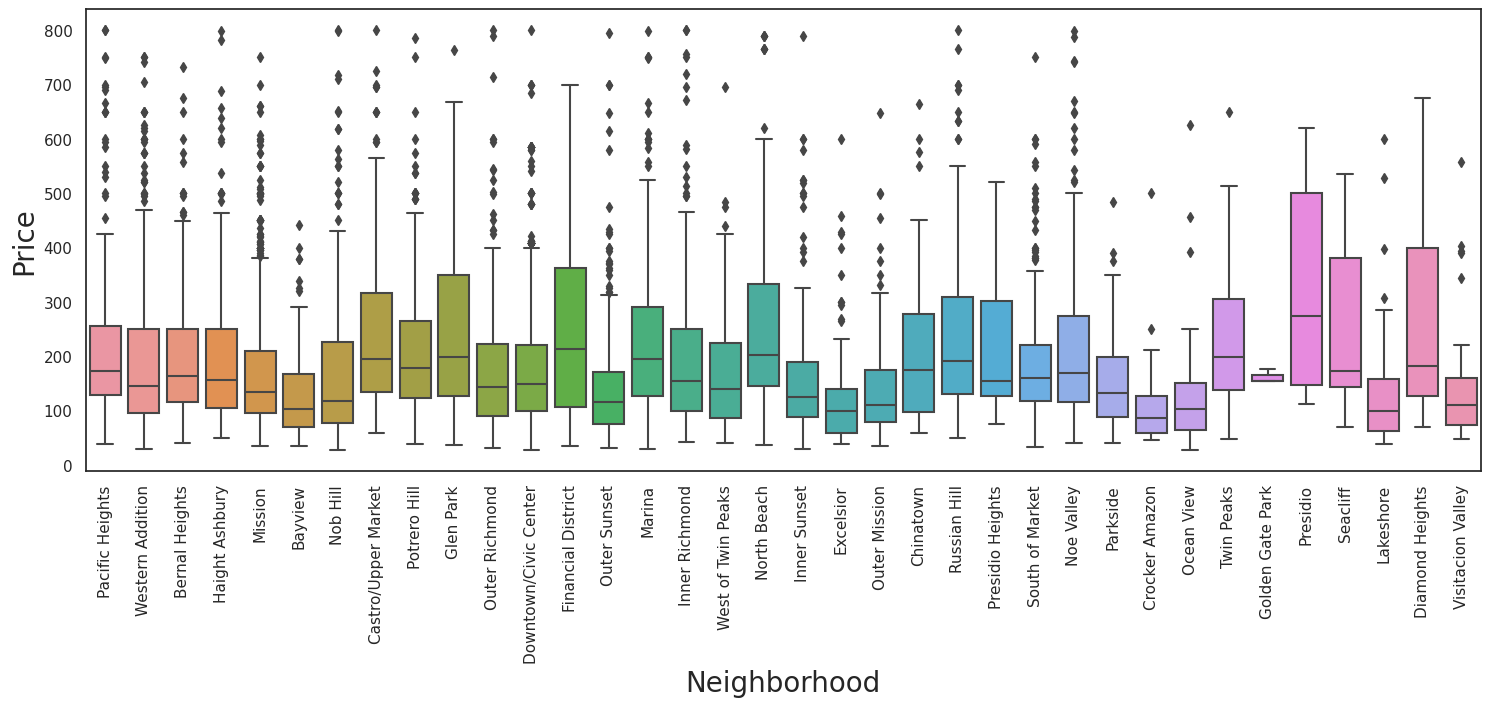

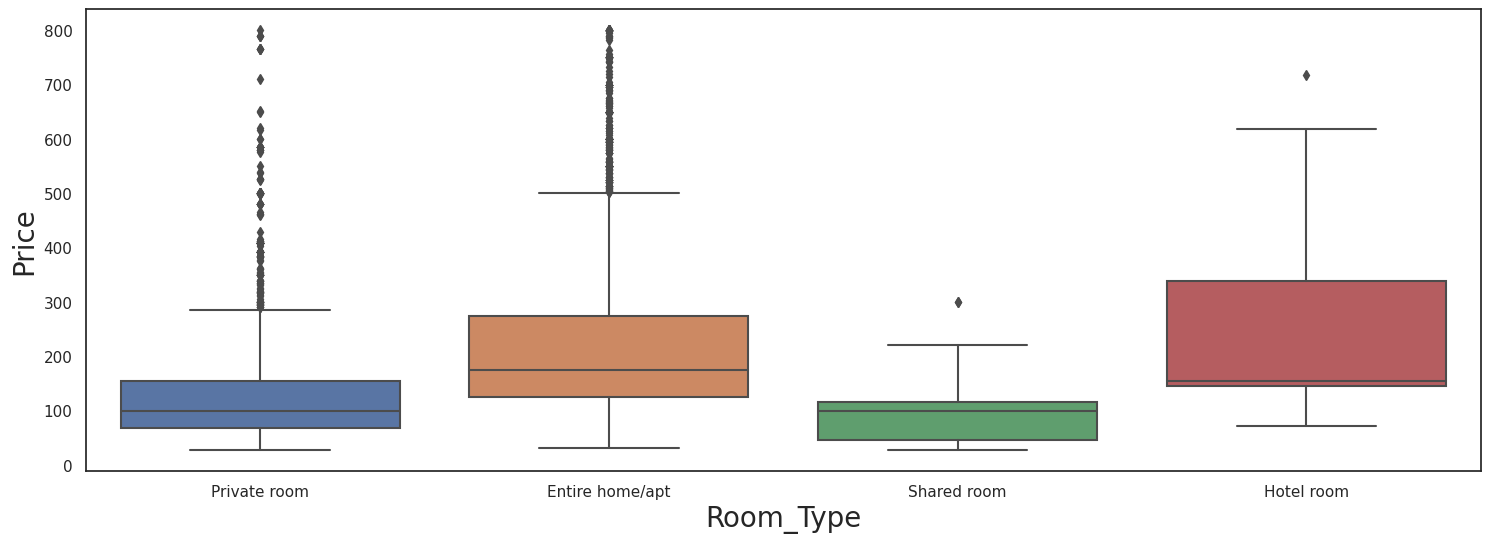

In [332]:
listingsnew = pd.read_csv(listings_file)
# replacing NaN values with 0
# listingsnew.fillna(0, inplace=True)

# extract the 'prices' from the table
pricenew = listingsnew['price']
pricesnew = []
for element in pricenew:
    element = float(element[1:].replace(',',''))
    pricesnew.append(element)
# # replacing the current column into a new one for future use
listingsnew['price'] = pricesnew
listingsnew['price'].describe()
# Check Price percentile
low = .5
high = 99.5

print('Percentile of', low,' % price is ', np.percentile(listingsnew['price'].dropna(),low, axis =0))
print('Percentile of',high,'% price is ', np.percentile(listingsnew['price'].dropna(),high, axis =0))
listingsnew["bathroom_qty"] = listingsnew["bathrooms_text"].str.split(" ", expand=True)[0]
listingsnew["bathroom_type"] = listingsnew["bathrooms_text"].str.split(" ", expand=True)[1]
# Get a list of the numeric features
numeric_features = listingsnew.select_dtypes(include='number').columns.tolist()
print("numeric_features :: ")
print(numeric_features)

# Cardinality of the nonnumeric features
cardinality = listingsnew.select_dtypes(exclude='number').nunique()
print("cardinality :: ")
print(cardinality)

# List of all categorical features with  (2< cardinality <70)
cat_features = cardinality[(cardinality <= 70) & (cardinality > 2) ].index.tolist()
print("cat_features :: ")
print(cat_features)

# Combine the lists 
features = numeric_features + cat_features
print("features :: ")
print(features)
def wrangle(X):
    """Wrangle train, validate, and test sets in the same way"""
    
    # Prevent SettingWithCopyWarning
    X = X.copy()

    # Customise columns: Replace white space with underscore
    X.columns = X.columns.str.replace(' ', '_')  

    # Extract any 'good' Nulls value before they're removed.

    # 1. For string: Replace the nulls with 'not_listed', and impute missing values later. !!!
    for col in cat_features:
        X[col] = X[col].fillna('not_listed')


    # 2. For numbers: Replace the nulls with 0 (fillna(0)), and impute missing values later. !!!
    for col in numeric_features:
        X[col] = X[col].fillna(0)

    # Drop duplicates
    X = X.drop(columns=['neighbourhood','neighbourhood_group_cleansed'], axis=1)

    # return the wrangled dataframe
    return X

listingsnew = wrangle(listingsnew)
# Rename dataframe from now on.

df = listingsnew.rename(columns={'neighbourhood_cleansed': 'neighbourhood'})
df.shape
df['FreeParking'] = df['amenities'].apply(hasAmenity("Free parking"))
df['TV'] = df['amenities'].apply(hasAmenity("TV"))
df['Internet'] = df['amenities'].apply(hasAmenity("Internet"))
df['Breakfast'] = df['amenities'].apply(hasAmenity("Breakfast"))
df['Kitchen'] = df['amenities'].apply(hasAmenity("Kitchen"))
df['Heating'] = df['amenities'].apply(hasAmenity("Heating"))
df['Washer'] = df['amenities'].apply(hasAmenity("Washer"))
df['Gym'] = df['amenities'].apply(hasAmenity("Gym"))
df['Essentials'] = df['amenities'].apply(hasAmenity("Essentials"))
df['AirCon'] = df['amenities'].apply(hasAmenity("Air conditioning"))
df['NonSmoking'] = df['amenities'].apply(hasAmenity("No smoking"))
df['Pool'] = df['amenities'].apply(hasAmenity("Pool"))
df.head(3)
df.select_dtypes(include='number').nunique().sort_values()
df.select_dtypes(exclude='number').nunique().sort_values()
# df.dtypes
df['price'].describe()
# Check Price percentile
low = .5
high = 99.5

print('Percentile of', low,' % price is ', np.percentile(df['price'].dropna(),low, axis =0))
print('Percentile of',high,'% price is ', np.percentile(df['price'].dropna(),high, axis =0))
df.columns
# Make columns cleaner

# Make sure the target is clean
df = df.dropna(subset=['price'])

####################################################################

# Limit the price: remove 0.
df =   df[(df['price'].between(20,800))]# 

# Limit with only the data with notNull >6500
df = df.dropna(thresh=6500, axis=1)
######################################################################


# Get a dataframe with all train columns except unneeded columns
df_features = df.drop(columns=['id', 'scrape_id', 'host_id', 'latitude', 'longitude'], axis=1)

# Get a list of the numeric features
numeric_features = df_features.select_dtypes(include='number').columns.tolist()

# Cardinality of the nonnumeric features
cardinality = df_features.select_dtypes(exclude='number').nunique()

# List of all categorical features with  (2< cardinality <70)
cat_features = cardinality[(cardinality <= 70) & (cardinality > 2) ].index.tolist()

# Combine the lists 
features = numeric_features + cat_features
print(features)
train = df[features]

print(train.shape)
train.head(2)
!pip install chart_studio
# Import packages for cgarting

import plotly.figure_factory as ff
import numpy as np
import chart_studio
import chart_studio.plotly as py
import plotly.express as px
%matplotlib inline
import matplotlib.pyplot as plt
# Show the Room_type distribution

fig = px.histogram(df, x='price', title= 'Price and Room_type Distributions', nbins=40, color='room_type', width=1000, height=400)
fig.update_layout(legend=dict( yanchor="top",  y=.95,  xanchor="right", x=.95 ))
fig.update_layout(
    yaxis_title="Count",
    font=dict( family="Courier New, monospace", size=18))#, color="black")) # or color="RebeccaPurple"

fig.show()
# Bedrooms in Neighborhood distribution

fig = px.histogram(df, x="neighbourhood", title="Neighborhood and #Bedrooms Distributions" ,  nbins=40, color='bedrooms', width=1000, height=500).update_xaxes(categoryorder="total descending")

fig.update_layout(legend=dict( yanchor="top",  y=.95,  xanchor="right", x=.95 ))
fig.update_layout(
    yaxis_title="Count",
    font=dict( family="Courier New, monospace", size=18))#, color="black")) # or color="RebeccaPurple"

fig.show();
import seaborn as sns
import matplotlib.pyplot as plt



plt.figure(figsize=(18, 6))
chart2 = sns.boxplot(x = df["neighbourhood"], y = df["price"])#, palette="Blues");
chart2.set_xticklabels(chart2.get_xticklabels(), rotation=90);
plt.xlabel("Neighborhood", size=20)
plt.ylabel("Price", size=20)
plt.show();
# Pricec distribution across Neighborhood



fig = px.box(df, x="neighbourhood", y="price", title = 'Price Distribution Across Neighborhood')
fig.show()
# Number of people can be accommodated and price

fig = px.box(df, x="accommodates", y="price", title = 'Price Distributions over #Accommodated Guests')

fig.show()
# Same graph with scatter plot

fig = px.scatter(df, x="accommodates", y="price", trendline='ols', width=1000, height=400)
fig.show()
# Accommodates distribution

fig = px.histogram(df, x="accommodates",  title="#Beds in 'Accommodates' Distribution" ,  nbins=40, color='beds', width=1000, height=500) #.update_xaxes(categoryorder="total descending")

fig.update_layout(legend=dict( yanchor="top",  y=.95,  xanchor="right", x=.95 ))


# plt.xlabel("Neighborhood", size=20);
# plt.ylabel("Count", size=20);
fig.show();
# Property-Type and Price

fig = px.box(df, x="property_type", y="price", title = 'Price Distribution over Property types', width=1000, height=1000)

fig.show()
# Number Bedrooms and price

fig = px.box(df, x="bedrooms", title = 'Price distributions for each #Bedrooms', y="price",width=1000, height=400)

fig.show()
# Room type and Price


plt.figure(figsize=(18, 6))
chart2 = sns.boxplot(x = df["room_type"], y = df["price"])#, palette="Blues");
chart2.set_xticklabels(chart2.get_xticklabels(), rotation=0);
plt.xlabel("Room_Type", size=20)
plt.ylabel("Price", size=20)
plt.show()
# Mapping based on #Bedrooms

fig = px.scatter_mapbox(df,  title = "San Francisco Map", lat="latitude", lon="longitude", color=df['neighbourhood'],  width=1000, height=700, zoom=10)
fig.update_layout(mapbox_style="open-street-map")
fig.show()
# Define X & y

X_train = df[features].drop(columns='price')
y_train = df['price']

In [333]:
# Split into train & test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

X_train.shape, y_train.shape,  X_test.shape, y_test.shape

((5278, 55), (5278,), (1320, 55), (1320,))

***1 - Using Linear Regression***

***1-1 Baseline***

In [334]:
y_train.describe()

count    5278.000000
mean      190.317923
std       135.453156
min        27.000000
25%        99.000000
50%       149.000000
75%       240.000000
max       800.000000
Name: price, dtype: float64

In [335]:
y_test.describe()

count    1320.000000
mean      187.015152
std       132.512971
min        30.000000
25%        95.000000
50%       149.000000
75%       230.000000
max       799.000000
Name: price, dtype: float64

***The baseline shows :***

average price = $190,

with st_deviation of 135.

This shows that the price distribution has a big spread.

In [336]:
!pip install category_encoders
!pip install --upgrade category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [337]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

# Must put Standard Scaler . later on I need to take out some features based on coef_

linreg = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='mean'), 
    # StandardScaler(), 
    LinearRegression()
)

# Baseline

In [338]:
# Fit the model
linreg.fit(X_train, y_train)
y_pred_lr = linreg.predict(X_test)

In [339]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
baseline = y_train.median()
baseline_error = np.sqrt(mean_squared_error(y_pred=np.ones_like(y_test) * baseline, y_true=y_test))
baseline_error

137.80978326532687

***Coefficients, intercept & metrics***

In [340]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mse_lr = np.round(mean_squared_error(y_test, y_pred_lr),3)
rmse_lr = np.round(np.sqrt(mse_lr),3)
mae_lr = np.round(mean_absolute_error(y_test, y_pred_lr),3)
r2_lr = np.round(r2_score(y_test, y_pred_lr),3)

print('MAE    :', mae_lr)
print('MSE    :', mse_lr)
print('RMSE   :', rmse_lr)
print('R^2 =  :', r2_lr)

MAE    : 67.981
MSE    : 9354.049
RMSE   : 96.716
R^2 =  : 0.467


In [341]:
# Test
# mean_absolute_error(y_test, y_pred_lr) == mean_absolute_error(y_test, linreg.predict(X_test))

In [342]:
lrcoef = linreg.named_steps['linearregression'].coef_
lrcoef

array([ -8.15191460e-02,   4.30208563e-02,   2.39242473e+01,
        -7.57644870e-10,   2.30279212e+01,  -4.86226412e+00,
        -1.17205782e+00,   1.05688876e-04,   3.10268317e-01,
        -3.83661005e-01,  -2.09853421e-07,  -2.17557839e-06,
         1.04256810e+00,   2.40552177e-06,   4.02344824e-13,
         1.50591498e-01,  -1.48551105e-01,   1.98143049e-01,
        -6.51366211e-02,  -2.31944615e-02,  -7.72591811e-02,
        -2.36456296e-01,   2.86001261e+01,   5.13290823e+00,
         1.88055005e+01,  -2.57769770e+01,  -1.56098149e+01,
         1.13249886e+01,  -2.27578501e+01,   1.28819426e+01,
        -1.33565267e+01,  -1.26689896e+01,  -1.05539141e+01,
        -2.67234194e+00,  -1.48934035e+00,   2.70033884e+01,
         5.32907052e-15,   1.50225737e+01,  -1.25117960e+00,
         5.04451996e+00,  -6.65286485e+00,   3.31134562e+01,
        -1.62573578e+01,   2.94815184e+01,   2.13162821e-14,
         1.10212355e+01,   7.68366760e-01,   3.71039052e-01,
        -8.95546051e+00,

In [343]:
pd.Series(lrcoef, X_train.columns).sort_values(ascending=False).head(20)

Gym                               33.113456
AirCon                            29.481518
review_scores_rating              28.600126
TV                                27.003388
accommodates                      23.924247
bedrooms                          23.027921
bathroom_type                     21.761745
review_scores_cleanliness         18.805501
Breakfast                         15.022574
calculated_host_listings_count    12.881943
review_scores_location            11.324989
Pool                              11.021236
review_scores_accuracy             5.132908
Heating                            5.044520
bathroom_qty                       2.535636
minimum_nights_avg_ntm             1.042568
host_response_time                 0.768367
host_response_rate                 0.371039
minimum_minimum_nights             0.310268
neighbourhood                      0.275186
dtype: float64

In [344]:
# Charting the top-20 coefficients:

df_linreg = pd.Series(lrcoef, X_train.columns, name = 'coef').sort_values(ascending=False).head(20).to_frame()
df_linreg["features"] = df_linreg.index
df_linreg = df_linreg.reset_index().drop(columns = 'index')
df_linreg

coef                        features
0   33.113456                             Gym
1   29.481518                          AirCon
2   28.600126            review_scores_rating
3   27.003388                              TV
4   23.924247                    accommodates
5   23.027921                        bedrooms
6   21.761745                   bathroom_type
7   18.805501       review_scores_cleanliness
8   15.022574                       Breakfast
9   12.881943  calculated_host_listings_count
10  11.324989          review_scores_location
11  11.021236                            Pool
12   5.132908          review_scores_accuracy
13   5.044520                         Heating
14   2.535636                    bathroom_qty
15   1.042568          minimum_nights_avg_ntm
16   0.768367              host_response_time
17   0.371039              host_response_rate
18   0.310268          minimum_minimum_nights
19   0.275186                   neighbourhood

In [345]:
import plotly.graph_objects as go

fig = go.Figure(go.Bar(
            y = df_linreg['coef'],
            x = df_linreg['features'],
            orientation='v')
            )

# fig.update_layout(xaxis={'categoryorder':'category ascending'},  title = 'Linear Regression Coefficients')
fig.update_layout(xaxis={'categoryorder':'max descending'},  title = 'Top-20 Linear Regression Coefficients', width=1000, height=400)


fig.show()

In [346]:
pd.Series(lrcoef, X_train.columns).sort_values(ascending=False).head()

Gym                     33.113456
AirCon                  29.481518
review_scores_rating    28.600126
TV                      27.003388
accommodates            23.924247
dtype: float64

In [347]:
linreg.named_steps['linearregression'].intercept_

# linreg.named_steps['linearregression']

111.92287981697997

***2 - Using RandomForestRegressor***

In [348]:
from sklearn.ensemble import RandomForestRegressor

rfr1 = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestRegressor(n_estimators=5, max_features=10, random_state=42)
)

In [349]:
rfr1.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['host_response_time',
                                      'host_response_rate',
                                      'host_verifications', 'neighbourhood',
                                      'property_type', 'room_type',
                                      'bathrooms_text', 'bathroom_qty',
                                      'bathroom_type'],
                                mapping=[{'col': 'host_response_time',
                                          'data_type': dtype('O'),
                                          'mapping': within an hour        1
not_listed            2
within a few hours    3
within a day          4
a few days or more    5
NaN...
3.5           10
0             11
6             12
4.5           13
Half-bath     14
Private       15
not_listed    16
5.5           17
Shared        18
8             19
NaN           -2
dtype: int64},
                                         {'col': 'bathroom_type',
                                          'data_type': dtype('O'),
                                          'mapping': bath          1
shared        2
private       3
baths         4
not_listed    5
half-bath     6
NaN          -2
dtype: int64}])),
                ('simpleimputer', SimpleImputer(strategy='median')),
                ('randomforestregressor',
                 RandomForestRegressor(max_features=10, n_estimators=5,
                                       random_state=42))])

In [350]:
y_pred_rfr1 = rfr1.predict(X_test)

In [351]:
from sklearn.metrics import mean_absolute_error

mse_rfr1 = np.round(mean_squared_error(y_test, y_pred_rfr1),3)
rmse_rfr1 = np.round(np.sqrt(mse_rfr1),3)
mae_rfr1 = np.round(mean_absolute_error(y_test, y_pred_rfr1),3)
r2_rfr1 = np.round(r2_score(y_test, y_pred_rfr1),3)

print('MAE   :', mae_rfr1)
print('MSE   :', mse_rfr1)
print('RMSE  :', rmse_rfr1)
print('R^2 = :', r2_rfr1)

MAE   : 56.439
MSE   : 7699.007
RMSE  : 87.744
R^2 = : 0.561


In [352]:
rfr_important = rfr1.named_steps['randomforestregressor'].feature_importances_  # feature_importances_ is called attributes

rfr_important

array([ 0.02314157,  0.0297974 ,  0.06861643,  0.        ,  0.05179518,
        0.0502763 ,  0.02422192,  0.01542114,  0.02511042,  0.03300009,
        0.01263137,  0.01187249,  0.02413447,  0.01090917,  0.        ,
        0.01161778,  0.02058669,  0.01876878,  0.02136011,  0.02902988,
        0.02815782,  0.0059259 ,  0.01846594,  0.01157419,  0.01495875,
        0.00739128,  0.0092223 ,  0.01441018,  0.01069203,  0.01927622,
        0.00849312,  0.03533089,  0.00152599,  0.03466918,  0.00386389,
        0.00263071,  0.        ,  0.00310517,  0.00350293,  0.00323494,
        0.00475366,  0.00524133,  0.00471595,  0.01158711,  0.        ,
        0.00108348,  0.00980555,  0.00827878,  0.00542114,  0.01923357,
        0.01564731,  0.0317372 ,  0.02798114,  0.05151766,  0.08427353])

In [353]:
fi_rfr = pd.Series(rfr_important, X_train.columns).sort_values(ascending=False).head(20)

fi_rfr

bathroom_type                                   0.084274
accommodates                                    0.068616
bedrooms                                        0.051795
bathroom_qty                                    0.051518
beds                                            0.050276
calculated_host_listings_count_private_rooms    0.035331
reviews_per_month                               0.034669
maximum_minimum_nights                          0.033000
room_type                                       0.031737
host_total_listings_count                       0.029797
number_of_reviews                               0.029030
number_of_reviews_ltm                           0.028158
bathrooms_text                                  0.027981
minimum_minimum_nights                          0.025110
minimum_nights                                  0.024222
minimum_nights_avg_ntm                          0.024134
host_listings_count                             0.023142
availability_365               

In [354]:
# Convert Series into Dataframes
dfi = pd.Series(fi_rfr, name='importance').to_frame()
dfi['features'] = dfi.index

In [355]:
dfi = dfi.reset_index().drop(columns='index')
dfi

importance                                      features
0     0.084274                                 bathroom_type
1     0.068616                                  accommodates
2     0.051795                                      bedrooms
3     0.051518                                  bathroom_qty
4     0.050276                                          beds
5     0.035331  calculated_host_listings_count_private_rooms
6     0.034669                             reviews_per_month
7     0.033000                        maximum_minimum_nights
8     0.031737                                     room_type
9     0.029797                     host_total_listings_count
10    0.029030                             number_of_reviews
11    0.028158                         number_of_reviews_ltm
12    0.027981                                bathrooms_text
13    0.025110                        minimum_minimum_nights
14    0.024222                                minimum_nights
15    0.024134                        minimum_nights_avg_ntm
16    0.023142                           host_listings_count
17    0.021360                              availability_365
18    0.020587                               availability_60
19    0.019276                calculated_host_listings_count

In [356]:
import plotly.graph_objects as go

colors = ['grey',] * 40
colors[8] = 'red'
colors[12] = 'red'
colors[15] = 'red'

fig = go.Figure(go.Bar(
            y=dfi['importance'],
            x=dfi['features'],
            orientation='v',
            marker_color=colors)
            )

fig.update_layout(xaxis={'categoryorder':'max descending'},  title = 'Top-20 Features that Predict the Price', width=1000, height=400)
fig.show()

In [357]:
rfr1.named_steps['randomforestregressor'].estimators_

[DecisionTreeRegressor(max_features=10, random_state=1608637542),
 DecisionTreeRegressor(max_features=10, random_state=1273642419),
 DecisionTreeRegressor(max_features=10, random_state=1935803228),
 DecisionTreeRegressor(max_features=10, random_state=787846414),
 DecisionTreeRegressor(max_features=10, random_state=996406378)]

In [358]:
rfr1.named_steps['randomforestregressor'].base_estimator_

/usr/local/lib/python3.9/dist-packages/sklearn/utils/deprecation.py:101: FutureWarning:

Attribute `base_estimator_` was deprecated in version 1.2 and will be removed in 1.4. Use `estimator_` instead.



DecisionTreeRegressor()

In [359]:
# Visualisation y_pred & y_test
drfr = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred_rfr1})
drfr

y_test  y_pred
2155   149.0   201.0
5485   229.0   199.2
2298   285.0   286.2
3316    50.0    56.6
5473    60.0    72.6
...      ...     ...
4487   136.0    78.2
3899    57.0    59.2
3160   150.0   123.2
6153    79.0   164.6
5881   369.0   476.0

[1320 rows x 2 columns]

Let's see the price error distribution.
We see that the most error is on the lowest price.

In [360]:
# Error calculation:

drfr['error'] = abs(drfr['y_test'] - drfr['y_pred'])
# drfr['error']

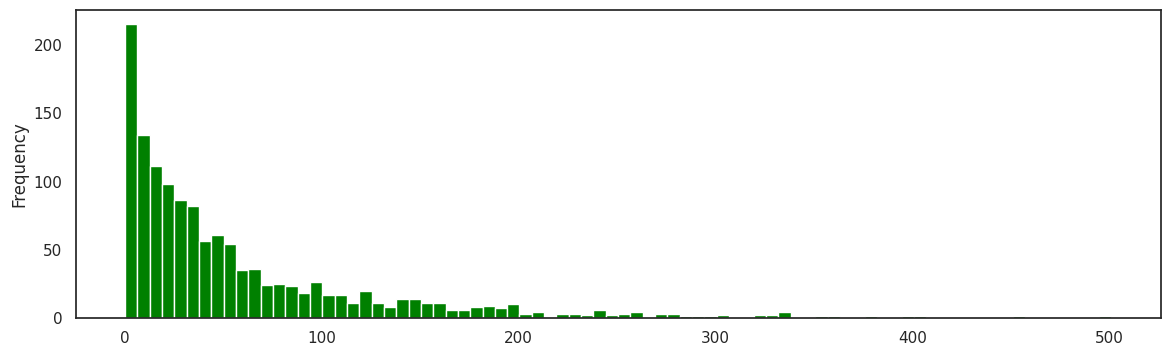

In [361]:
# Error distribution plot
drfr['error'].plot(kind='hist', color='green', bins=80, figsize=(14,4));

In [362]:
drfr[drfr['error']<10]

y_test  y_pred  error
2298   285.0   286.2    1.2
3316    50.0    56.6    6.6
3442    95.0    88.8    6.2
550    199.0   198.0    1.0
1611   110.0   117.6    7.6
...      ...     ...    ...
5203   117.0   116.0    1.0
5183    95.0    95.8    0.8
3798   177.0   178.8    1.8
425    180.0   189.4    9.4
3899    57.0    59.2    2.2

[293 rows x 3 columns]

***RandomForest Regressor to find the best parameters:***

In [363]:
from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.pipeline import make_pipeline
import category_encoders as ce
from category_encoders import OneHotEncoder, OrdinalEncoder

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(), 
    RandomForestRegressor(random_state=42)
)

param_distributions = {
    # 'targetencoder__min_samples_leaf': randint(1, 1000),     # sometimes this doesnt work - weird!!
    'simpleimputer__strategy': ['mean', 'median'], 
    'randomforestregressor__n_estimators': randint(50, 500), 
    'randomforestregressor__max_depth': [4, 7, 10, 15], 
    'randomforestregressor__max_features': uniform(0, 1), 
}


search = RandomizedSearchCV(
    pipeline, 
    param_distributions=param_distributions, 
    n_iter=10, 
    cv=3, 
    scoring='neg_mean_absolute_error', 
    verbose=10, 
    return_train_score=True, 
    n_jobs=-1
)

In [364]:
search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('ordinalencoder',
                                              OrdinalEncoder()),
                                             ('simpleimputer', SimpleImputer()),
                                             ('randomforestregressor',
                                              RandomForestRegressor(random_state=42))]),
                   n_jobs=-1,
                   param_distributions={'randomforestregressor__max_depth': [4,
                                                                             7,
                                                                             10,
                                                                             15],
                                        'randomforestregressor__max_features': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7efb6c1ac970>,
                                        'randomforestregressor__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7efb6cef4c40>,
                                        'simpleimputer__strategy': ['mean',
                                                                    'median']},
                   return_train_score=True, scoring='neg_mean_absolute_error',
                   verbose=10)

In [365]:
pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'ordinalencoder', 'simpleimputer', 'randomforestregressor', 'ordinalencoder__cols', 'ordinalencoder__drop_invariant', 'ordinalencoder__handle_missing', 'ordinalencoder__handle_unknown', 'ordinalencoder__mapping', 'ordinalencoder__return_df', 'ordinalencoder__verbose', 'simpleimputer__add_indicator', 'simpleimputer__copy', 'simpleimputer__fill_value', 'simpleimputer__keep_empty_features', 'simpleimputer__missing_values', 'simpleimputer__strategy', 'simpleimputer__verbose', 'randomforestregressor__bootstrap', 'randomforestregressor__ccp_alpha', 'randomforestregressor__criterion', 'randomforestregressor__max_depth', 'randomforestregressor__max_features', 'randomforestregressor__max_leaf_nodes', 'randomforestregressor__max_samples', 'randomforestregressor__min_impurity_decrease', 'randomforestregressor__min_samples_leaf', 'randomforestregressor__min_samples_split', 'randomforestregressor__min_weight_fraction_leaf', 'randomforestregressor__n_estimato

In [366]:
y_pred_rfr2 = search.predict(X_test)

In [367]:
print('Best hyperparameters', search.best_params_)
print('Cross-validation MAE', -search.best_score_)
model = search.best_estimator_

Best hyperparameters {'randomforestregressor__max_depth': 15, 'randomforestregressor__max_features': 0.50982438664503626, 'randomforestregressor__n_estimators': 396, 'simpleimputer__strategy': 'median'}
Cross-validation MAE 51.5601909636


In [368]:
# Best Accuracy for n_iter = 

mse_rfr2 = np.round(mean_squared_error(y_test, y_pred_rfr2),3)
rmse_rfr2 = np.round(np.sqrt(mse_rfr2),3)
mae_rfr2 = np.round(mean_absolute_error(y_test, y_pred_rfr2),3)
r2_rfr2 = np.round(r2_score(y_test, y_pred_rfr2),3)

print('MAE   :', mae_rfr2)
print('MSE   :', mse_rfr2)
print('RMSE  :', rmse_rfr2)
print('R^2 = :', r2_rfr2)

MAE   : 48.787
MSE   : 5821.897
RMSE  : 76.301
R^2 = : 0.668


***Try again RandomForestRegressor with another method, increase n_iter***

In [369]:
from scipy.stats import randint, uniform

pipeline3 = make_pipeline(
    ce.TargetEncoder(), 
    SimpleImputer(), 
    RandomForestRegressor(random_state=42)
)

param_distributions = {
    'targetencoder__min_samples_leaf': randint(1, 1000),     
    'simpleimputer__strategy': ['mean', 'median'], 
    'randomforestregressor__n_estimators': randint(50, 500), 
    'randomforestregressor__max_depth': [3, 5, 7, 10], 
    'randomforestregressor__max_features': uniform(0, 1), 
}

search3 = RandomizedSearchCV(
    pipeline3, 
    param_distributions=param_distributions, 
    n_iter=40, 
    cv=3, 
    scoring='neg_mean_absolute_error', 
    verbose=10, 
    return_train_score=True, 
    n_jobs=-1
)

search3.fit(X_train, y_train);

Fitting 3 folds for each of 40 candidates, totalling 120 fits


In [370]:
y_pred_rfr3 = search3.predict(X_test)

In [371]:
print('Best hyperparameters', search3.best_params_)
print('Cross-validation MAE', -search3.best_score_)

Best hyperparameters {'randomforestregressor__max_depth': 10, 'randomforestregressor__max_features': 0.34913391387388204, 'randomforestregressor__n_estimators': 258, 'simpleimputer__strategy': 'median', 'targetencoder__min_samples_leaf': 1}
Cross-validation MAE 51.2244292212


In [372]:
mse_rfr3 = np.round(mean_squared_error(y_test, y_pred_rfr3),3)
rmse_rfr3 = np.round(np.sqrt(mse_rfr3),3)
mae_rfr3 = np.round(mean_absolute_error(y_test, y_pred_rfr3),3)
r2_rfr3 = np.round(r2_score(y_test, y_pred_rfr3),3)

print('MAE   :', mae_rfr3)
print('MSE   :', mse_rfr3)
print('RMSE  :', rmse_rfr3)
print('R^2 = :', r2_rfr3)

MAE   : 49.366
MSE   : 5964.874
RMSE  : 77.233
R^2 = : 0.66


In [373]:
pd.DataFrame(search3.cv_results_).sort_values(by='rank_test_score').T

2   \
mean_fit_time                                                                       4.314439   
std_fit_time                                                                        0.267973   
mean_score_time                                                                     0.130967   
std_score_time                                                                       0.00661   
param_randomforestregressor__max_depth                                                    10   
param_randomforestregressor__max_features                                           0.349134   
param_randomforestregressor__n_estimators                                                258   
param_simpleimputer__strategy                                                         median   
param_targetencoder__min_samples_leaf                                                      1   
params                                     {'randomforestregressor__max_depth': 10, 'rand...   
split0_test_score                                                                 -51.050914   
split1_test_score                                                                 -52.529318   
split2_test_score                                                                 -50.093056   
mean_test_score                                                                   -51.224429   
std_test_score                                                                      1.002139   
rank_test_score                                                                            1   
split0_train_score                                                                -33.125323   
split1_train_score                                                                -32.793376   
split2_train_score                                                                -33.488205   
mean_train_score                                                                  -33.135635   
std_train_score                                                                     0.283756   

                                                                                          31  \
mean_fit_time                                                                       3.063392   
std_fit_time                                                                        0.080457   
mean_score_time                                                                     0.066463   
std_score_time                                                                      0.004585   
param_randomforestregressor__max_depth                                                    10   
param_randomforestregressor__max_features                                           0.819055   
param_randomforestregressor__n_estimators                                                 82   
param_simpleimputer__strategy                                                           mean   
param_targetencoder__min_samples_leaf                                                     11   
params                                     {'randomforestregressor__max_depth': 10, 'rand...   
split0_test_score                                                                 -51.231809   
split1_test_score                                                                 -53.119939   
split2_test_score                                                                 -50.628159   
mean_test_score                                                                   -51.659969   
std_test_score                                                                      1.061362   
rank_test_score                                                                            2   
split0_train_score                                                                -32.174299   
split1_train_score                                                                -32.293283   
split2_train_score                                                                -32.179151   
mean_train_score                                         

In [374]:
pipeline3 = search3.best_estimator_
pipeline3

Pipeline(steps=[('targetencoder',
                 TargetEncoder(cols=['host_response_time', 'host_response_rate',
                                     'host_verifications', 'neighbourhood',
                                     'property_type', 'room_type',
                                     'bathrooms_text', 'bathroom_qty',
                                     'bathroom_type'],
                               min_samples_leaf=1)),
                ('simpleimputer', SimpleImputer(strategy='median')),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=10,
                                       max_features=0.34913391387388204,
                                       n_estimators=258, random_state=42))])

In [375]:
rfr1.named_steps['randomforestregressor'].estimators_

[DecisionTreeRegressor(max_features=10, random_state=1608637542),
 DecisionTreeRegressor(max_features=10, random_state=1273642419),
 DecisionTreeRegressor(max_features=10, random_state=1935803228),
 DecisionTreeRegressor(max_features=10, random_state=787846414),
 DecisionTreeRegressor(max_features=10, random_state=996406378)]

***3a - Using XGBRegressor with pipeline***

In [376]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

from matplotlib import pyplot
from xgboost import plot_importance

In [377]:
# XGBRegressor?

In [378]:
xgbreg1 = make_pipeline(
    ce.OrdinalEncoder(),
    XGBRegressor(n_estimators=10, random_state=42, n_jobs=2, max_depth=4,  learning_rate=0.1)
)

xgbreg1.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['host_response_time',
                                      'host_response_rate',
                                      'host_verifications', 'neighbourhood',
                                      'property_type', 'room_type',
                                      'bathrooms_text', 'bathroom_qty',
                                      'bathroom_type'],
                                mapping=[{'col': 'host_response_time',
                                          'data_type': dtype('O'),
                                          'mapping': within an hour        1
not_listed            2
within a few hours    3
within a day          4
a few days or more    5
NaN...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=4, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=10,
                              n_jobs=2, num_parallel_tree=None, predictor=None,
                              random_state=42, ...))])

In [379]:
# Make predictions on the test set
from sklearn.metrics import r2_score

y_pred_xg1 = xgbreg1.predict(X_test)

In [380]:
mse_xg1 = np.round(mean_squared_error(y_test, y_pred_xg1),3)
rmse_xg1 = np.round(np.sqrt(mse_xg1),3)
mae_xg1 = np.round(mean_absolute_error(y_test, y_pred_xg1),3)
r2_xg1 = np.round(r2_score(y_test, y_pred_xg1),3)

print('MAE   :', mae_xg1)
print('MSE   :', mse_xg1)
print('RMSE  :', rmse_xg1)
print('R^2 = :', r2_xg1)

MAE   : 73.581
MSE   : 13746.861
RMSE  : 117.247
R^2 = : 0.217


3b. Using XGBoostRegressor with Data Matrix (MAE & RMSE only)

https://www.datacamp.com/community/tutorials/xgboost-in-python

Only for MAE & RMSE

In [381]:
# This X_train_encoded value will be used for feature importance

encoder = ce.OrdinalEncoder()
imputer = SimpleImputer()
scaler = StandardScaler()

X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

In [382]:
X_train_encoded
# X_train_encoded.isnull().sum()
# X_train_imputed

host_listings_count  host_total_listings_count  accommodates  bathrooms  \
608                     2                          3             6        0.0   
3235                   15                         15             1        0.0   
5647                    3                          3             1        0.0   
4028                   23                         26             4        0.0   
3216                   12                         12             2        0.0   
...                   ...                        ...           ...        ...   
3888                    7                          7             2        0.0   
5337                 4559                       4960             2        0.0   
5372                    1                          1             5        0.0   
5540                  118                        136             2        0.0   
890                     2                          2             1        0.0   

      bedrooms  beds  minimum_nights  maximum_nights  minimum_minimum_nights  \
608        2.0   3.0               2            1125                     2.0   
3235       1.0   1.0               1              90                     1.0   
5647       1.0   1.0              30              90                    30.0   
4028       2.0   3.0              30             365                    30.0   
3216       1.0   1.0               1            1125                     1.0   
...        ...   ...             ...             ...                     ...   
3888       1.0   1.0               1              28                     1.0   
5337       1.0   1.0              31            1125                   360.0   
5372       2.0   4.0              30              60                    30.0   
5540       1.0   1.0               2               6                     2.0   
890        1.0   1.0               2              29                     2.0   

      maximum_minimum_nights  ...  Pool  host_response_time  \
608                      2.0  ...     0                   1   
3235                     1.0  ...     0                   1   
5647                    30.0  ...     1                   2   
4028                    30.0  ...     0                   1   
3216                     1.0  ...     0                   1   
...                      ...  ...   ...                 ...   
3888                     1.0  ...     0                   1   
5337                   360.0  ...     1                   1   
5372                    30.0  ...     0                   1   
5540                     2.0  ...     0                   3   
890                      2.0  ...     0                   1   

      host_response_rate  host_verifications  neighbourhood  property_type  \
608                    1                   1              1              1   
3235                   1                   2              2              2   
5647                   2                   2              2              3   
4028                   3                   2              3              4   
3216                   1                   2              4              5   
...                  ...                 ...            ...            ...   
3888                   1                   2              4              2   
5337                   4                   1              2              4   
5372                   1                   2             14              4   
5540                   4                   2              4              4   
890                    1                   2             17              6   

      room_type  bathrooms_text  bathroom_qty  bathroom_type  
608           1               1             1              1  
3235          2               2             2              2  
5647          3               3             1              3  
4028          1               1             1              1  
3216          2               3             1              3  


In [383]:
# convert the dataset into an optimized data structure called Dmatrix

data_dmatrix = xgb.DMatrix(data = X_train_encoded,label=y_train) ## this is called d_train, not d_test

dtest = xgb.DMatrix(X_test_encoded, label=y_test)

In [384]:
X_test_encoded.shape

(1320, 55)

In [385]:
X_train_encoded.shape, y_train.shape

((5278, 55), (5278,))

In [386]:
# K-fold X-validation. 


k=5
params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 10, 'alpha': 10}

# This cv_results contains train and test RMSE metrics for each boosting round

cv_results_mae = xgb.cv(dtrain=data_dmatrix, params=params, nfold=k,
                    num_boost_round=50,early_stopping_rounds=10,metrics="mae", as_pandas=True, seed=123)

cv_results_rmse = xgb.cv(dtrain=data_dmatrix, params=params, nfold=k,
                    num_boost_round=50,early_stopping_rounds=10,metrics='rmse'  , as_pandas=True, seed=123)      

# cv_results_rmse = xgb.cv(dtrain=data_dmatrix, params=params, nfold=k,
#                     num_boost_round=50,early_stopping_rounds=10,metrics='error'  , as_pandas=True, seed=123)      


# We can also use - metric=list() -  meaning:  use all possible metrics
cv_results_list = xgb.cv(dtrain=data_dmatrix, params=params, nfold=k,
                    num_boost_round=50,early_stopping_rounds=10,metrics=list()  , as_pandas=True, seed=123)

In [387]:
# cv_results_mae.tail()
# cv_results_rmse.tail()
cv_results_list.tail()

train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
45        23.694424        0.909677       79.794840       2.249112
46        23.116004        0.857967       79.694802       2.268826
47        22.544030        0.826654       79.629342       2.250960
48        22.005008        0.841092       79.559502       2.245979
49        21.521377        0.800594       79.497809       2.233508

In [388]:
# Final RMSE: get the lowest train-RMSE value

print(cv_results_mae.tail(1))
print()
print(cv_results_rmse.tail(1))

    train-mae-mean  train-mae-std  test-mae-mean  test-mae-std
49       13.861972        0.42889      49.171981      1.627804

    train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
49        21.521377        0.800594       79.497809       2.233508


***3c. Using XGBoostRegressor without pipeline***

In [389]:
xg2 = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 20, alpha = 10, n_estimators = 70)

In [390]:
xg2.fit(X_train_encoded,y_train)

[21:54:23] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=20, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=70, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', ...)

In [391]:
y_pred_xg2 = xg2.predict(X_test_encoded)

In [392]:
mse_xg2 = np.round(mean_squared_error(y_test, y_pred_xg2),3)
rmse_xg2 = np.round(np.sqrt(mse_xg2),3)
mae_xg2 = np.round(mean_absolute_error(y_test, y_pred_xg2),3)
r2_xg2 =  np.round(r2_score(y_test, y_pred_xg2),3)

print('MAE   :', mae_xg2)
print('MSE   :', mse_xg2)
print('RMSE  :', rmse_xg2)
print('R^2 = :', r2_xg2)

MAE   : 48.675
MSE   : 6063.422
RMSE  : 77.868
R^2 = : 0.654


***Visualize Boosting Trees and Feature Importance with XGB***

In [393]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

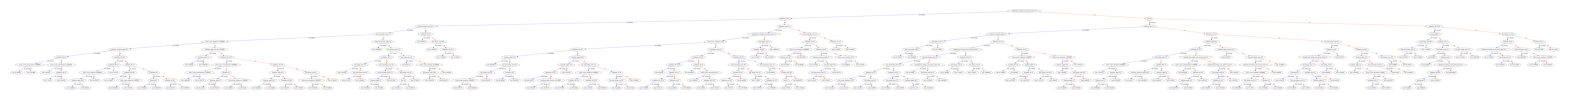

<Figure size 5000x5000 with 0 Axes>

In [394]:
# Plot the 1st tree

xgb.plot_tree(xg_reg,num_trees=1)
# plt.rcParams['figure.figsize'] = [70, 70]
plt.figure(figsize=(50,50));
plt.show()

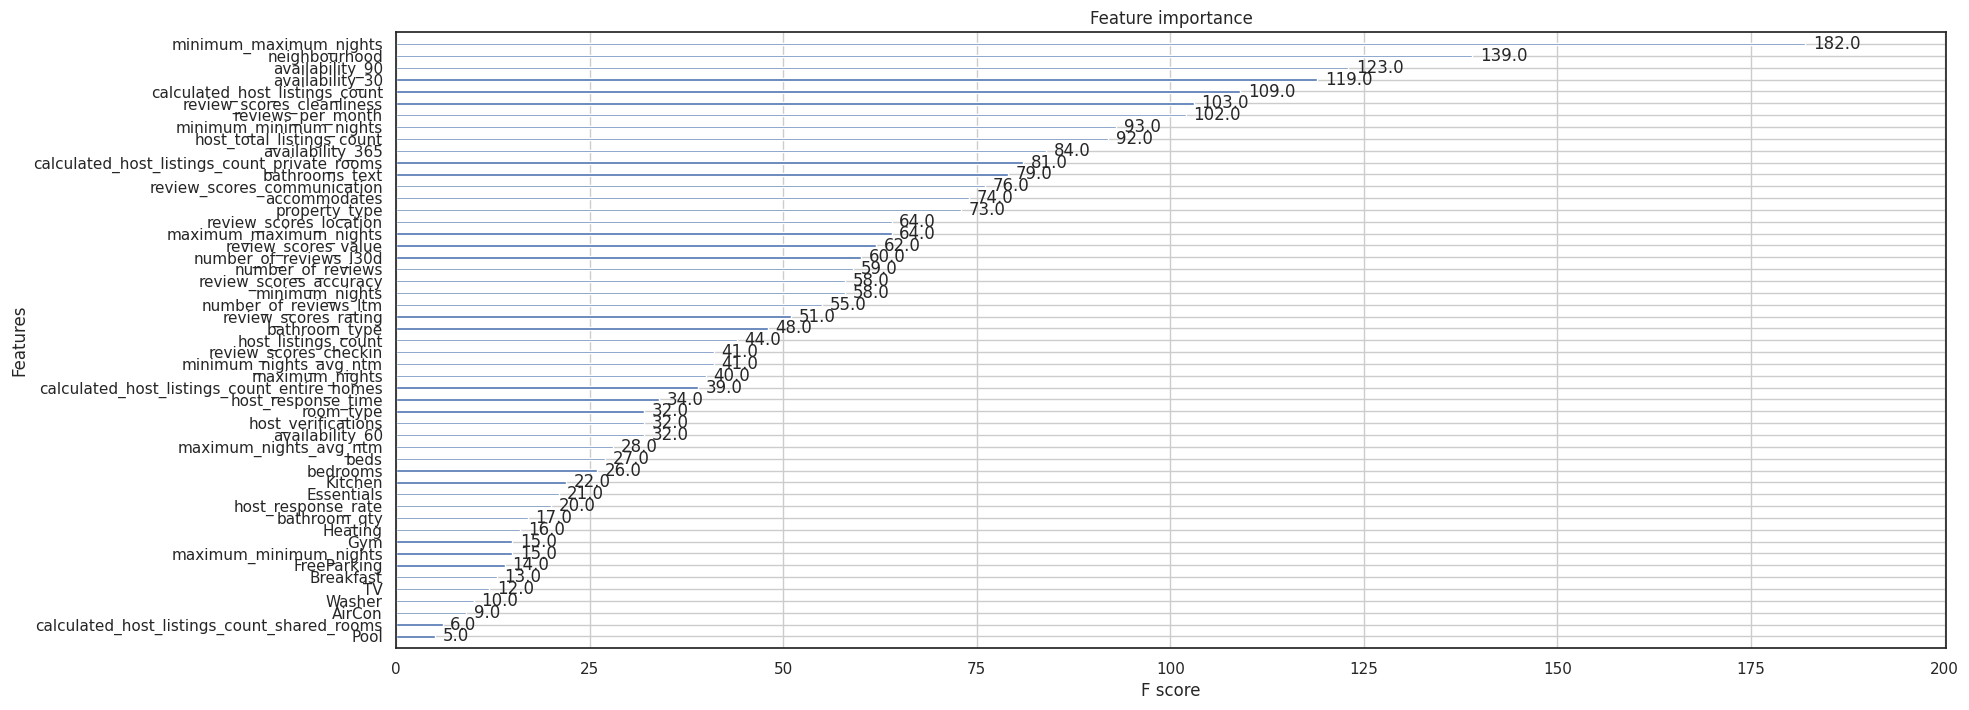

In [395]:
# XGBoost has a plot_importance() function . easy.

xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 10]
plt.show();

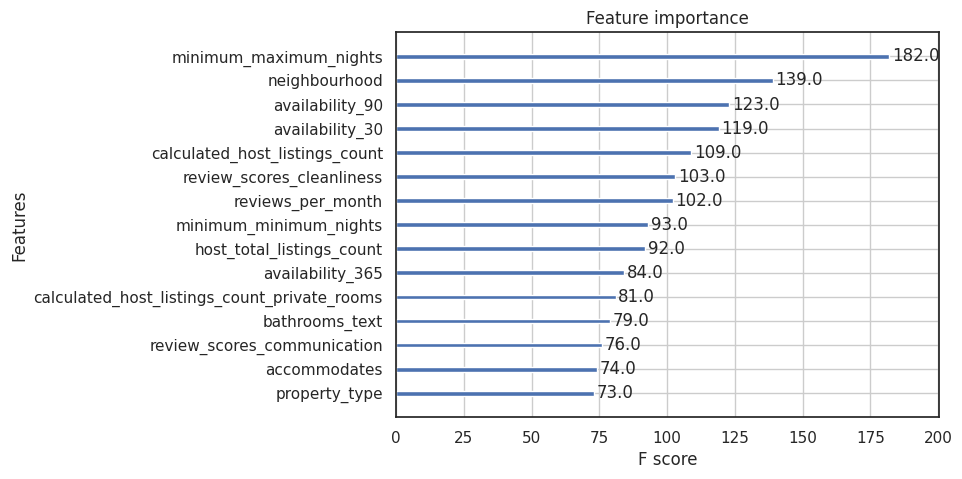

In [396]:
# XGBoost has a plot_importance() function . easy.

ax3 = xgb.plot_importance(xg_reg, max_num_features=15)
fig = ax3.figure
fig.set_size_inches(7,5);

***Trying to get XGB Hyper Parameter***

https://machinelearningmastery.com/data-preparation-gradient-boosting-xgboost-python/

In [397]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder


# encoder = LabelEncoder()
encoder = OrdinalEncoder()

X_train_xg4 = encoder.fit_transform(X_train)
X_test_xg4 = encoder.fit_transform(X_test)
# y_test_xg4 = encoder.fit_transform(y_test)

xgb4 = XGBRegressor()


param_distributions = {
        'max_depth': (3, 4, 5, 6, 7, 8, 9, 10, 11, 12),
        'min_child_weight': np.arange(0.0001, 0.5, 0.001),
        'gamma': np.arange(0.0,40.0,0.005),
        'learning_rate': np.arange(0.0005,0.3,0.0005),
        'subsample': np.arange(0.01,1.0,0.01),
        'colsample_bylevel': np.round(np.arange(0.1,1.0,0.01)),
        'colsample_bytree': np.arange(0.1,1.0,0.01),
}

search4 = RandomizedSearchCV(
    xgb4, 
    param_distributions=param_distributions, 
    n_iter=50, 
    cv=3, 
    scoring='neg_mean_absolute_error', 
    verbose=10, 
    return_train_score=True, 
    n_jobs=-1
)

In [398]:
xgb4.fit(X_train_xg4, y_train) ## without optim

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [399]:
search4.fit(X_train_xg4, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
        0.37,  0.38,  0.39,  0.4 ,  0.41,  0.42,  0.43,  0.44,  0.45,
        0.46,  0.47,  0.48,  0.49,  0.5 ,  0.51,  0.52,  0.53,  0.54,
        0.55,  0.56,  0.57,  0.58,  0.59,  0.6 ,  0.61,  0.62,  0.63,
        0.64,  0.65,  0.66,  0.67,  0.68,  0.69,  0.7 ,  0.71,  0.72,
        0.73,  0.74,  0.75,  0.76,  0.77,  0.78,  0.79,  0.8 ,  0.81,
        0.82,  0.83,  0.84,  0.85,  0.86,  0.87,  0.88,  0.89,  0.9 ,
        0.91,  0.92,  0.93,  0.94,  0.95,  0.96,  0.97,  0.98,  0.99])},
                   return_train_score=True, scoring='neg_mean_absolute_error',
                   verbose=10)

In [400]:
y_pred_xg4 = search4.predict(X_test_xg4)

In [401]:
optim_result = search4.fit(X_train_xg4, y_train)

# summarize results
print("Best: %f using %s" % (optim_result.best_score_, optim_result.best_params_))
means = optim_result.cv_results_[ 'mean_test_score' ]
stds = optim_result.cv_results_[ 'std_test_score' ]
params = optim_result.cv_results_[ 'params' ]

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best: -49.358711 using {'subsample': 0.93000000000000005, 'min_child_weight': 0.22509999999999999, 'max_depth': 6, 'learning_rate': 0.088000000000000009, 'gamma': 23.550000000000001, 'colsample_bytree': 0.90999999999999959, 'colsample_bylevel': 1.0}


In [402]:
params

[{'subsample': 0.16,
  'min_child_weight': 0.083100000000000007,
  'max_depth': 3,
  'learning_rate': 0.19700000000000001,
  'gamma': 24.365000000000002,
  'colsample_bytree': 0.48999999999999977,
  'colsample_bylevel': 0.0},
 {'subsample': 0.37,
  'min_child_weight': 0.058100000000000006,
  'max_depth': 7,
  'learning_rate': 0.158,
  'gamma': 26.490000000000002,
  'colsample_bytree': 0.62999999999999967,
  'colsample_bylevel': 1.0},
 {'subsample': 0.75,
  'min_child_weight': 0.43209999999999998,
  'max_depth': 11,
  'learning_rate': 0.0545,
  'gamma': 24.655000000000001,
  'colsample_bytree': 0.34999999999999987,
  'colsample_bylevel': 0.0},
 {'subsample': 0.68000000000000005,
  'min_child_weight': 0.1731,
  'max_depth': 7,
  'learning_rate': 0.18149999999999999,
  'gamma': 16.48,
  'colsample_bytree': 0.66999999999999971,
  'colsample_bylevel': 1.0},
 {'subsample': 0.52000000000000002,
  'min_child_weight': 0.49409999999999998,
  'max_depth': 4,
  'learning_rate': 0.218,
  'gamma': 1

In [403]:
means

array([ -62.22253782,  -53.58971924,  -57.58836632,  -51.83273245,
        -53.05307269,  -57.9318022 ,  -65.20507457,  -52.32912664,
        -62.4803694 , -150.20778721,  -52.98913505,  -69.801302  ,
        -54.5011085 ,  -54.95140232,  -58.20617594,  -80.23262169,
        -51.03827683,  -69.65178678,  -57.19617551,  -54.03213762,
        -49.7018412 ,  -54.22282932,  -54.39814669,  -58.54484389,
        -73.99298824,  -55.29411337, -210.78950214,  -51.91268556,
        -53.54215882,  -56.03146846,  -53.3790249 ,  -55.09125717,
        -62.83962585,  -50.77619151,  -49.69880731,  -62.39612764,
        -68.66542463,  -58.83623764,  -53.41844676,  -60.19769562,
        -74.0764037 ,  -55.26042751, -171.96737062,  -62.07569621,
        -55.89636415,  -62.39327794,  -49.35871104,  -67.08060966,
        -51.46366463,  -60.08943881])

In [404]:
# Merics

mse_xg4 = np.round(mean_squared_error(y_test, y_pred_xg4),3)
rmse_xg4 = np.round(np.sqrt(mse_xg4),3)
mae_xg4 = np.round(mean_absolute_error(y_test, y_pred_xg4),3)
r2_xg4 =  np.round(r2_score(y_test, y_pred_xg4),3)

print('MAE   :', mae_xg4)
print('MSE   :', mse_xg4)
print('RMSE  :', rmse_xg4)
print('R^2 = :', r2_xg4)

MAE   : 65.859
MSE   : 8874.972
RMSE  : 94.207
R^2 = : 0.494


In [405]:
# Compare with the TRAINING metric

print('Training MAE:', mean_absolute_error(y_train, search4.predict(X_train_xg4)))

Training MAE: 30.4154478054


In [406]:
# XGB feature_importances_
# https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/

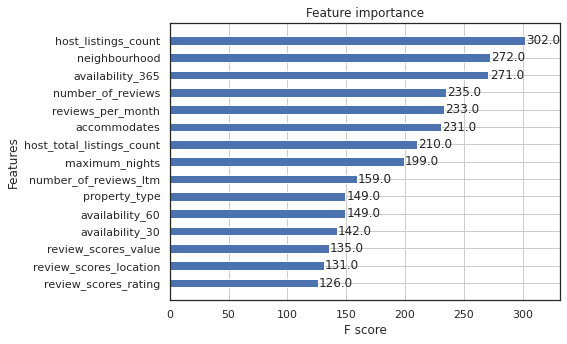

In [ ]:
# PLOTTING, can be done in many ways:

# plot_importance(xgb4, max_num_features=15, height=0.5)#, xlim=(0,10), ylim=(0,10))
# # fig.set_size_inches(4,2);
# pyplot.show()

# or

ax4 = plot_importance(xgb4, max_num_features=15, height=0.5)#, 
fig  = ax4.figure
fig.set_size_inches(7,5);

# or 

# ax4 = xgb.plot_importance(xgb4, max_num_features=15)
# fig = ax4.figure
# fig.set_size_inches(7,5);

In [407]:
# search4.feature_importances_

***Which model is the best?***

The best ML model in this dataset is: lowest MAE and biggest R2

In [408]:
# Create dataframe out of all metrics

Model = ['LinearRegression', 'RFRegression_1', 'RFRegression_2', 'RFRegression_3', 'XGB_1',  'XGB_2' , 'XGB_3']
MAE = [mae_lr, mae_rfr1, mae_rfr2, mae_rfr3, mae_xg1, mae_xg2, mae_xg4]
MSE = [mse_lr, mse_rfr1, mse_rfr2, mse_rfr3, mse_xg1, mse_xg2, mse_xg4]
RMSE = [rmse_lr, rmse_rfr1, rmse_rfr2, rmse_rfr3, rmse_xg1, rmse_xg2, rmse_xg4]
R2 = [r2_lr, r2_rfr1, r2_rfr2, r2_rfr3, r2_xg1, r2_xg2, r2_xg4]
Parameter = ['static', 'static', 'static', 'optimized', 'static', 'static', 'opimized' ]

cols = {'Model':Model, 'MAE':MAE ,  'MSE': MSE,  'RMSE': RMSE, 'R2': R2, 'Parameter': Parameter}

metric1 = pd.DataFrame(cols)
# metric1 = pd.DataFrame(cols, index = ['LinearRegression', 'RFRegression', 'RFRegression_best', 'XGB'])

metric1

Model     MAE        MSE     RMSE     R2  Parameter
0  LinearRegression  67.981   9354.049   96.716  0.467     static
1    RFRegression_1  56.439   7699.007   87.744  0.561     static
2    RFRegression_2  48.787   5821.897   76.301  0.668     static
3    RFRegression_3  49.366   5964.874   77.233  0.660  optimized
4             XGB_1  73.581  13746.861  117.247  0.217     static
5             XGB_2  48.675   6063.422   77.868  0.654     static
6             XGB_3  65.859   8874.972   94.207  0.494   opimized

In [409]:
Best_model = metric1.tail(5)
Best_model

Model     MAE        MSE     RMSE     R2  Parameter
2  RFRegression_2  48.787   5821.897   76.301  0.668     static
3  RFRegression_3  49.366   5964.874   77.233  0.660  optimized
4           XGB_1  73.581  13746.861  117.247  0.217     static
5           XGB_2  48.675   6063.422   77.868  0.654     static
6           XGB_3  65.859   8874.972   94.207  0.494   opimized

In [410]:
metric1[metric1['MAE']<48.9]

Model     MAE       MSE    RMSE     R2 Parameter
2  RFRegression_2  48.787  5821.897  76.301  0.668    static
5           XGB_2  48.675  6063.422  77.868  0.654    static

***PDP-Plot***

In [411]:
plt.rcParams['figure.dpi'] = 72

In [412]:
!pip install -U setuptools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [413]:
!pip install pip==21.3.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 68.9 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.0.1
    Uninstalling pip-23.0.1:
      Successfully uninstalled pip-23.0.1


In [414]:
!pip install PDPbox

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 34.0 MB 1.1 MB/s             
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 37.8 MB 1.2 MB/s             
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for PDPbox: filename=PDPbox-0.2.1-py3-none-any.whl size=35758224 sha256=0c4698e8ce25572d75c529abb566ca216f1677206231145a5ed3f7b839f8306a
  Stored in directory: /root/.cache/pip/wheels/f2/5e/63/62e00a642415e064a55f53b5095ceb1420d24685125420d3ac
  Created wheel for matplotlib: filename=matplotlib-3.1.1-cp39-cp39-linux_x86_64.whl size=12060049 sha256=8e4a2bed5c4515503ae6d75cb7b69197f538e60b43578da0228b9a8187a04eb8
  Stored in directory: /root/.cache/pip/wheels/25/d0/ab/05f776f079a53f4c6a12c98220910f4d0d245609b8c673a5ad
  Created wheel for sklearn: filename=sklearn-0.0.post4-py3-none-any.whl size=2973 sha256=4c7718cabf

In [ ]:
# import matplotlib
# print(matplotlib.__version__)

In [415]:
!pip install --upgrade matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.6 MB 19.0 MB/s            
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.1
    Uninstalling matplotlib-3.1.1:
      Successfully uninstalled matplotlib-3.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pdpbox 0.2.1 requires matplotlib==3.1.1, but you have matplotlib 3.7.1 which is incompatible.
basemap 1.3.6 requires matplotlib<3.7,>=1.5; python_version >= "3.5", but you have matplotlib 3.7.1 which is incompatible.


In [416]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature_xgbr = 'accommodates'

isolated = pdp_isolate(
    model=xgbreg1,
    dataset=X_test,
    model_features=X_test.columns,
    feature=feature_xgbr
)

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <AxesSubplot: >, 'pdp_ax': <AxesSubplot: xlabel='accommodates'>})

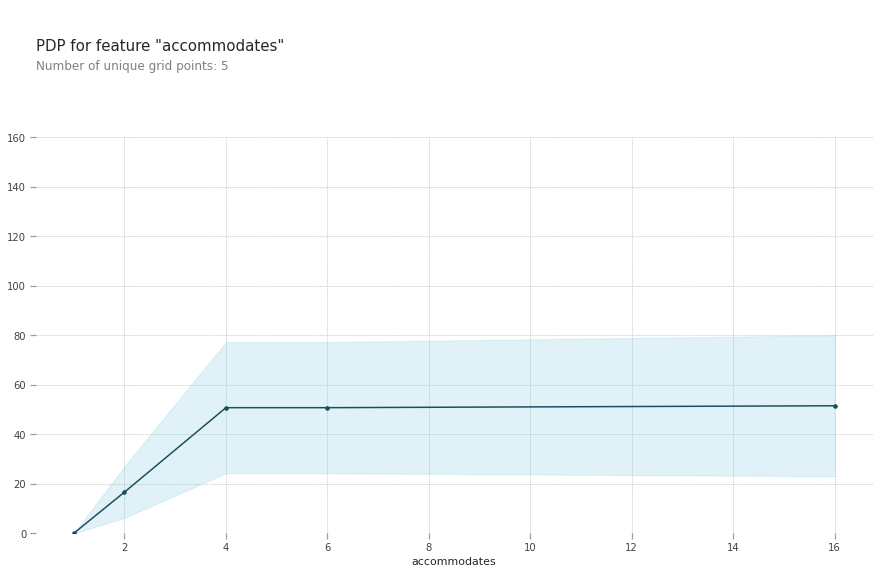

In [417]:
pdp_plot(isolated, feature_name=feature_xgbr)

***PDP-Plot with 2 features***

In [418]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

features2a = ['bedrooms', 'accommodates']

interaction = pdp_interact(
    model=xgbreg1,
    dataset=X_test,
    model_features=X_test.columns,
    features=features2a
)

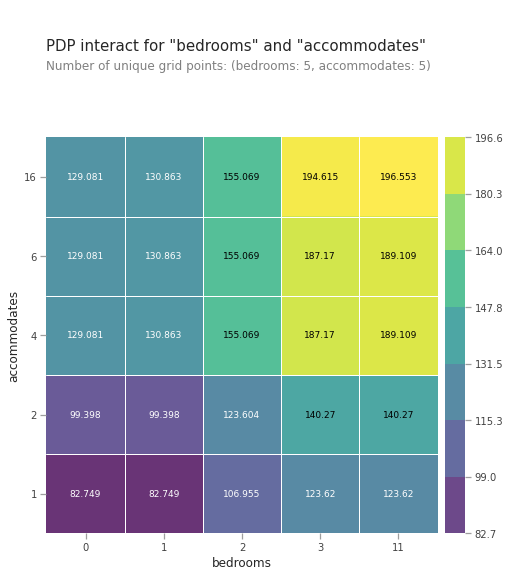

In [419]:
pdp_interact_plot(interaction, plot_type='grid', feature_names=features2a);

Shapley Value

In [420]:
# Let's limit the features into:

# feature_sh = ['host_listings_count',
#               'number_of_reviews',
#               'host_total_listings_count'
# , 'availability_365', 'maximum_nights', 
# 'availability_30', 'availability_60', 
# 'review_scores_rating', 
# 'reviews_per_month', 'accommodates',  
# 'bedrooms', 'beds']

feature_sh = ['accommodates', 'host_listings_count', 'number_of_reviews', 'maximum_nights', 'review_scores_rating', 
              'bedrooms', 'beds', 'reviews_per_month']

In [421]:
# Define X & y

X_train = df[feature_sh]
y_train = df['price']

In [422]:
# Split into train & test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

X_train.shape, y_train.shape,  X_test.shape, y_test.shape

((5278, 8), (5278,), (1320, 8), (1320,))

In [423]:
# I want to compare between xgbreg1 & xgbreg2.  Pipeline and non-pipeline

xgbreg1 = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(),
    XGBRegressor(n_estimators=100, random_state=42, n_jobs=2, max_depth=4,  learning_rate=0.1)
)

xgbreg1.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder', OrdinalEncoder(cols=[], mapping=[])),
                ('simpleimputer', SimpleImputer()),
                ('xgbregressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=4, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=2, num_parallel_tree=None, predictor=None,
                              random_state=42, ...))])

In [424]:
# encoder = ce.OrdinalEncoder()
# X_train_encoded = encoder.fit_transform(X_train)
# X_test_encoded = encoder.transform(X_test)

xgbreg2 = XGBRegressor(n_estimators=100, 
                       random_state=42, 
                       n_jobs=2, 
                       max_depth=4,  
                       learning_rate=0.1)

xgbreg2.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=2, num_parallel_tree=None, predictor=None,
             random_state=42, ...)

In [425]:
X_train.isnull().sum()

accommodates            0
host_listings_count     0
number_of_reviews       0
maximum_nights          0
review_scores_rating    0
bedrooms                0
beds                    0
reviews_per_month       0
dtype: int64

In [426]:
# Show particular features 

row = X_test.iloc[[1]]
row

accommodates  host_listings_count  number_of_reviews  maximum_nights  \
5485             2                    1                  0              60   

      review_scores_rating  bedrooms  beds  reviews_per_month  
5485                   0.0       1.0   1.0                0.0

In [427]:
# What was the actual rent for this airbnb?
y_test.iloc[[1]]

5485    229.0
Name: price, dtype: float64

In [428]:
# What does the model predict for this airbnb?
xgbreg2.predict(row)

array([ 162.16695], dtype=float32)

In [429]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 572 kB 30.7 MB/s            


In [430]:
import shap 

explainer = shap.TreeExplainer(xgbreg2)
shap_values = explainer.shap_values(row)

# load JS visualization code to notebook
shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value,
    shap_values=shap_values,
    features=row
)

***Features pushing the prediction higher are shown in red, those pushing the prediction lower are in blue***

***Using the predict function***

In [431]:
def predict(Accommodates, Host_Listings_Count, Number_Of_Reviews, Maximum_Nights, Review_Scores_Rating, Bedrooms, Beds, Reviews_per_Month):

    # Make dataframe from the inputs
    dshap = pd.DataFrame(
        data=[[Accommodates, Host_Listings_Count, Number_Of_Reviews, Maximum_Nights, Review_Scores_Rating, Bedrooms, Beds, Reviews_per_Month]], 
        columns=['accommodates', 'host_listings_count', 'number_of_reviews', 'maximum_nights', 'review_scores_rating', 
              'bedrooms', 'beds', 'reviews_per_month']
    )

    # Get the model's prediction
    pred = xgbreg2.predict(dshap)[0]

    # Calculate shap values
    explainer = shap.TreeExplainer(xgbreg2)
    shap_values = explainer.shap_values(dshap)

    # Get series with shap values, feature names, & feature values
    feature_names = dshap.columns
    feature_values = dshap.values[0]
    shaps = pd.Series(shap_values[0], zip(feature_names, feature_values))

    # Print results
    result = f'${pred:,.0f} estimated rent for this SF_airbnb. \n\n'
    #result += f'Starting from baseline of ${explainer.expected_value:,.0f} \n'
    result += shaps.to_string()
    print(result)


    # Show shapley values force plot
    shap.initjs()
    return shap.force_plot(
        base_value=explainer.expected_value, 
        shap_values=shap_values, 
        features=dshap
    )

In [432]:
row

accommodates  host_listings_count  number_of_reviews  maximum_nights  \
5485             2                    1                  0              60   

      review_scores_rating  bedrooms  beds  reviews_per_month  
5485                   0.0       1.0   1.0                0.0

In [433]:
listing_data_95.reviews_per_month.max()

36.490000000000002

In [434]:
# features: Accommodates, Host_Listings_Count, Number_Of_Reviews, Maximum_Nights, Review_Scores_Rating, Bedrooms, Beds, Reviews_per_Month
predict(2, 1, 300, 50, 4.5, 2.0, 2.0, 36.49)

$130 estimated rent for this SF_airbnb. 

(accommodates, 2.0)           -20.599365
(host_listings_count, 1.0)      5.113671
(number_of_reviews, 300.0)      2.035045
(maximum_nights, 50.0)         -0.770046
(review_scores_rating, 4.5)   -32.169952
(bedrooms, 2.0)                26.384684
(beds, 2.0)                     1.418889
(reviews_per_month, 36.49)    -42.086887


In [435]:
# features: Accommodates, Host_Listings_Count, Number_Of_Reviews, Maximum_Nights, Review_Scores_Rating, Bedrooms, Beds, Reviews_per_Month
predict(2, 1, 300, 14, 6.5, 1.0, 1.0, 36.49)

$152 estimated rent for this SF_airbnb. 

(accommodates, 2.0)           -21.155603
(host_listings_count, 1.0)      9.256778
(number_of_reviews, 300.0)      1.892383
(maximum_nights, 14.0)         13.471253
(review_scores_rating, 6.5)    27.866648
(bedrooms, 1.0)               -23.380276
(beds, 1.0)                    -0.671651
(reviews_per_month, 36.49)    -45.821915


***Attachment***

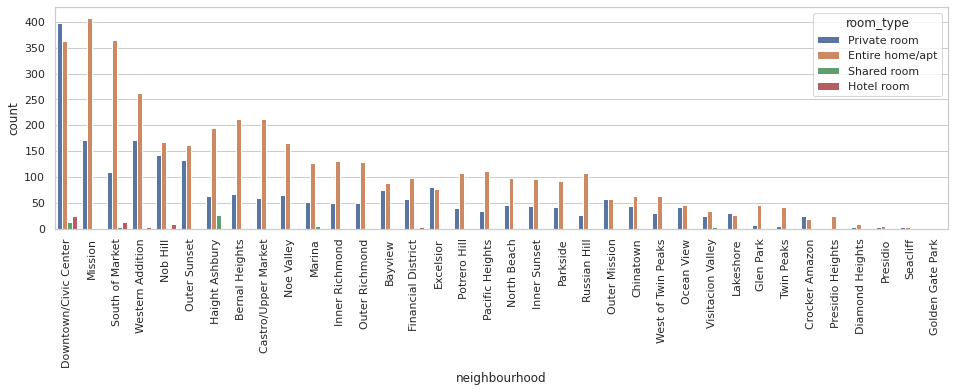

In [436]:
# Neighborhood & Room type

from seaborn import countplot

sns.set_style('whitegrid', {'axes.linewidth': 0.5}) # only: white, dark, whitegrid, darkgrid, ticks
plt.figure(figsize=(16,4))

chart = sns.countplot(x ='neighbourhood',  data = df, hue='room_type', order= df['neighbourhood'].value_counts().index)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);

In [437]:
filtered_df = listing_data_95[[ "host_is_superhost","host_listings_count", "neighbourhood", "property_type","room_type", "accommodates", "bedrooms", 
               "beds", "price", "number_of_reviews", "review_scores_rating", 
               "reviews_per_month"]]
room_type = pd.get_dummies(filtered_df.room_type).astype(int)
filtered_df = filtered_df.drop(['room_type'], axis = 1)
filtered_df = pd.concat((filtered_df, room_type, room_type), axis = 1)
filtered_df
X, y = clean_data(filtered_df)

In [438]:
from sklearn.model_selection import train_test_split

In [439]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)

In [440]:
X_train.head()

host_is_superhost  host_listings_count  accommodates  bedrooms  beds  \
1952                  0                    2             3       1.0   1.0   
4715                  1                    2             2       1.0   1.0   
6418                  0                    1             7       3.0   4.0   
3010                  0                   49             1       1.0   1.0   
5645                  0                    1             1       1.0   1.0   

      number_of_reviews  review_scores_rating  reviews_per_month  \
1952                167                  4.81               3.00   
4715                113                  4.90               6.92   
6418                  1                  5.00               1.00   
3010                132                  4.53               2.99   
5645                 10                  5.00               2.17   

      Entire home/apt  Hotel room  ...  property_type_Room in boutique hotel  \
1952                0           0  ...                                     0   
4715                0           0  ...                                     0   
6418                1           0  ...                                     0   
3010                0           0  ...                                     0   
5645                0           0  ...                                     0   

      property_type_Room in hostel  property_type_Room in hotel  \
1952                             0                            0   
4715                             0                            0   
6418                             0                            0   
3010                             0                            0   
5645                             0                            0   

      property_type_Room in serviced apartment  \
1952                                         0   
4715                                         0   
6418                                         0   
3010                                         0   
5645                                         0   

      property_type_Shared room in bed and breakfast  \
1952                                               0   
4715                                               0   
6418                                               0   
3010                                               0   
5645                                               0   

      property_type_Shared room in home  property_type_Shared room in hostel  \
1952                                  0                                    0   
4715                                  0                                    0   
6418                                  0                                    0   
3010                                  0                                    0   
5645                                  0                                    0   

      property_type_Shared room in hotel  property_type_Shared room in loft  \
1952                                   0                                  0   
4715                                   0                                  0   
6418                                   0                                  0   
3010                                   0                                  0   
5645                                   0                                  0   

      property_type_Tiny home  
1952                        0  
4715                        0  
6418                        0  
3010                        0  
5645                        0  

[5 rows x 94 columns]

In [441]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [442]:
from sklearn.metrics.pairwise import normalize
lm_model = LinearRegression() # Instantiate
lm_model.fit(X_train, y_train) #Fit

LinearRegression()

In [443]:
#Predict and score the model
y_train_preds = lm_model.predict(X_train)
print("The r-squared score for the model on the training data was {} on {} values. The RMSE was {}".format(r2_score(y_train, y_train_preds), len(y_train), mean_squared_error(y_train, y_train_preds)))
y_test_preds = lm_model.predict(X_test) 
print("The r-squared score for the model on the test data was {} on {} values.  The RMSE was {}".format(r2_score(y_test, y_test_preds), len(y_test), mean_squared_error(y_test, y_test_preds)))

The r-squared score for the model on the training data was 0.516008755498957 on 3119 values. The RMSE was 6146.147070310882
The r-squared score for the model on the test data was 0.5044524273499829 on 1337 values.  The RMSE was 6414.029952790523


**Visualize the model and its performance**

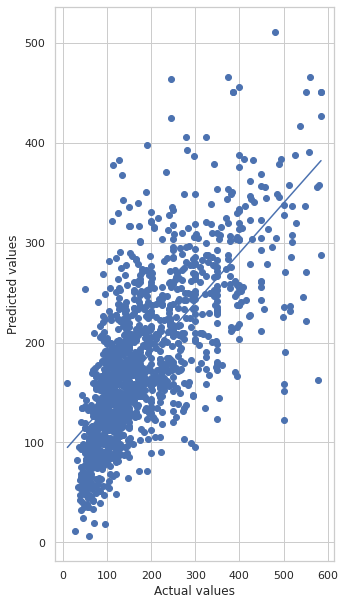

In [444]:
plt.scatter(y_test, y_test_preds)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, y_test_preds, 1))(np.unique(y_test)))

To better visualise the data, I created a chart that shows the actual values against the predicted values on the same planes.

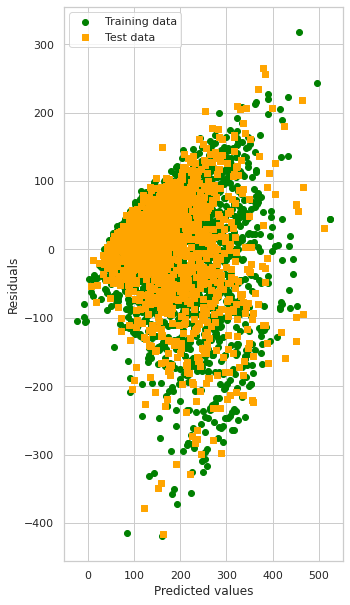

In [445]:
plt.scatter(y_train_preds,  y_train_preds - y_train,
            c='green', marker='o', label='Training data')
plt.scatter(y_test_preds,  y_test_preds - y_test,
            c='orange', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.show()

As illustrated in the above diagrams, the prediction model is not too far from the actual results.

In [446]:
y_test

1859    199.0
2721     88.0
724      99.0
1178    100.0
976     225.0
        ...  
3236     66.0
2019    200.0
3322     73.0
3455    240.0
2971    144.0
Name: price, Length: 1337, dtype: float64

In [447]:
y_test_preds

array([ 156.61047193,  206.30996083,  117.37520383, ...,  112.4736006 ,
        183.4105281 ,  213.46237838])

In [448]:
listing_data_95.columns

Index(['listing_id', 'host_id', 'host_name', 'host_since',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood',
       'neighbourhood_group_cleansed', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms_text',
       'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights',
       'maximum_nights', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_lis

In [449]:
listing_data_95[['review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value']]

review_scores_rating  review_scores_accuracy  review_scores_cleanliness  \
0                     4.68                    4.78                       4.45   
1                     4.86                    4.93                       4.92   
2                     4.88                    4.85                       4.87   
3                     4.67                    4.44                       4.44   
4                     4.87                    4.88                       5.00   
...                    ...                     ...                        ...   
6784                  4.95                    4.97                       4.98   
6785                  4.57                    4.42                       4.85   
6786                  4.91                    4.94                       4.97   
6787                  4.91                    4.91                       4.91   
6788                  4.48                    4.48                       4.21   

      review_scores_checkin  review_scores_communication  \
0                      4.86                         4.81   
1                      4.95                         4.88   
2                      4.89                         4.85   
3                      4.78                         4.78   
4                      4.94                         5.00   
...                     ...                          ...   
6784                   4.98                         4.98   
6785                   4.84                         4.71   
6786                   4.96                         4.97   
6787                   4.97                         4.98   
6788                   4.90                         4.79   

      review_scores_location  review_scores_value  
0                       4.81                 4.66  
1                       4.98                 4.76  
2                       4.77                 4.68  
3                       4.67                 4.67  
4                       4.94                 4.75  
...                      ...                  ...  
6784                    4.84                 4.84  
6785                    4.87                 4.19  
6786                    4.90                 4.77  
6787                    4.75                 4.86  
6788                    4.28                 4.45  

[4456 rows x 7 columns]

In [450]:
## Determining the quartile ranges of the 'price' variable 

listing.price.quantile([0.25,0.5,0.75])

0.25    100.0
0.50    150.0
0.75    250.0
Name: price, dtype: float64

# Now that we've analyzed multiple aspects of the data set, let's combine all the import features we found and utilize scikit learn to predict prices

In [451]:
listing_data_95.to_csv('cleaned_detailed_listings.csv',index=False)

***What are the locations that people rent Airbnb?***

First I would like to have a visual inspection of how the data looks on the map

***Some map visualizations***

The density of all locations is plotted as a heatmap.

In [452]:
def display_listing_heatmap(df):
    '''
    Use folium library to generate and display an interactive heatmap of the Airbnb listings.

    INPUT: Airbnb listing pandas DataFrame containing latitude and longitude
    OUTPUT: None
    '''
    import folium
    from folium.plugins import HeatMap
    m=folium.Map([37.76,-122.44,],zoom_start=13)
    HeatMap(df[['latitude','longitude']].dropna(),radius=8,gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(m)
    display(m)
display_listing_heatmap(listing_data_95)

The prices are plotted on the map as colored dots.

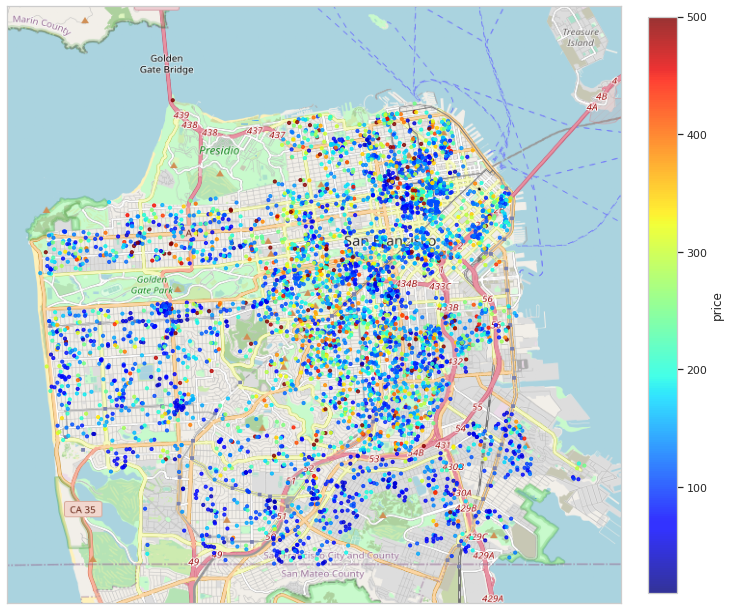

In [453]:
def display_price_on_map(df):
    '''
    Show listing price as colored dots on map.
    
    INPUT: Airbnb listing pandas DataFrame containing 'longitude', 'latitude', and 'price' columns.
    OUTPUT: None
    Dependence: Needs the map image of SF, longitude range (-122.52,-122.3594) and latitude range(37.7,37.83),
                Can be generated by OpenStreet API.

    '''
    BBox = [-122.52,-122.3594,37.7,37.83]
    north_CA_map = plt.imread('SF_map.png')
    fig, ax = plt.subplots(figsize = (12,12))
    xbins = np.arange(BBox[0],BBox[1]+0.001, 0.001)
    ybins = np.arange(BBox[2],BBox[3]+0.001, 0.001)

    #ax.hist2d('longitude', 'latitude', bins = [xbins,ybins], data = df, cmap = 'winter', cmin = 2)
    im = ax.scatter(df.longitude, df.latitude, zorder=1, alpha= 0.8, c = df.price, cmap = plt.get_cmap('jet'), 
                    s=10 ,vmax = 500)
    fig.colorbar(im, ax = ax, fraction = 0.043, pad = 0.04, label = 'price')
    ax.set_xlim(BBox[0],BBox[1])
    ax.set_ylim(BBox[2],BBox[3])

    ax.imshow(north_CA_map, zorder=0, extent = BBox, aspect= 1.2)
    plt.xticks([])
    plt.yticks([]);
display_price_on_map(listing_data_95)

We can see that the higher priced listings are mostly in the central areas and houses very close to the coast.

***How does neighborhood affect pricing?***

Which neighbourhoods have the highest number of hosts and what is the price distribution of each neighborhood?

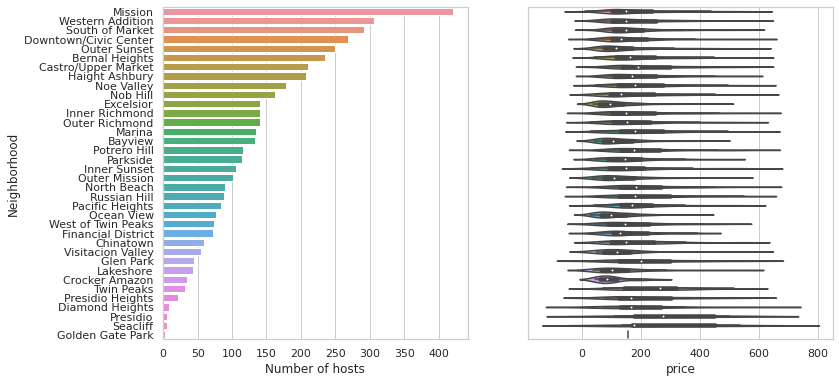

In [454]:
def display_neighbour(df):
    '''
    Displays a bar plot showing the five neighbourhood with highest listing counts, 
    and the violin plot of the price distribution within the neighbourhood
    
    INPUT: Airbnb listing pandas DataFrame with columns 'neighbourhood_cleansed', 'price'.
    OUTPUT: None
    '''
    sns.set(style = 'whitegrid')
    neighbour_list = df.neighbourhood.value_counts()[0:36]
    neighbour_count = np.array(neighbour_list)
    neighbour_list = np.array(neighbour_list.index)
    fig, ax = plt.subplots(1,2,figsize = (12,6))

    sns.barplot(x = neighbour_count, y = neighbour_list, ax = ax[0])
    df_sub = df.query('neighbourhood in @neighbour_list and price < 600')

    sns.violinplot(data = df_sub, y='neighbourhood', x ='price',order = neighbour_list, ax = ax[1]);
    #plt.xticks(rotation = 20)
    ax[0].set_ylabel('Neighborhood')
    ax[0].set_xlabel('Number of hosts')
    ax[1].set_ylabel('')
    ax[1].set_yticks([]);
display_neighbour(listing_data_95)

The following plot shows the locations in these neighbourhoods on the map.

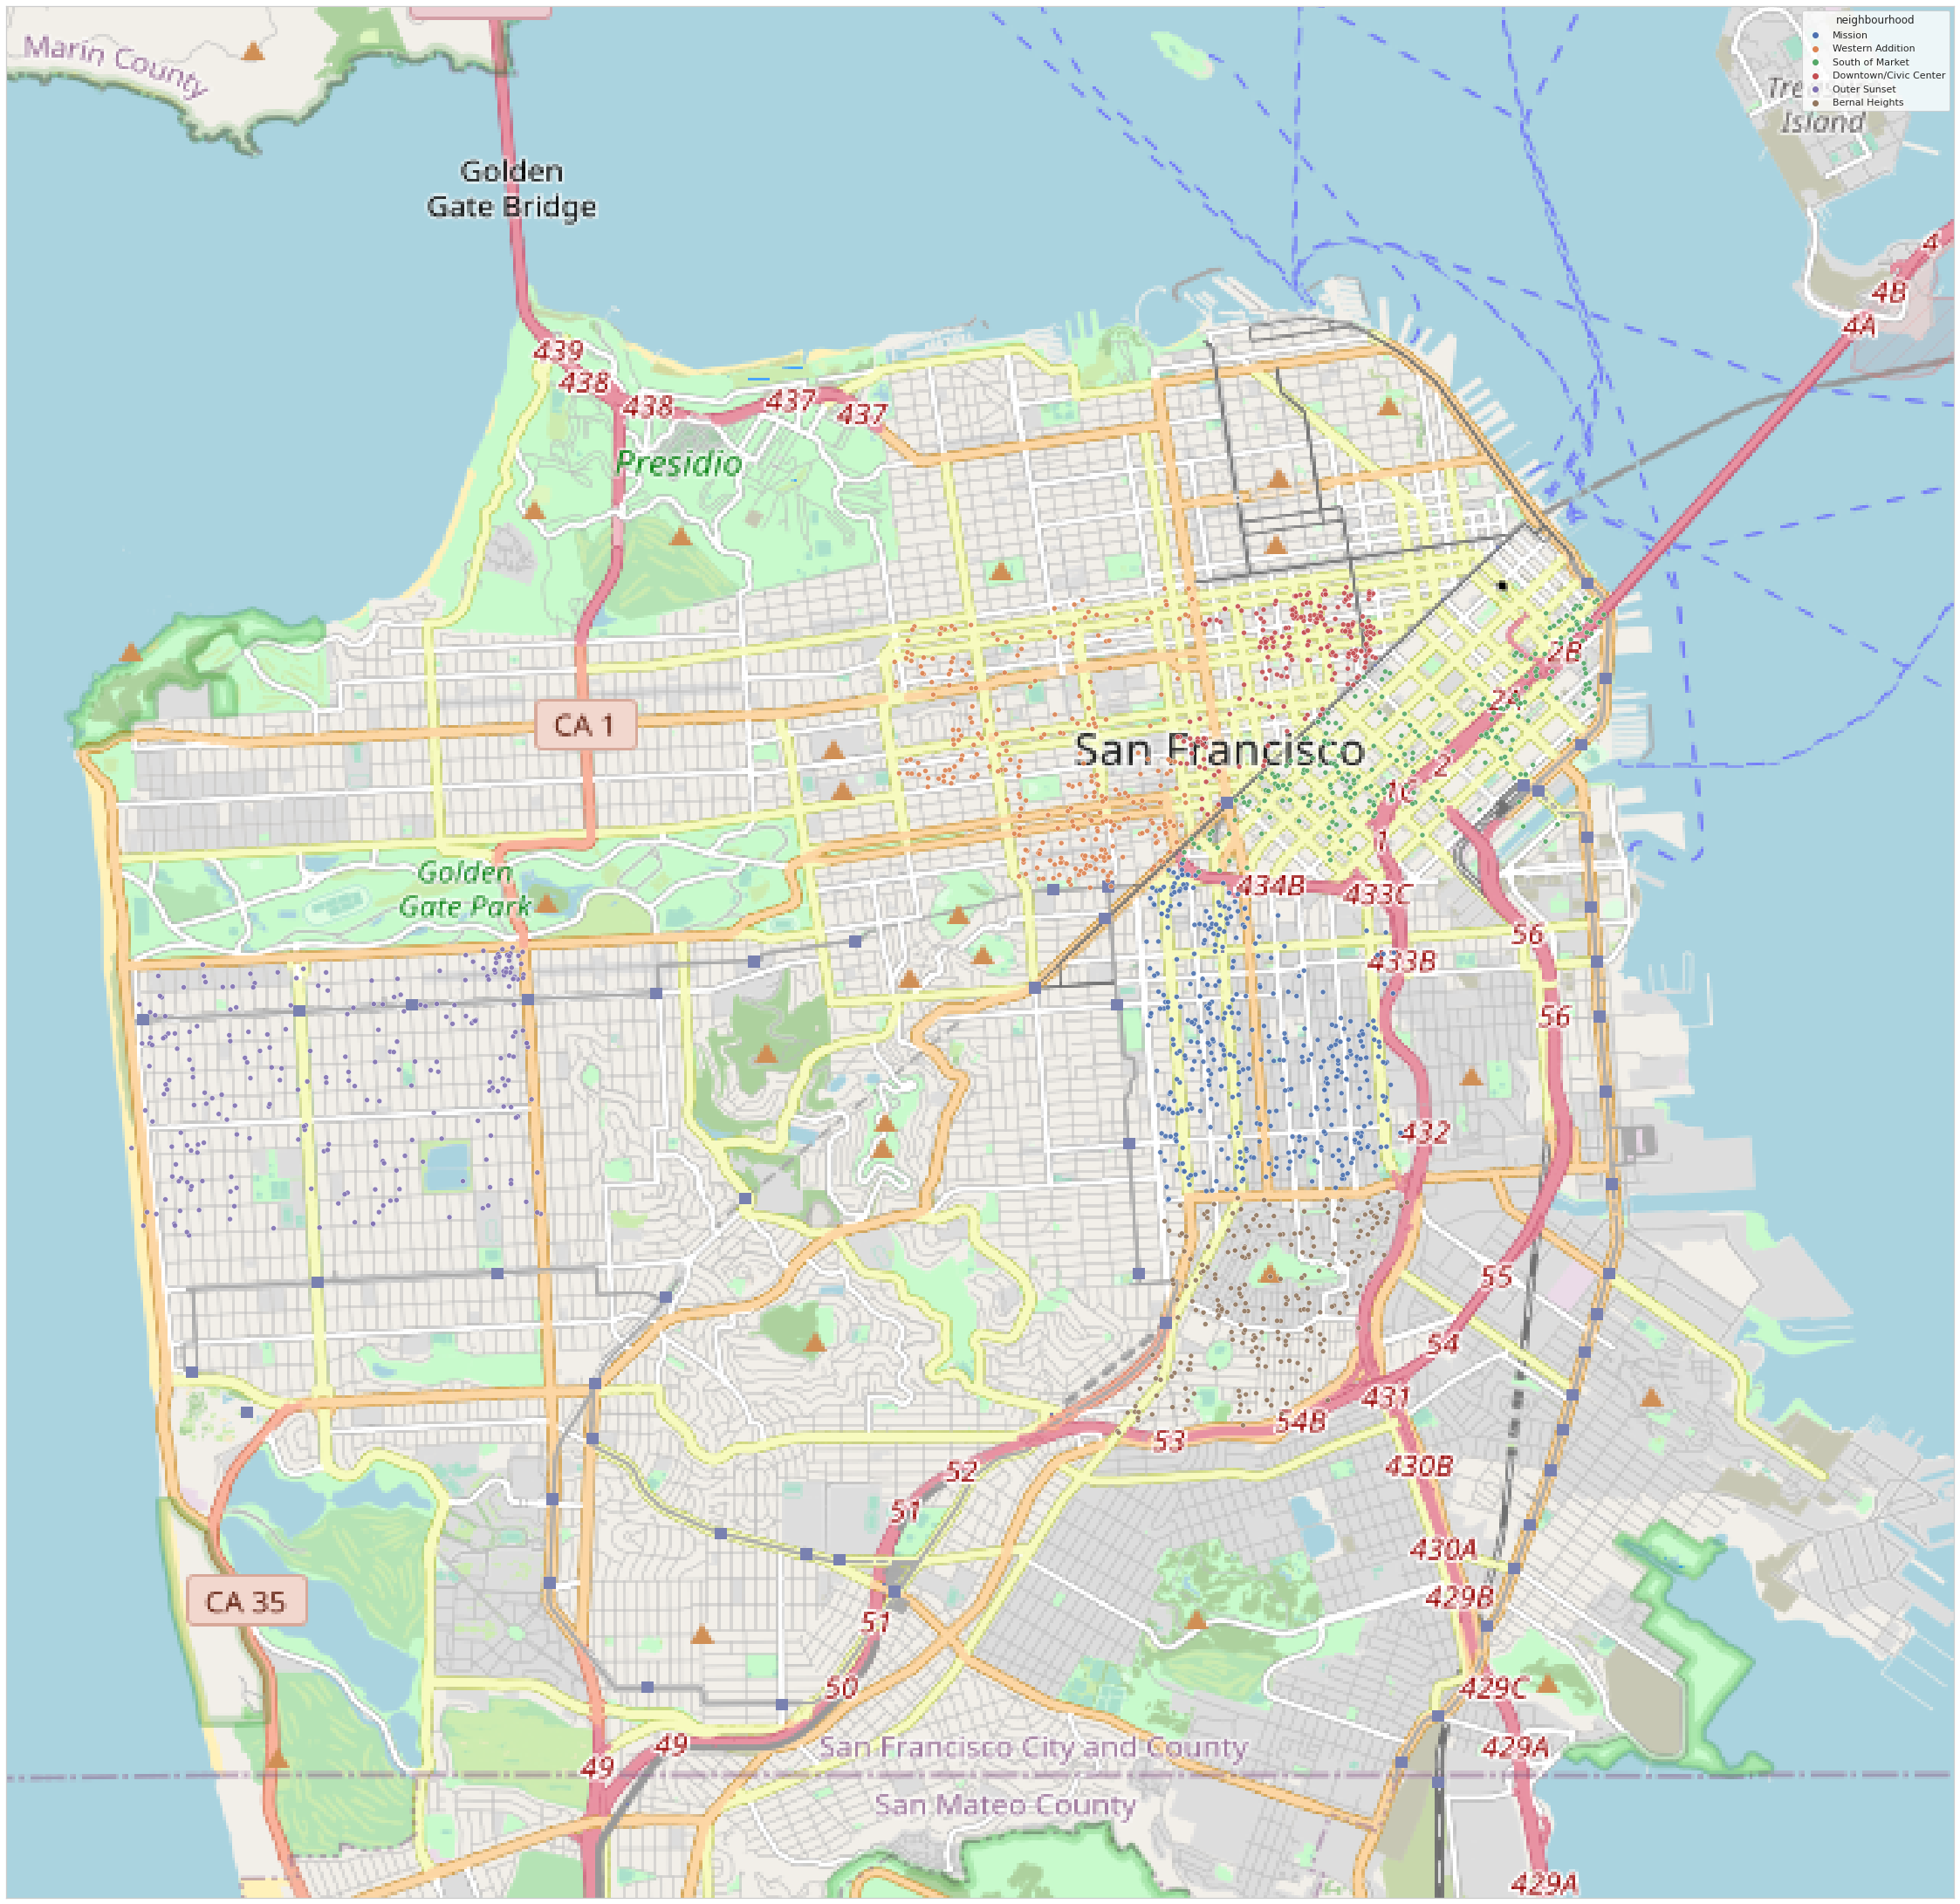

In [455]:
def display_neighbour_on_map(df):
    '''
    Display the five neighbourhoods with highest listing counts and the corresponding listings on the map.
    
    INPUT: airbnb listing pandas DataFrame with columns 'longitude', 'latitude', and 'neighbourhood_cleansed'.
    OUTPUT: None
    Dependence: Needs the map image of SF, longitude range (-122.52,-122.3594) and latitude range(37.7,37.83),
                Can be generated by OpenStreet API.
    '''
    BBox = [-122.52,-122.3594,37.7,37.83]
    north_CA_map = plt.imread('SF_map.png')
    fig, ax = plt.subplots(figsize = (40,40))
    neighbour_list = df.neighbourhood.value_counts()[0:6]
    neighbour_count = np.array(neighbour_list)
    neighbour_list = np.array(neighbour_list.index)
    df_sub = df.query('neighbourhood in @neighbour_list and price < 600')
    sns.scatterplot(data = df_sub, x = 'longitude', y = 'latitude', hue = 'neighbourhood',
                    hue_order = neighbour_list,alpha = 0.9,ax = ax)
    ax.set_xlim(BBox[0],BBox[1])
    ax.set_ylim(BBox[2],BBox[3])

    ax.imshow(north_CA_map, zorder=0, extent = BBox, aspect= 1.2)
    # (ax.legend()).texts[0].set_text('Neighbourhood')
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks([])
    plt.yticks([]);

display_neighbour_on_map(listing_data_95)

Most of the listings are in the central and north-east coastal areas. Also, Downtown/Civic Center area have the lowest average price, but there is a clear separation of a group of higher prices around 200-270, and another group of lower prices around 100-150.

In [456]:
data = listing_data_95[['price',
           'property_type',
           'neighbourhood',
           'host_is_superhost',
           'host_listings_count',
           'reviews_per_month',
           'number_of_reviews',
           'room_type',
           'accommodates',
           'bedrooms',
           'beds',
           'review_scores_rating',
           'instant_bookable',
           'amenities']]

In [457]:
data.columns

Index(['price', 'property_type', 'neighbourhood', 'host_is_superhost',
       'host_listings_count', 'reviews_per_month', 'number_of_reviews',
       'room_type', 'accommodates', 'bedrooms', 'beds', 'review_scores_rating',
       'instant_bookable', 'amenities'],
      dtype='object')

In [458]:
# instant bookable is little bit more complicated.
# we use pandas get_dummies function to convert the categorical variable into indicator variables

instant_booking = pd.get_dummies(data.instant_bookable, prefix="instant_bookable").astype(int)
room_type = pd.get_dummies(data.room_type).astype(int)
property_type = pd.get_dummies(data.property_type).astype(int)
neighbourhood = pd.get_dummies(data.neighbourhood).astype(int)
instant_booking

instant_bookable_0  instant_bookable_1
0                      1                   0
1                      1                   0
2                      1                   0
3                      1                   0
4                      1                   0
...                  ...                 ...
6784                   0                   1
6785                   1                   0
6786                   0                   1
6787                   1                   0
6788                   1                   0

[4456 rows x 2 columns]

In [459]:
# ib has 2 columns, so we can just drop one of them.
instant_booking = instant_booking.drop('instant_bookable_0', axis = 1)

In [460]:
# we drop the original columns and replace them with indicator columns
data = data.drop(['instant_bookable', 'room_type', 'property_type', 'neighbourhood'], axis = 1)
data = pd.concat((data, instant_booking, room_type, property_type, neighbourhood), axis = 1)

In [461]:
# splitting the amenities list to draw out how many amenities each listing has

amenities_list = []

for element in data.amenities:
    element = element[1:]
    element = element[:-1]
    x = element.split()
    amenities_list.append(len(x))

data.amenities = amenities_list

In [462]:
data

price  host_is_superhost  host_listings_count  reviews_per_month  \
0      55.0                  0                    9               0.86   
1     194.0                  1                    1               2.28   
2     235.0                  0                    2               0.67   
3      56.0                  0                   12               0.09   
4     575.0                  0                    2               0.17   
...     ...                ...                  ...                ...   
6784  175.0                  1                    1               2.48   
6785  399.0                  0                    1               0.57   
6786  125.0                  0                    2               2.42   
6787   70.0                  1                    1               1.98   
6788  245.0                  0                    1               0.24   

      number_of_reviews  accommodates  bedrooms  beds  review_scores_rating  \
0                   120             1       1.0   1.0                  4.68   
1                   371             3       1.0   2.0                  4.86   
2                   111             4       2.0   2.0                  4.88   
3                     9             1       1.0   1.0                  4.67   
4                    28             4       2.0   2.0                  4.87   
...                 ...           ...       ...   ...                   ...   
6784                318             2       1.0   1.0                  4.95   
6785                 63            12       4.0   4.0                  4.57   
6786                308             2       1.0   1.0                  4.91   
6787                129             6       3.0   4.0                  4.91   
6788                 30             4       3.0   4.0                  4.48   

      amenities  ...  Potrero Hill  Presidio  Presidio Heights  Russian Hill  \
0            41  ...             0         0                 0             0   
1           144  ...             0         0                 0             0   
2            27  ...             0         0                 0             0   
3            53  ...             0         0                 0             0   
4            67  ...             0         0                 0             0   
...         ...  ...           ...       ...               ...           ...   
6784        124  ...             0         0                 0             0   
6785        129  ...             0         0                 0             1   
6786         82  ...             0         0                 0             0   
6787        138  ...             0         0                 0             0   
6788        115  ...             1         0                 0             0   

      Seacliff  South of Market  Twin Peaks  Visitacion Valley  \
0            0                0           0                  0   
1            0                0           0                  0   
2            0                0           0                  0   
3            0                0           0                  0   
4            0                0           0                  0   
...        ...              ...         ...                ...   
6784         0                0           0                  0   
6785         0                0           0                  0   
6786         0                0           0                  0   
6787         0                0           0                  0   
6788         0                0           0                  0   

      West of Twin Peaks  Western Addition  
0                      0                 0  
1                      0                 1  
2                      0                 0  
3                      0                 0  
4                      0                 1  
...                  ...               ...  
6784                   0                 0  
6785                   0                 0  
6786     

## Now that we converted all the varibles to numerical values, let's make our training and testing data sets.

Using scikit learn's train_test_split function, we can cross-validate the data set by partitioning it into training and testing data sets.

In [463]:
listing_data_95.price.describe()

count    4456.000000
mean      180.112208
std       113.049393
min        10.000000
25%       100.000000
50%       147.000000
75%       230.000000
max       585.000000
Name: price, dtype: float64

In [464]:
# Some of the prices over 500 are extremely high, and may intercept with fitting
# dropping these data gets rids of 5% of the total data
print('amount of data original: ' + str(len(data)))
data = data.query('price <= 500')
data = data[data['number_of_reviews'] > 10] ###
print('amount of data after removing few properties: ' + str(len(data)))

amount of data original: 4456
amount of data after removing few properties: 2587


In [465]:
data = pd.get_dummies(data)
data.head()

price  host_is_superhost  host_listings_count  reviews_per_month  \
0   55.0                  0                    9               0.86   
1  194.0                  1                    1               2.28   
2  235.0                  0                    2               0.67   
5  129.0                  1                    2               4.68   
6   95.0                  1                    2               0.12   

   number_of_reviews  accommodates  bedrooms  beds  review_scores_rating  \
0                120             1       1.0   1.0                  4.68   
1                371             3       1.0   2.0                  4.86   
2                111             4       2.0   2.0                  4.88   
5                761             3       1.0   1.0                  4.91   
6                 18             2       1.0   1.0                  4.94   

   amenities  ...  Potrero Hill  Presidio  Presidio Heights  Russian Hill  \
0         41  ...             0         0                 0             0   
1        144  ...             0         0                 0             0   
2         27  ...             0         0                 0             0   
5         91  ...             0         0                 0             0   
6        143  ...             0         0                 0             0   

   Seacliff  South of Market  Twin Peaks  Visitacion Valley  \
0         0                0           0                  0   
1         0                0           0                  0   
2         0                0           0                  0   
5         0                0           0                  0   
6         0                0           0                  0   

   West of Twin Peaks  Western Addition  
0                   0                 0  
1                   0                 1  
2                   0                 0  
5                   0                 0  
6                   0                 0  

[5 rows x 95 columns]

In [466]:
data.columns

Index(['price', 'host_is_superhost', 'host_listings_count',
       'reviews_per_month', 'number_of_reviews', 'accommodates', 'bedrooms',
       'beds', 'review_scores_rating', 'amenities', 'instant_bookable_1',
       'Entire home/apt', 'Hotel room', 'Private room', 'Shared room',
       'Casa particular', 'Cycladic home', 'Entire bungalow', 'Entire cabin',
       'Entire condo', 'Entire cottage', 'Entire guest suite',
       'Entire guesthouse', 'Entire home', 'Entire in-law', 'Entire loft',
       'Entire rental unit', 'Entire serviced apartment', 'Entire townhouse',
       'Entire vacation home', 'Floor', 'Private room',
       'Private room in bed and breakfast', 'Private room in bungalow',
       'Private room in casa particular', 'Private room in condo',
       'Private room in cottage', 'Private room in guest suite',
       'Private room in home', 'Private room in hostel',
       'Private room in loft', 'Private room in rental unit',
       'Private room in resort', 'Private roo

In [468]:
import sklearn
# splitting the training and test sets with a 60% and 40% size of original
split_data = data.drop(['price'], axis = 1)

train1, test1, train2, test2 = sklearn.model_selection.train_test_split(split_data,
                                                data.price, 
                                                test_size=0.4,
                                                train_size = 0.6,
                                                random_state=13)


In [469]:
train1.shape, test1.shape, train2.shape, test2.shape

((1552, 94), (1035, 94), (1552,), (1035,))

In [470]:
scaler = StandardScaler()
scaler.fit(train1)
X_train_scaled = scaler.transform(train1)
X_test_scaled = scaler.transform(test1)

***Baseline***

In [471]:
baseline = train2.median() # median train
baseline_error = np.sqrt(mean_squared_error(y_pred=np.ones_like(test2) * baseline, y_true=test2))
baseline_error

102.95018259633325

### Let's see if a Linear Regression, Lasso, Ridge and ElasticNet models can predict the prices accurately

In [472]:
# mean of prices
mean = np.mean(data.price)

# standard deviation to compare 
std = np.std(data.price)

print("mean: " + str(mean))
print ("standard deviation: " + str(std))

mean: 175.639350599
standard deviation: 101.505075962


In [473]:
split_data.isnull().sum()

host_is_superhost      0
host_listings_count    0
reviews_per_month      0
number_of_reviews      0
accommodates           0
                      ..
South of Market        0
Twin Peaks             0
Visitacion Valley      0
West of Twin Peaks     0
Western Addition       0
Length: 94, dtype: int64

***Linear Regression, Lasso & Ridge Without Regularization. Later, I have used Linear Regression again and then LassoCV, RidgeCV and ElasticNetCV***

***Model Evaluation***

In this part, we will use 3 metric to evaluate the predictions:

1. Mean absolute error (MAE)
2. Root Mean Square Error (RMSE)
3. Median absolute error (MAE)
3. R2

In [474]:
# linear regression testing
linear_reg = linear_model.LinearRegression()
linear_reg.fit(X_train_scaled, train2)
linear_reg_error = metrics.median_absolute_error(test2, linear_reg.predict(X_test_scaled))

# lasso model testing
lasso = linear_model.Lasso()
lasso.fit(X_train_scaled, train2)
lasso_error = metrics.median_absolute_error(test2, lasso.predict(X_test_scaled))

# ridge model testing
ridge = linear_model.Ridge()
ridge.fit(X_train_scaled, train2)
ridge_error = metrics.median_absolute_error(test2, ridge.predict(X_test_scaled))
print ("Linear Regression Error : " + str(linear_reg_error))
print ("Lasso Regression Error : " + str(lasso_error))
print ("Ridge Regression Error : " + str(ridge_error))

Linear Regression Error : 39.2583674374
Lasso Regression Error : 39.1101823693
Ridge Regression Error : 37.981394608


In [475]:
# predict result using test data
y_pred = linear_reg.predict(X_test_scaled)

df_temp = pd.DataFrame({'price':test2, 'predicted price': y_pred}).sample(10)
df_temp.apply(np.floor).astype(object)

price predicted price
4824   63.0            98.0
583   151.0           171.0
1682  188.0           181.0
2559  205.0           142.0
6160   85.0           138.0
1578  425.0           265.0
6769  201.0           272.0
3385  100.0           158.0
1944   81.0           145.0
243   146.0           134.0

In [476]:
print('Mean Absolute Error MAE = ', '{:.3f}'.format(metrics.mean_absolute_error(test2, y_pred)))
print('Median Absolute Error MAE', '{:.3f}'.format(metrics.median_absolute_error(test2, y_pred)))
print('RMSE = ','{:.3f}'.format(np.sqrt(metrics.mean_squared_error(test2, y_pred))))
print('R2 score = ', '{:.3f}'.format(metrics.r2_score(test2, y_pred)))

Mean Absolute Error MAE =  35007872501081.816
Median Absolute Error MAE 39.258
RMSE =  387715991369844.375
R2 score =  -14968737612085858872066048.000


In [477]:
# predict result using test data
y_pred = lasso.predict(X_test_scaled)

df_temp = pd.DataFrame({'price':test2, 'predicted price': y_pred}).sample(10)
df_temp.apply(np.floor).astype(object)

price predicted price
307    99.0           132.0
5737  149.0           248.0
5066  103.0           162.0
5373  211.0           214.0
5067   72.0           114.0
2487  105.0           173.0
2944  150.0           196.0
645    50.0            26.0
1429   70.0           118.0
984   150.0           153.0

In [478]:
print('Mean Absolute Error MAE = ', '{:.3f}'.format(metrics.mean_absolute_error(test2, y_pred)))
print('Median Absolute Error MAE', '{:.3f}'.format(metrics.median_absolute_error(test2, y_pred)))
print('RMSE = ','{:.3f}'.format(np.sqrt(metrics.mean_squared_error(test2, y_pred))))
print('R2 score = ', '{:.3f}'.format(metrics.r2_score(test2, y_pred)))

Mean Absolute Error MAE =  49.735
Median Absolute Error MAE 39.110
RMSE =  67.737
R2 score =  0.543


In [479]:
# predict result using test data
y_pred = ridge.predict(X_test_scaled)

df_temp = pd.DataFrame({'price':test2, 'predicted price': y_pred}).sample(10)
df_temp.apply(np.floor).astype(object)

price predicted price
2305  230.0           228.0
406   189.0           230.0
639   133.0           216.0
399   193.0           189.0
2647  135.0           171.0
3158   93.0           166.0
4000  201.0           254.0
1682  188.0           182.0
1067  150.0           204.0
451   360.0           117.0

In [480]:
print('Mean Absolute Error MAE = ', '{:.3f}'.format(metrics.mean_absolute_error(test2, y_pred)))
print('Median Absolute Error MAE', '{:.3f}'.format(metrics.median_absolute_error(test2, y_pred)))
print('RMSE = ','{:.3f}'.format(np.sqrt(metrics.mean_squared_error(test2, y_pred))))
print('R2 score = ', '{:.3f}'.format(metrics.r2_score(test2, y_pred)))

Mean Absolute Error MAE =  49.328
Median Absolute Error MAE 37.981
RMSE =  67.390
R2 score =  0.548


***Ridge and Lasso Regression***

We have many parameters and are very probable to get overfitting, Let's try adding some regulations:

In [481]:
lr = linear_model.Ridge(alpha = 1)
lr.fit(X_train_scaled, train2)

# predict result using test data
y_pred = lr.predict(X_test_scaled)
print('Mean Absolute Error MAE = ', '{:.3f}'.format(metrics.mean_absolute_error(test2, y_pred)))
print('Median Absolute Error MAE', '{:.3f}'.format(metrics.median_absolute_error(test2, y_pred)))
print('RMSE = ','{:.3f}'.format(np.sqrt(metrics.mean_squared_error(test2, y_pred))))
print('R2 score = ', '{:.3f}'.format(metrics.r2_score(test2, y_pred)))

Mean Absolute Error MAE =  49.328
Median Absolute Error MAE 37.981
RMSE =  67.390
R2 score =  0.548


In [482]:
# predict result using test data
y_pred = lr.predict(X_test_scaled)

df_temp = pd.DataFrame({'price':test2, 'predicted price': y_pred}).sample(10)
df_temp.apply(np.floor).astype(object)

price predicted price
1270  181.0           190.0
5441  136.0           114.0
902    85.0           117.0
621   164.0           168.0
3267  265.0           141.0
2675  311.0           293.0
5013  275.0           270.0
813   129.0           183.0
1581  124.0           157.0
2364  107.0           236.0

Text(0, 0.5, 'MAE')

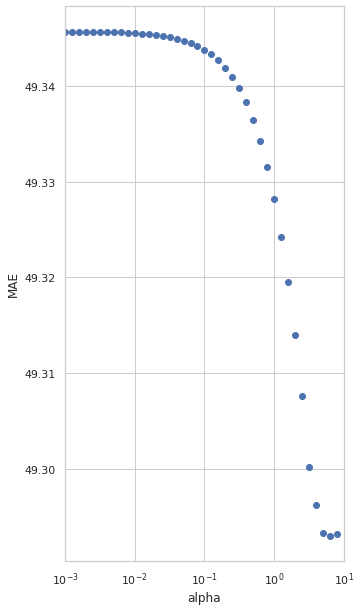

In [483]:
alphas = 0.0001 * 10**np.arange(1,5,0.1)
maes = []
for alpha in alphas:
    lr = linear_model.Ridge(alpha = alpha)
    lr.fit(X_train_scaled, train2)

    # predict result using test data
    y_pred = lr.predict(X_test_scaled)
    maes.append(metrics.mean_absolute_error(test2, y_pred))
plt.scatter(alphas, maes)
plt.xscale('log')
plt.xlim(0.001, 10)
plt.xlabel('alpha')
plt.ylabel('MAE')

In [484]:
print('Mean Absolute Error MAE = ', '{:.3f}'.format(metrics.mean_absolute_error(test2, y_pred)))
print('Median Absolute Error MAE', '{:.3f}'.format(metrics.median_absolute_error(test2, y_pred)))
print('RMSE = ','{:.3f}'.format(np.sqrt(metrics.mean_squared_error(test2, y_pred))))
print('R2 score = ', '{:.3f}'.format(metrics.r2_score(test2, y_pred)))

Mean Absolute Error MAE =  49.293
Median Absolute Error MAE 37.881
RMSE =  67.351
R2 score =  0.548


In [485]:
# predict result using test data
y_pred = lr.predict(X_test_scaled)

df_temp = pd.DataFrame({'price':test2, 'predicted price': y_pred}).sample(10)
df_temp.apply(np.floor).astype(object)

price predicted price
3844   80.0           145.0
147   100.0           146.0
5197  378.0           284.0
682   225.0           130.0
599   109.0            92.0
3910  399.0           284.0
1346  106.0           182.0
1191  175.0           201.0
6640  109.0           102.0
2108  160.0           246.0

In [486]:
lr = linear_model.Lasso(alpha = 0.1)
lr.fit(X_train_scaled, train2)

# predict result using test data
y_pred = lr.predict(X_test_scaled)

print('Mean Absolute Error MAE = ', '{:.3f}'.format(metrics.mean_absolute_error(test2, y_pred)))
print('Median Absolute Error MAE', '{:.3f}'.format(metrics.median_absolute_error(test2, y_pred)))
print('RMSE = ','{:.3f}'.format(np.sqrt(metrics.mean_squared_error(test2, y_pred))))
print('R2 score = ', '{:.3f}'.format(metrics.r2_score(test2, y_pred)))

Mean Absolute Error MAE =  49.257
Median Absolute Error MAE 38.031
RMSE =  67.299
R2 score =  0.549


In [487]:
# predict result using test data
y_pred = lr.predict(X_test_scaled)

df_temp = pd.DataFrame({'price':test2, 'predicted price': y_pred}).sample(10)
df_temp.apply(np.floor).astype(object)

price predicted price
1267  313.0           290.0
2575  239.0           200.0
908   225.0           152.0
473   151.0           166.0
633   109.0           132.0
392   400.0           354.0
4936  185.0           165.0
497   166.0           145.0
2698  296.0           392.0
1223  251.0           291.0

*** Used Linear Regression again, but also used RidgeCV, LassoCV and ElasticNetCV now ***

In [488]:
lr = linear_model.LinearRegression()
alphas = [1000, 100, 50, 20, 10, 1, 0.1, 0.01]
l1_ratios = [0.001, 0.01, 0.05, 0.1, 0.3, 0.5, 0.7, 0.9]
ridge = linear_model.RidgeCV(alphas=alphas)
lasso = linear_model.LassoCV(alphas=alphas, max_iter=10000)
elastic = linear_model.ElasticNetCV(alphas=alphas, l1_ratio=l1_ratios)

In [489]:
for model, name in zip([lr, ridge, lasso, elastic], ['LinearRegression', 'Ridge', 'Lasso', 'ElasticNet']):
  model.fit(X_train_scaled, train2)
  y_pred_train = model.predict(X_train_scaled)
  mrse_train = np.sqrt(mean_squared_error(y_pred=y_pred_train, y_true=train2))
  y_pred = model.predict(X_test_scaled)
  mrse_test = np.sqrt(mean_squared_error(y_pred=y_pred, y_true=test2))
  best_alpha = ''
  if name != 'LinearRegression':
    best_alpha = ' best alpha: ' + str(model.alpha_)
  best_l1 = ''
  if name == 'ElasticNet':
    best_l1 = ' best l1: '+ str(model.l1_ratio_)
  print(name + ' mrse_train: ' + str(mrse_train) + ', mrse_test: ' + str(mrse_test) + best_alpha + best_l1)

LinearRegression mrse_train: 65.9378937332, mrse_test: 3.8771599137e+14
Ridge mrse_train: 65.824412695, mrse_test: 67.4223581169 best alpha: 100.0
Lasso mrse_train: 66.2482084289, mrse_test: 67.7367072119 best alpha: 1.0
ElasticNet mrse_train: 66.6150168411, mrse_test: 67.8733575885 best alpha: 1.0 best l1: 0.9


In [490]:
print(lasso.coef_)

[  0.00000000e+00  -0.00000000e+00  -4.00280222e+00  -7.49331533e-01
   2.19935525e+01   3.28618515e+01  -1.19753019e+00   2.00947922e+01
   2.55806449e-01  -1.69971196e-01   5.80472458e+00   2.20763822e+00
  -1.17629758e+01  -0.00000000e+00   0.00000000e+00   0.00000000e+00
  -0.00000000e+00   0.00000000e+00   8.00592844e+00  -0.00000000e+00
  -2.08747801e+00  -0.00000000e+00   7.20741634e+00   0.00000000e+00
   2.29710929e-01   0.00000000e+00   1.47826223e+00  -0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   3.29179456e+00
  -0.00000000e+00   0.00000000e+00  -0.00000000e+00  -0.00000000e+00
   1.14461112e+00  -1.67859020e+00   6.12341963e+00   0.00000000e+00
  -0.00000000e+00   0.00000000e+00   0.00000000e+00  -6.43103572e-01
  -3.82849102e-01   0.00000000e+00   0.00000000e+00   0.00000000e+00
   5.10397377e+00   0.00000000e+00   8.59866424e+00  -0.00000000e+00
  -2.03027734e+00   0.00000000e+00  -5.91974937e+00   0.00000000e+00
   0.00000000e+00  -4.05152995e-01

In [491]:
order = np.argsort(np.abs(lasso.coef_))[::-1]
for i in order:
  coef_ = lasso.coef_[i]
  if coef_ > 0:
    print(split_data.columns[i] + ', ' + str(lasso.coef_[i]))

bedrooms, 32.8618515109
accommodates, 21.9935524862
review_scores_rating, 20.0947921904
Room in hotel, 8.59866424052
Entire condo, 8.00592844072
Haight Ashbury, 7.54958260517
Entire home, 7.20741633798
Presidio, 6.41828054294
Private room in hostel, 6.12341963311
Entire home/apt, 5.80472458198
Nob Hill, 5.38908139665
Room in boutique hotel, 5.10397377261
Twin Peaks, 4.32973073435
Castro/Upper Market, 3.96708838498
Private room in bed and breakfast, 3.29179455542
Potrero Hill, 3.26448971524
Western Addition, 3.04006874733
Marina, 2.66580552878
Hotel room, 2.20763821672
Russian Hill, 1.64316079323
Entire serviced apartment, 1.47826223145
Private room in guest suite, 1.14461111764
North Beach, 0.458105810081
amenities, 0.25580644945
Entire loft, 0.229710929335
Chinatown, 0.158566846587
Golden Gate Park, 0.0762065014906
Financial District, 0.0640520432259
Downtown/Civic Center, 0.0119207024475


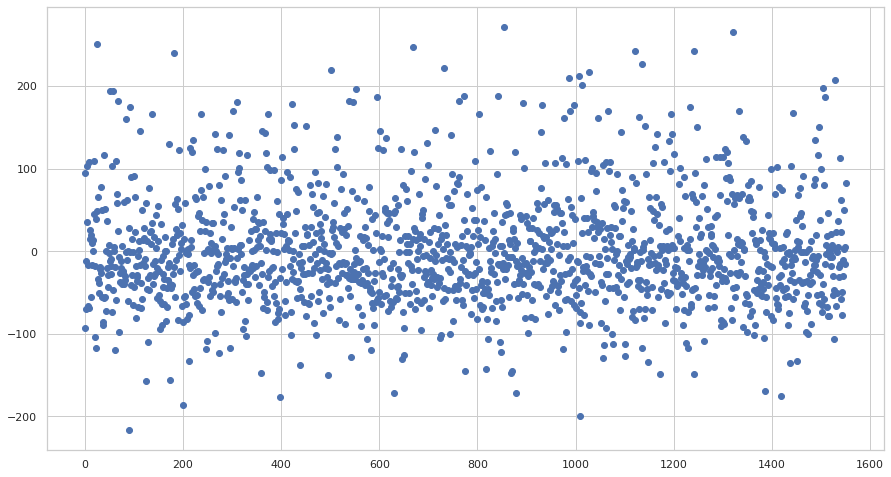

In [492]:
y_pred_train = lasso.predict(X_train_scaled)
diff = train2 - y_pred_train
plt.figure(figsize=(15,8))
plt.scatter(np.arange(len(diff)), diff)

In [493]:
train1[np.abs(diff) > 100].describe()

host_is_superhost  host_listings_count  reviews_per_month  \
count         188.000000           188.000000         188.000000   
mean            0.606383             3.276596           1.233191   
std             0.489856             7.932070           1.167428   
min             0.000000             1.000000           0.100000   
25%             0.000000             1.000000           0.380000   
50%             1.000000             1.000000           0.730000   
75%             1.000000             3.000000           1.730000   
max             1.000000            92.000000           5.040000   

       number_of_reviews  accommodates    bedrooms        beds  \
count         188.000000    188.000000  188.000000  188.000000   
mean           64.377660      4.303191    1.973404    2.367021   
std            71.526076      2.015605    0.880165    1.274336   
min            11.000000      1.000000    1.000000    1.000000   
25%            20.000000      2.750000    1.000000    1.750000   
50%            34.500000      4.000000    2.000000    2.000000   
75%            75.000000      6.000000    2.000000    3.000000   
max           464.000000     10.000000    5.000000    8.000000   

       review_scores_rating   amenities  instant_bookable_1  ...  \
count            188.000000  188.000000          188.000000  ...   
mean               4.869734   77.691489            0.164894  ...   
std                0.138036   39.531623            0.372075  ...   
min                4.000000   18.000000            0.000000  ...   
25%                4.817500   43.750000            0.000000  ...   
50%                4.905000   71.500000            0.000000  ...   
75%                4.962500  107.000000            0.000000  ...   
max                5.000000  197.000000            1.000000  ...   

       Potrero Hill    Presidio  Presidio Heights  Russian Hill  Seacliff  \
count    188.000000  188.000000        188.000000    188.000000     188.0   
mean       0.058511    0.010638          0.015957      0.037234       0.0   
std        0.235333    0.102866          0.125645      0.189840       0.0   
min        0.000000    0.000000          0.000000      0.000000       0.0   
25%        0.000000    0.000000          0.000000      0.000000       0.0   
50%        0.000000    0.000000          0.000000      0.000000       0.0   
75%        0.000000    0.000000          0.000000      0.000000       0.0   
max        1.000000    1.000000          1.000000      1.000000       0.0   

       South of Market  Twin Peaks  Visitacion Valley  West of Twin Peaks  \
count       188.000000  188.000000         188.000000          188.000000   
mean          0.037234    0.005319           0.021277            0.010638   
std           0.189840    0.072932           0.144690            0.102866   
min           0.000000    0.000000           0.000000            0.000000   
25%           0.000000    0.000000           0.000000            0.000000   
50%           0.000000    0.000000           0.000000            0.000000   
75%           0.000000    0.000000           0.000000            0.000000   
max           1.000000    1.000000           1.000000            1.000000   

       Western Addition  
count        188.000000  
mean           0.063830  
std            0.245102  
min            0.000000  
25%            0.000000  
50%            0.000000  
75%            0.000000  
max            1.000000  

[8 rows x 94 columns]

In [494]:
train1[np.abs(diff) > 80]

host_is_superhost  host_listings_count  reviews_per_month  \
5933                  0                    2               3.64   
4035                  1                    1               0.43   
6750                  0                    1               0.31   
773                   1                    1               1.05   
750                   0                    2               0.37   
...                 ...                  ...                ...   
1239                  0                    1               0.38   
2721                  1                   21               0.70   
1222                  1                    7               2.34   
1221                  0                    2               0.51   
478                   1                    1               0.53   

      number_of_reviews  accommodates  bedrooms  beds  review_scores_rating  \
5933                 16             4       2.0   1.0                  4.63   
4035                 13             3       1.0   2.0                  4.92   
6750                 36             3       2.0   2.0                  4.71   
773                  65             3       1.0   1.0                  4.95   
750                  33             5       2.0   2.0                  4.85   
...                 ...           ...       ...   ...                   ...   
1239                 29             6       3.0   4.0                  5.00   
2721                 34             2       1.0   1.0                  4.97   
1222                186             2       1.0   1.0                  4.95   
1221                 41             4       1.0   1.0                  4.83   
478                  41             6       2.0   2.0                  4.83   

      amenities  instant_bookable_1  ...  Potrero Hill  Presidio  \
5933        103                   1  ...             0         0   
4035        135                   0  ...             0         0   
6750         37                   0  ...             0         0   
773          69                   0  ...             0         0   
750         116                   1  ...             0         0   
...         ...                 ...  ...           ...       ...   
1239         65                   0  ...             0         0   
2721         59                   0  ...             0         0   
1222         33                   0  ...             1         0   
1221         55                   0  ...             0         0   
478          98                   0  ...             0         0   

      Presidio Heights  Russian Hill  Seacliff  South of Market  Twin Peaks  \
5933                 0             0         0                0           0   
4035                 0             0         0                1           0   
6750                 0             0         0                0           0   
773                  0             0         0                0           0   
750                  0             0         0                0           0   
...                ...           ...       ...              ...         ...   
1239                 0             0         0                0           0   
2721                 0             0         0                0           0   
1222                 0             0         0                0           0   
1221                 0             0         0                0           0   
478                  0             0         0                0           0   

      Visitacion Valley  West of Twin Peaks  Western Addition  
5933                  0                   0                 1  
4035                  0                   0                 0  
6750                  0                   1                 0  
773                   0                   0                 0  
750                   0                   0                 0  
...                 ...                 ...               ...  
1239                  0               

In [495]:
train1[np.abs(diff) < 10]

host_is_superhost  host_listings_count  reviews_per_month  \
1947                  0                   43               0.81   
693                   1                    1               5.15   
1721                  0                    7               1.24   
4286                  0                   10               3.55   
3542                  1                    1               2.49   
...                 ...                  ...                ...   
2192                  1                    2               3.19   
1                     1                    1               2.28   
1512                  1                    6               3.20   
1260                  0                    1               2.26   
5137                  0                    3               1.07   

      number_of_reviews  accommodates  bedrooms  beds  review_scores_rating  \
1947                 47             1       1.0   1.0                  4.70   
693                 474             2       1.0   1.0                  4.95   
1721                 80             1       1.0   1.0                  4.60   
4286                 93             1       1.0   2.0                  4.29   
3542                 92             2       1.0   1.0                  4.93   
...                 ...           ...       ...   ...                   ...   
2192                184             2       1.0   1.0                  4.97   
1                   371             3       1.0   2.0                  4.86   
1512                226             1       1.0   1.0                  4.81   
1260                174             2       1.0   1.0                  4.86   
5137                 11             2       1.0   1.0                  4.36   

      amenities  instant_bookable_1  ...  Potrero Hill  Presidio  \
1947         41                   1  ...             0         0   
693          98                   0  ...             0         0   
1721         30                   1  ...             0         0   
4286         29                   1  ...             0         0   
3542         29                   0  ...             0         0   
...         ...                 ...  ...           ...       ...   
2192        184                   1  ...             1         0   
1           144                   0  ...             0         0   
1512         83                   0  ...             0         0   
1260         37                   0  ...             0         0   
5137         57                   1  ...             0         0   

      Presidio Heights  Russian Hill  Seacliff  South of Market  Twin Peaks  \
1947                 0             0         0                0           0   
693                  1             0         0                0           0   
1721                 0             0         0                0           0   
4286                 0             0         0                0           0   
3542                 0             0         0                0           0   
...                ...           ...       ...              ...         ...   
2192                 0             0         0                0           0   
1                    0             0         0                0           0   
1512                 0             0         0                0           0   
1260                 0             0         0                0           0   
5137                 0             0         0                0           0   

      Visitacion Valley  West of Twin Peaks  Western Addition  
1947                  0                   0                 0  
693                   0                   0                 0  
1721                  0                   0                 0  
4286                  0                   0                 0  
3542                  0                   0                 0  
...                 ...                 ...               ...  
2192                  0               

In [496]:
high_error = train1[np.abs(diff) > 80]
print('size high error: ' + str(len(high_error)))
low_error = train1[np.abs(diff) < 10]
print('size low error: ' + str(len(low_error)))

size high error: 288
size low error: 226


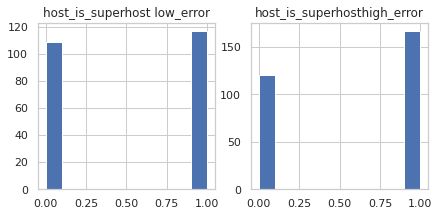

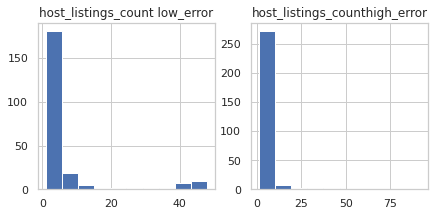

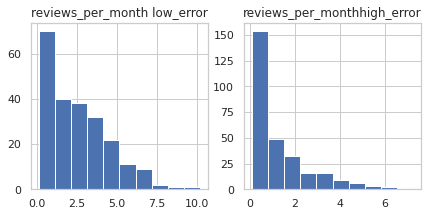

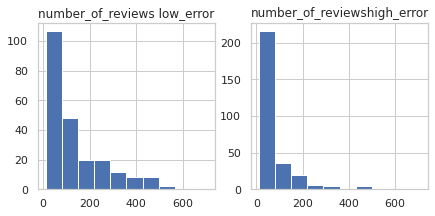

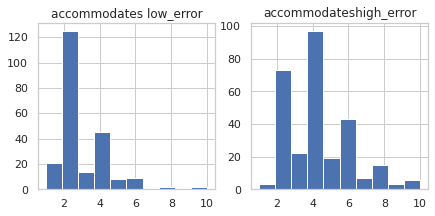

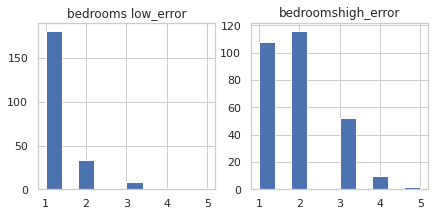

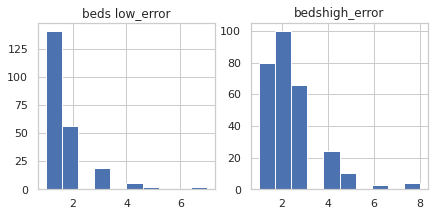

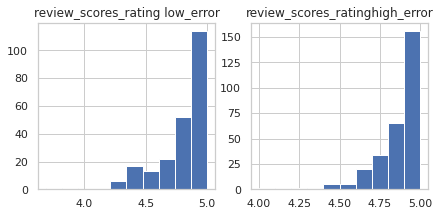

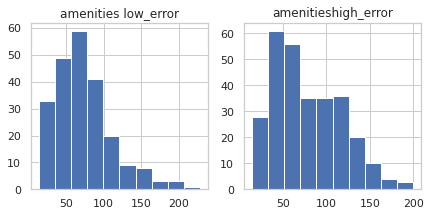

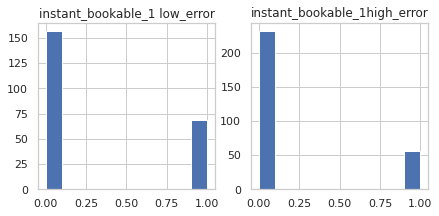

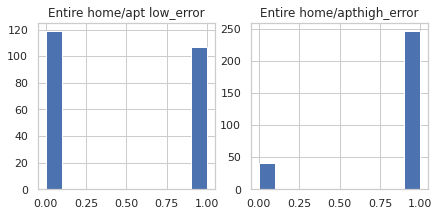

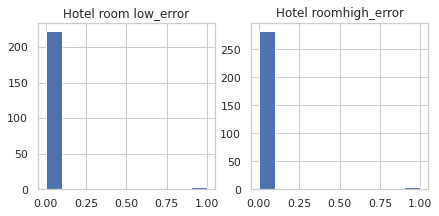

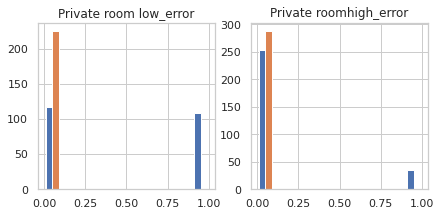

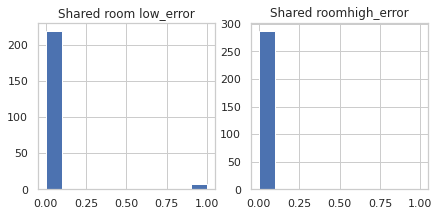

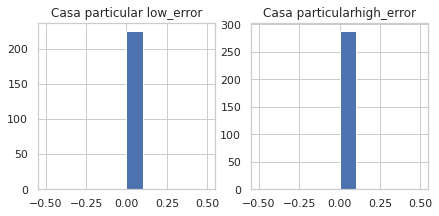

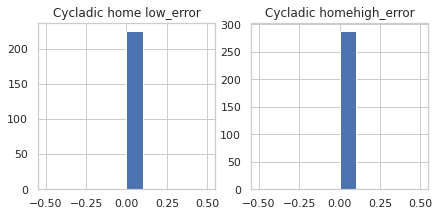

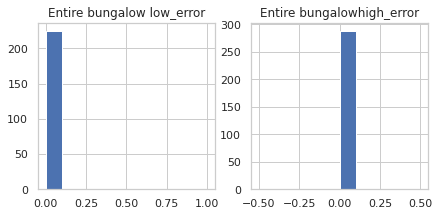

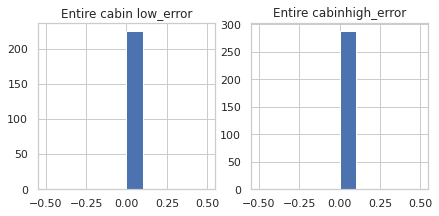

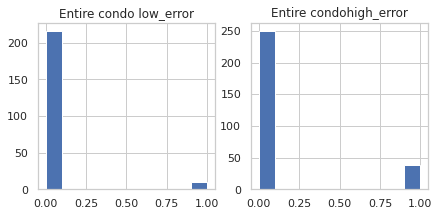

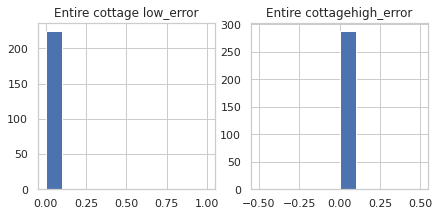

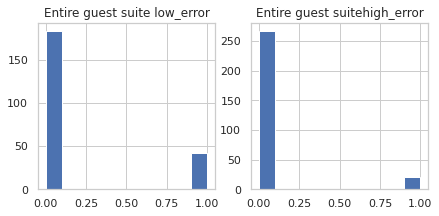

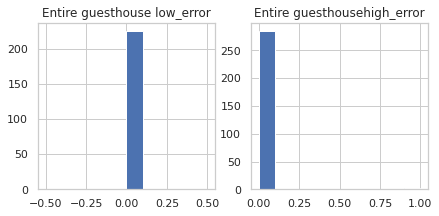

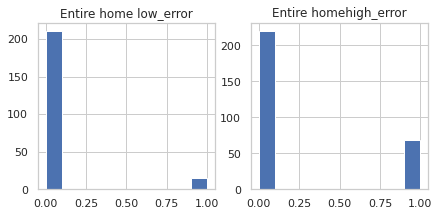

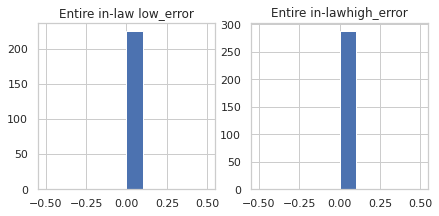

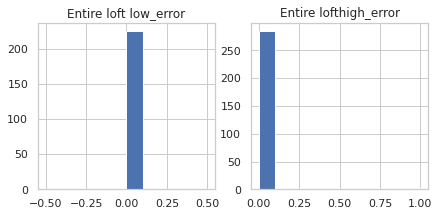

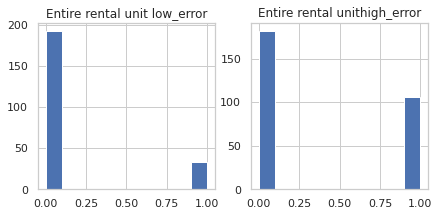

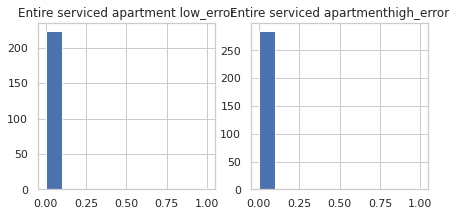

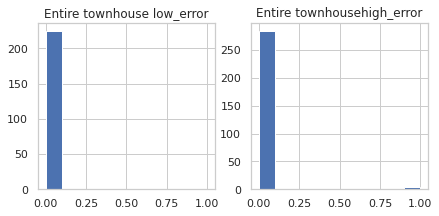

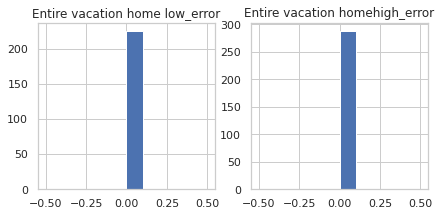

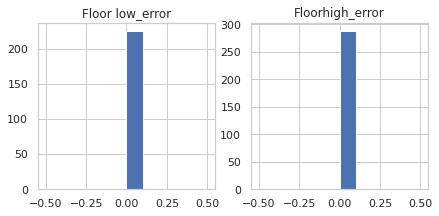

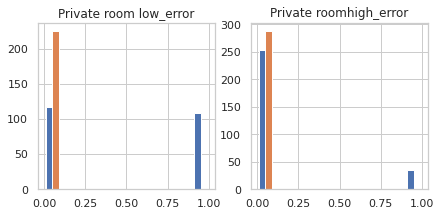

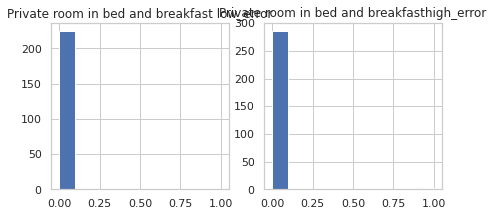

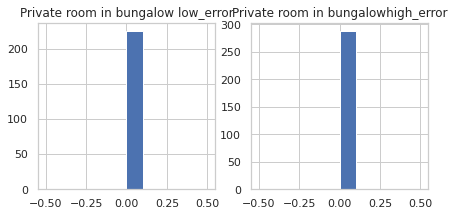

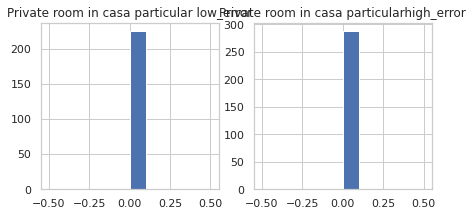

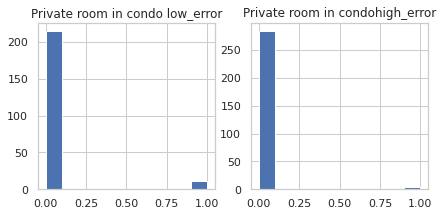

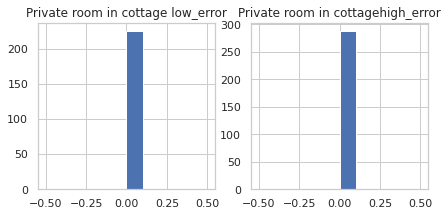

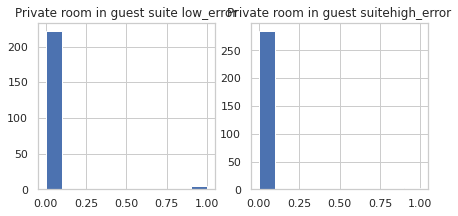

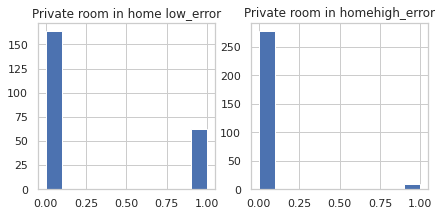

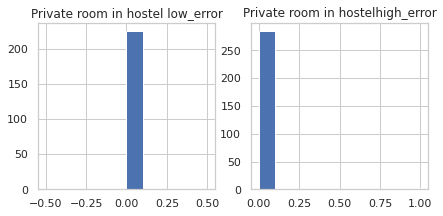

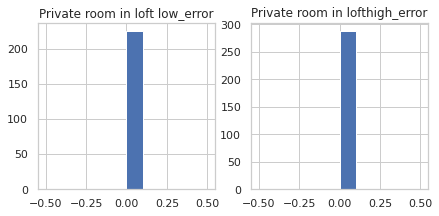

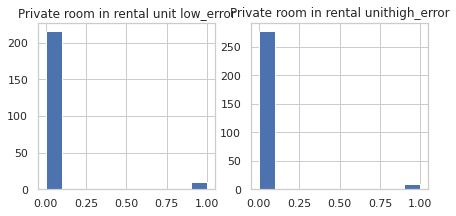

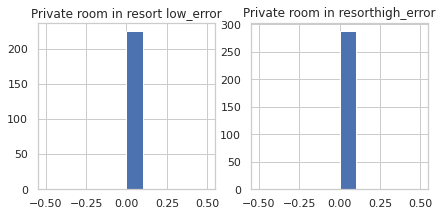

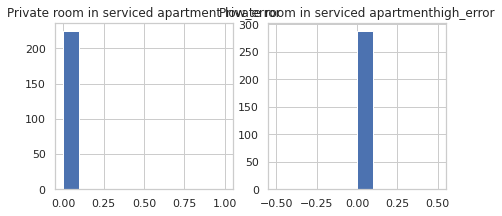

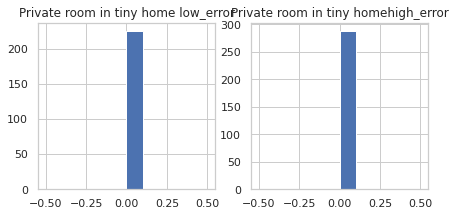

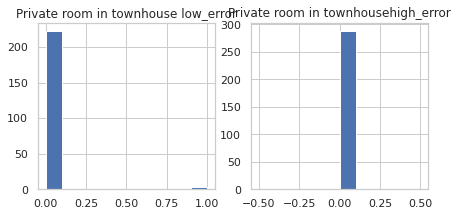

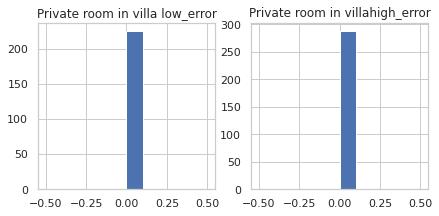

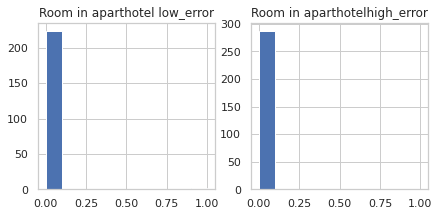

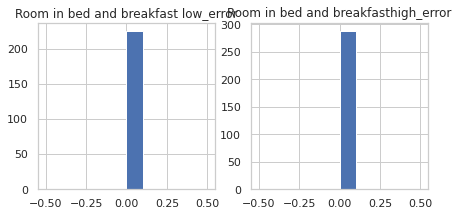

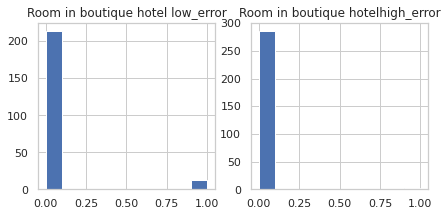

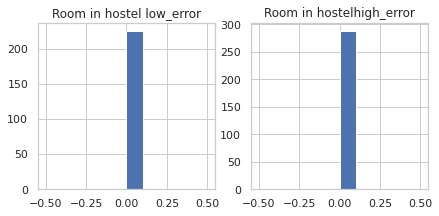

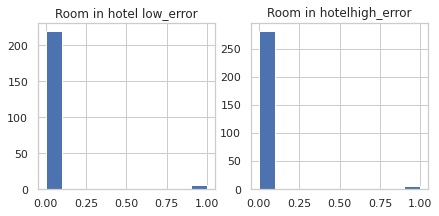

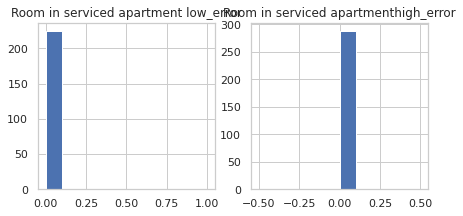

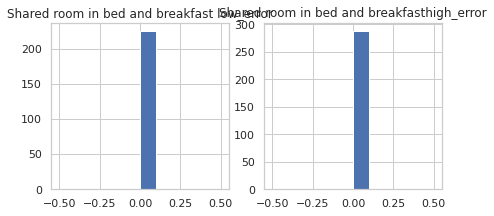

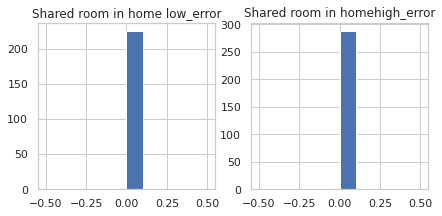

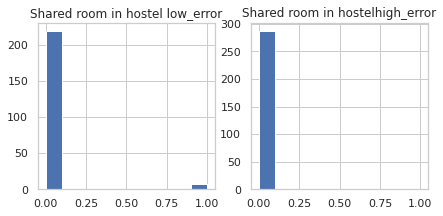

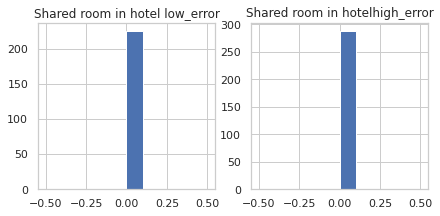

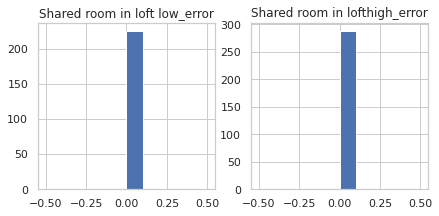

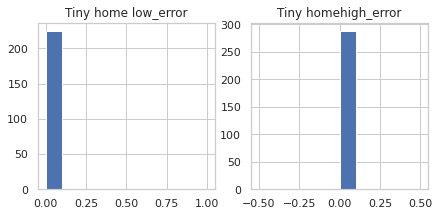

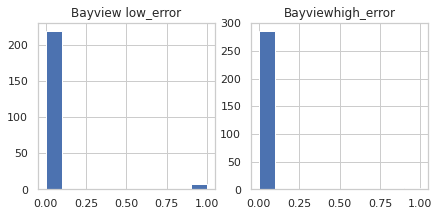

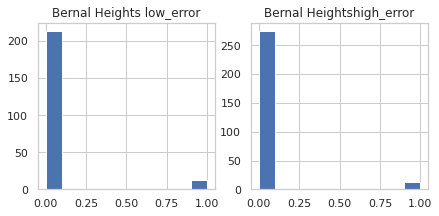

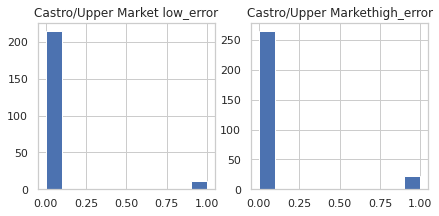

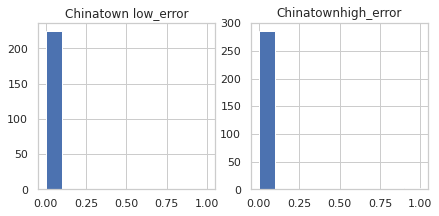

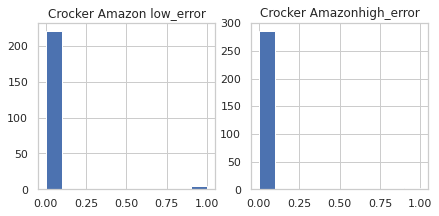

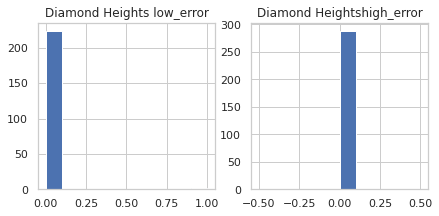

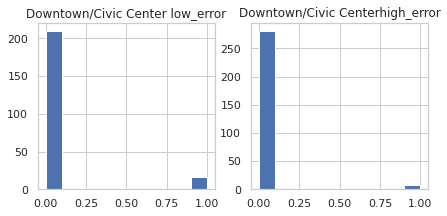

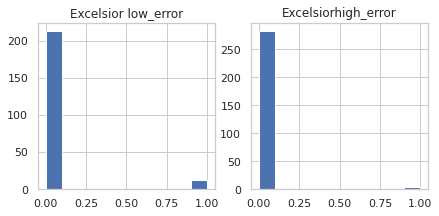

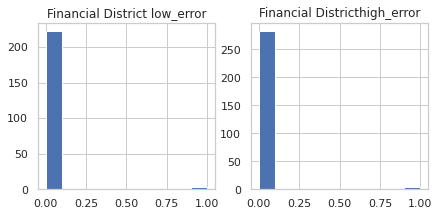

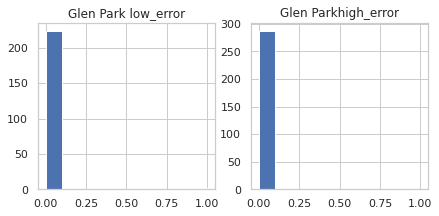

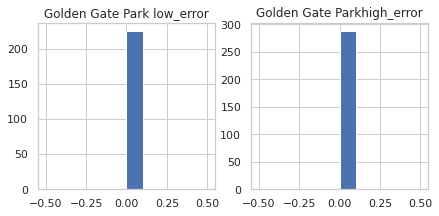

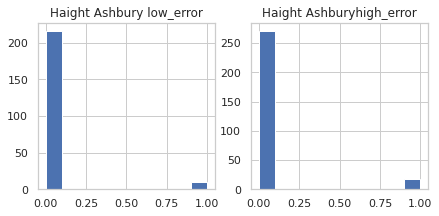

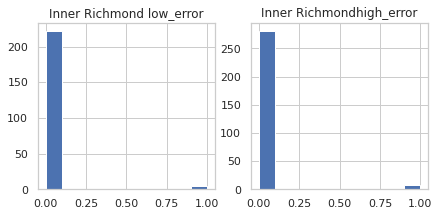

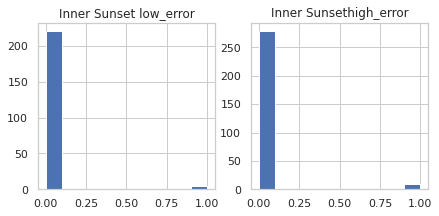

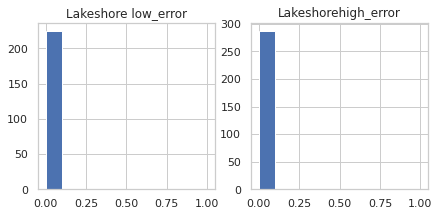

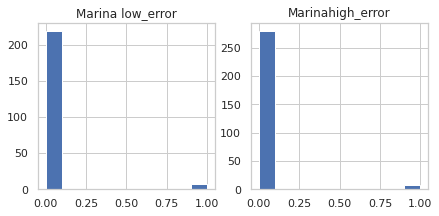

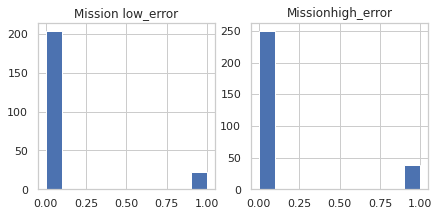

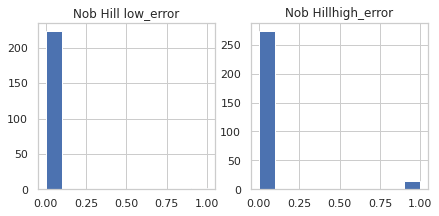

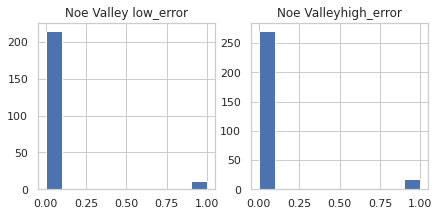

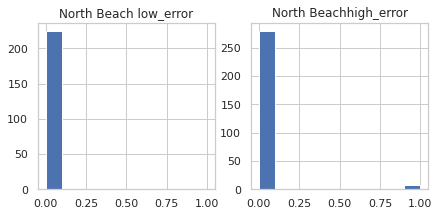

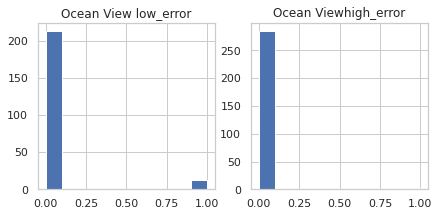

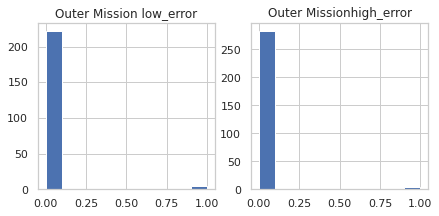

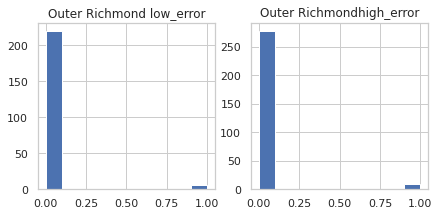

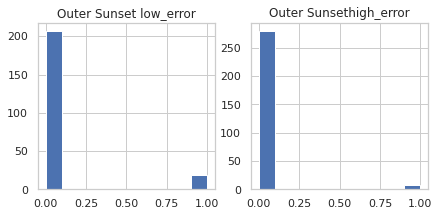

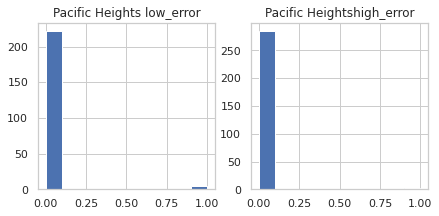

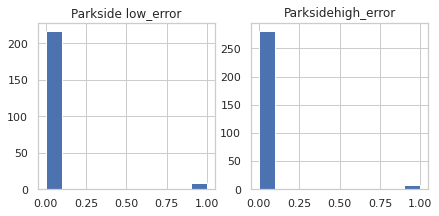

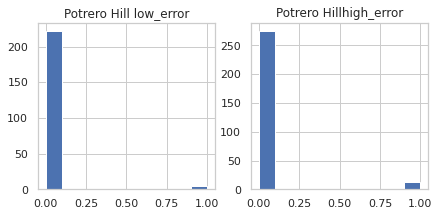

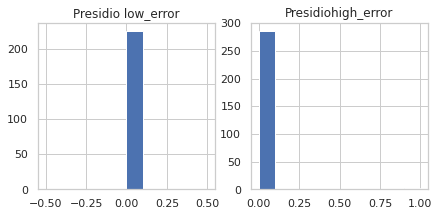

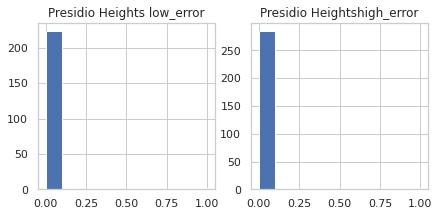

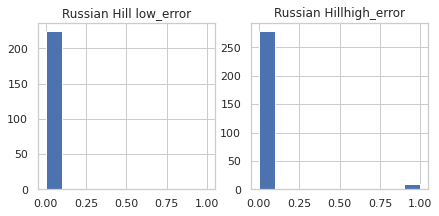

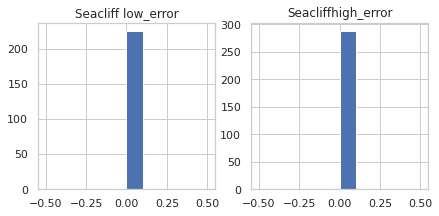

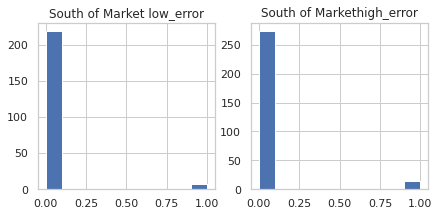

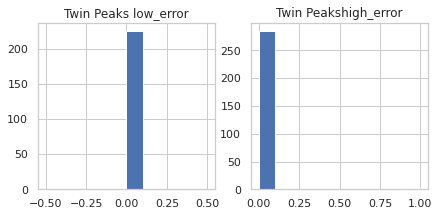

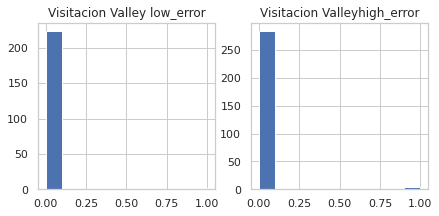

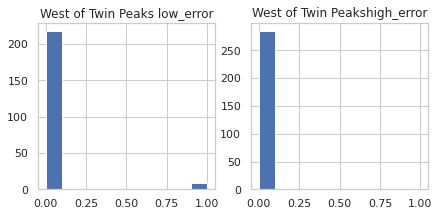

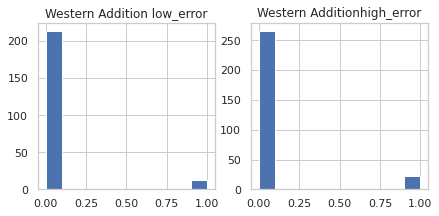

In [497]:
for c in high_error.columns:
  plt.figure(figsize=(7,3))
  plt.subplot(121)
  plt.hist(low_error[c])
  plt.title(c + ' low_error')
  plt.subplot(122)
  plt.hist(high_error[c])
  plt.title(c + 'high_error')
  plt.show()

It seems that both linear regression and ridge come out to be around `$`40 of error when predicting the prices. Let's see if we can lower this number by utilizing scikit learn's ensemble and GridSearchCV.

GridSearchCV is an exhausive search method over specified parameter values for an estimator.

Particularly, we want to focus on AdaBoostRegressor, GradientBoostRegressor, and BaggingRegressor for our estimators.

AdaBoostRegressor: meta-estimator that fits a regressor on the original dataset and then fits additional copies of the regressor utilizing different and adjusted weights of the errors.

GradientBoostingRegressor: estimator that allows for optimization of arbitrary differentiable loss functions, where in each stage a regression tree is fit on the negative gradient.

BaggingRegressor: it is an ensemble meta-estimator that fits base regressors each on random subsets of the original datasets and then aggregate their individual predictions to a final one. The benefit is that it reduces variance of black-box estimaor like a decision tree using randomization.

In [498]:
sklearn.metrics.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

***Decision Tree, Random Forest, XGBoost***

In [499]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train_scaled, train2)

In [500]:
y_pred = clf.predict(X_test_scaled)

In [501]:
print('Mean Absolute Error MAE = ', '{:.3f}'.format(metrics.mean_absolute_error(test2, y_pred)))
print('Median Absolute Error MAE', '{:.3f}'.format(metrics.median_absolute_error(test2, y_pred)))
print('RMSE = ','{:.3f}'.format(np.sqrt(metrics.mean_squared_error(test2, y_pred))))
print('R2 score = ', '{:.3f}'.format(metrics.r2_score(test2, y_pred)))

Mean Absolute Error MAE =  66.955
Median Absolute Error MAE 43.000
RMSE =  97.425
R2 score =  0.055


In [502]:
df_temp = pd.DataFrame({'price':test2, 'predicted price': y_pred}).sample(10)
df_temp.apply(np.floor).astype(object)

price predicted price
1019  240.0           224.0
128    53.0            78.0
51     85.0           205.0
729    80.0           108.0
3322   73.0           110.0
2839  135.0           308.0
4060  205.0           318.0
4017   58.0            90.0
2664  100.0            99.0
194   100.0            66.0

In [503]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth = 11)
clf.fit(X_train_scaled, train2)
y_pred = clf.predict(X_test_scaled)

In [504]:
print('Mean Absolute Error MAE = ', '{:.3f}'.format(metrics.mean_absolute_error(test2, y_pred)))
print('Median Absolute Error MAE', '{:.3f}'.format(metrics.median_absolute_error(test2, y_pred)))
print('RMSE = ','{:.3f}'.format(np.sqrt(metrics.mean_squared_error(test2, y_pred))))
print('R2 score = ', '{:.3f}'.format(metrics.r2_score(test2, y_pred)))

Mean Absolute Error MAE =  59.375
Median Absolute Error MAE 36.000
RMSE =  87.970
R2 score =  0.229


***Neural Network***

In [505]:
len(listing.columns)

53

In [506]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import Adam

model = Sequential([
    Dense(64, activation = 'relu', input_shape = (94,)),
    Dropout(0.1),
    Dense(32, activation = 'relu'),
    Dropout(0.1),
    Dense(1)
])
opt = Adam(learning_rate = 0.001)
model.compile(loss = 'mean_squared_error', optimizer = opt)

In [507]:
X_test_scaled.shape

(1035, 94)

In [508]:
X_val, X_test2, y_val, y_test2 = train_test_split(X_test_scaled, test2, test_size = 0.5, random_state = 42)

hist = model.fit(X_train_scaled, train2, batch_size = 32, epochs = 100, validation_data = (X_val, y_val),
                verbose = 0)
y_pred2 = model.predict(X_test2)

17/17 [==============================] - 0s 1ms/step


In [509]:
print('Mean Absolute Error MAE = ', '{:.3f}'.format(metrics.mean_absolute_error(y_test2, y_pred2)))
print('Median Absolute Error MAE', '{:.3f}'.format(metrics.median_absolute_error(y_test2, y_pred2)))
print('RMSE = ','{:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test2, y_pred2))))
print('R2 score = ', '{:.3f}'.format(metrics.r2_score(y_test2, y_pred2)))

Mean Absolute Error MAE =  46.882
Median Absolute Error MAE 32.508
RMSE =  68.185
R2 score =  0.558


In [510]:
df_temp = pd.DataFrame({'price':y_test2, 'predicted price': y_pred2[:,0]}).sample(10)
df_temp.apply(np.floor).astype(object)

price predicted price
1737   62.0            76.0
502   208.0           197.0
3045  308.0           329.0
68    350.0           210.0
5559  265.0           162.0
2420  343.0           171.0
1020   95.0           145.0
2682  125.0           131.0
724    99.0           145.0
55     83.0           237.0

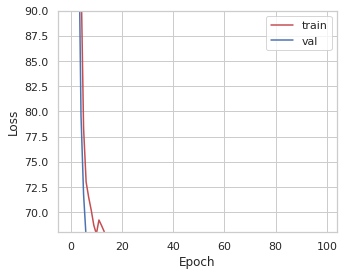

In [511]:
fig, ax = plt.subplots(1, 1, figsize=(5,4))
ax.plot(np.sqrt(hist.history['loss']), 'r', label='train')
ax.plot(np.sqrt(hist.history['val_loss']), 'b' ,label='val')
ax.set_xlabel(r'Epoch')
ax.set_ylabel(r'Loss')
ax.set_ylim(68,90)
ax.legend()

***Hyper parameter tuning***

In [512]:
from tqdm import tqdm
lrs = 0.000001 * 10**np.arange(0,8,0.2)
val_losses = []
for lr in tqdm(lrs):
    model = Sequential([
        Dense(64, activation = 'relu', input_shape = (94,)),
        Dense(32, activation = 'relu'),
        Dense(1)
    ])
    opt = Adam(learning_rate = lr)
    model.compile(loss = 'mean_squared_error', optimizer = opt)
    hist = model.fit(X_train_scaled, train2, batch_size = 32, epochs = 100, validation_data = (X_val, y_val),
                    verbose = 0)
    val_losses.append(np.sqrt(hist.history['val_loss'][-1]))

100%|██████████| 40/40 [09:05<00:00, 13.65s/it]


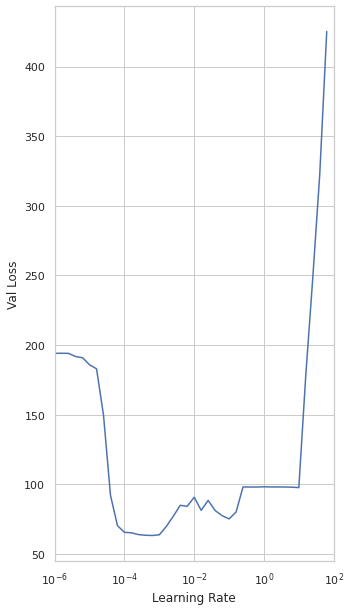

In [513]:
plt.plot(lrs, val_losses)
plt.xscale('log')
plt.xlim(0.000001, 100);
plt.xlabel('Learning Rate');
plt.ylabel('Val Loss');

In [514]:
drops = list(np.arange(0.01,0.2,0.002))
val_losses = []
for drop in tqdm(drops):
    model = Sequential([
        Dense(64, activation = 'relu', input_shape = (94,)),
        Dropout(drop),
        Dense(32, activation = 'relu'),
        Dropout(drop),
        Dense(1)
    ])
    opt = Adam(learning_rate = 0.001)
    model.compile(loss = 'mean_squared_error', optimizer = opt)
    hist = model.fit(X_train_scaled, train2, batch_size = 32, epochs = 100, validation_data = (X_val, y_val),
                    verbose = 0)
    val_losses.append(np.sqrt(hist.history['val_loss'][-1]))

100%|██████████| 95/95 [22:32<00:00, 14.24s/it]


In [515]:
y_pred2 = model.predict(X_test2)

17/17 [==============================] - 0s 1ms/step


In [516]:
print('Mean Absolute Error MAE = ', '{:.3f}'.format(metrics.mean_absolute_error(y_test2, y_pred2)))
print('Median Absolute Error MAE', '{:.3f}'.format(metrics.median_absolute_error(y_test2, y_pred2)))
print('RMSE = ','{:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test2, y_pred2))))
print('R2 score = ', '{:.3f}'.format(metrics.r2_score(y_test2, y_pred2)))

Mean Absolute Error MAE =  47.144
Median Absolute Error MAE 31.188
RMSE =  69.527
R2 score =  0.540


In [517]:
df_temp = pd.DataFrame({'price':y_test2, 'predicted price': y_pred2[:,0]}).sample(10)
df_temp.apply(np.floor).astype(object)

price predicted price
1731  149.0           197.0
533   149.0           142.0
3610  250.0           213.0
328    75.0            64.0
3370  120.0            90.0
1335  189.0           195.0
5531  221.0           233.0
464   134.0           116.0
2606   71.0            98.0
1346  106.0           171.0

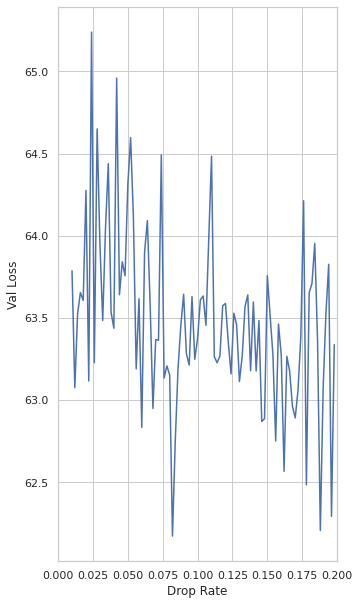

In [518]:
plt.plot(drops, val_losses)
plt.xlim(0, 0.2);
plt.xlabel('Drop Rate');
plt.ylabel('Val Loss');

In [519]:
# ada boost regressor

param_names = ["n_estimators", "learning_rate", "loss"]
param_values = [[1], [1,2], ['linear']]

parameters = dict(zip(param_names, param_values))

abr = GridSearchCV(ensemble.AdaBoostRegressor(),
                   cv = 3,
                   param_grid = parameters,
                   scoring = 'neg_median_absolute_error')
preds = abr.fit(X_train_scaled, train2)
abr_best_estimator = abr.best_estimator_

In [520]:
print('AdaBoostRegressor Mean Absolute Error MAE = ', '{:.3f}'.format(metrics.mean_absolute_error(test2, abr.predict(X_test_scaled))))
print('AdaBoostRegressor Median Absolute Error MAE', '{:.3f}'.format(metrics.median_absolute_error(test2, abr.predict(X_test_scaled))))
print('AdaBoostRegressor RMSE = ','{:.3f}'.format(np.sqrt(metrics.mean_squared_error(test2, abr.predict(X_test_scaled)))))
print('AdaBoostRegressor R2 score = ', '{:.3f}'.format(metrics.r2_score(test2, abr.predict(X_test_scaled))))

AdaBoostRegressor Mean Absolute Error MAE =  54.761
AdaBoostRegressor Median Absolute Error MAE 41.403
AdaBoostRegressor RMSE =  73.698
AdaBoostRegressor R2 score =  0.459


In [521]:
# gradient boosting regressor

param_names = ["n_estimators", "max_depth", "learning_rate", "loss", "min_samples_split"]
param_values = [[100,300,500], [1,2,3,4], [0.01, 0.02], ['absolute_error', 'squared_error'], [1.0]]

parameters = dict(zip(param_names, param_values))
gbr = GridSearchCV(ensemble.GradientBoostingRegressor(), 
                   cv = 3, 
                   param_grid = parameters, 
                   scoring='neg_median_absolute_error')
preds = gbr.fit(X_train_scaled, train2)
gbr_best_estimator = gbr.best_estimator_

In [535]:
print('GradientBoostingRegressor Mean Absolute Error MAE = ', '{:.3f}'.format(metrics.mean_absolute_error(test2, gbr.predict(X_test_scaled))))
print('GradientBoostingRegressor Median Absolute Error MAE', '{:.3f}'.format(metrics.median_absolute_error(test2, gbr.predict(X_test_scaled))))
print('GradientBoostingRegressor RMSE = ','{:.3f}'.format(np.sqrt(metrics.mean_squared_error(test2, gbr.predict(X_test_scaled)))))
print('GradientBoostingRegressor R2 score = ', '{:.3f}'.format(metrics.r2_score(test2, gbr.predict(X_test_scaled))))

GradientBoostingRegressor Mean Absolute Error MAE =  51.545
GradientBoostingRegressor Median Absolute Error MAE 33.972
GradientBoostingRegressor RMSE =  73.723
GradientBoostingRegressor R2 score =  0.459


In [536]:
# bagging regressor

param_names = ["n_estimators", "max_features", "bootstrap", "oob_score"]
param_values = [[100,500,1000], [1,5,10], [True, False], [False]]

parameters = dict(zip(param_names, param_values))
br = GridSearchCV(ensemble.BaggingRegressor(), 
                   cv = 3, 
                   param_grid = parameters, 
                   scoring='neg_median_absolute_error')
preds = br.fit(X_train_scaled, train2)
br_best_estimator = br.best_estimator_

In [537]:
print('BaggingRegressor Mean Absolute Error MAE = ', '{:.3f}'.format(metrics.mean_absolute_error(test2, br.predict(X_test_scaled))))
print('BaggingRegressor Median Absolute Error MAE', '{:.3f}'.format(metrics.median_absolute_error(test2, br.predict(X_test_scaled))))
print('BaggingRegressor RMSE = ','{:.3f}'.format(np.sqrt(metrics.mean_squared_error(test2, br.predict(X_test_scaled)))))
print('BaggingRegressor R2 score = ', '{:.3f}'.format(metrics.r2_score(test2, br.predict(X_test_scaled))))

BaggingRegressor Mean Absolute Error MAE =  66.264
BaggingRegressor Median Absolute Error MAE 56.531
BaggingRegressor RMSE =  83.741
BaggingRegressor R2 score =  0.302


In [538]:
abr_preds = abr.predict(X_test_scaled)
gbr_preds = gbr.predict(X_test_scaled)
br_preds = br.predict(X_test_scaled)

In [539]:
df_temp = pd.DataFrame({'ABR price':test2, 'ABR predicted price': abr_preds}).sample(10)
df_temp.apply(np.floor).astype(object)

ABR price ABR predicted price
865      399.0               183.0
2902     165.0                80.0
5255     212.0               215.0
393      278.0               215.0
412       98.0               117.0
5656     362.0               278.0
6713     167.0               215.0
934       95.0               117.0
1406      85.0               117.0
1442      55.0               117.0

In [540]:
df_temp = pd.DataFrame({'GBR price':test2, 'GBR predicted price': gbr_preds}).sample(10)
df_temp.apply(np.floor).astype(object)

GBR price GBR predicted price
6678     105.0               125.0
5989      90.0               130.0
6670     154.0               130.0
4387     300.0               130.0
1212     148.0               242.0
2556     113.0               145.0
901      125.0               166.0
1270     181.0               167.0
3341     180.0               247.0
36       110.0               129.0

In [541]:
df_temp = pd.DataFrame({'BR price':test2, 'BR predicted price': br_preds}).sample(10)
df_temp.apply(np.floor).astype(object)

BR price BR predicted price
2480    134.0              161.0
5104     99.0              176.0
5121    240.0              197.0
2413     68.0              170.0
5197    378.0              200.0
2964     64.0              168.0
1247    291.0              172.0
4936    185.0              169.0
4933     87.0              162.0
4733    122.0              188.0

In [542]:
gbr_best_estimator

GradientBoostingRegressor(learning_rate=0.02, loss='absolute_error',
                          max_depth=1, min_samples_split=1.0, n_estimators=500)

Let's now graph the features and their relevance based on importance.

In [543]:
gbr_best_estimator.feature_importances_

array([ 0.        ,  0.0605168 ,  0.00939604,  0.        ,  0.26333341,
        0.21129887,  0.        ,  0.11214036,  0.        ,  0.        ,
        0.19440427,  0.        ,  0.01905808,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.00894335,  0.        ,
        0.00048675,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.03889585,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.00181066,  0.        ,
        0.00228248,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.00183062,  0.        ,
        0.        ,  0.        ,  0.00054079,  0.        ,  0.00134223,
        0.03093842,  0.        ,  0.        ,  0.        ,  0.01

In [544]:
100.0 * (gbr_best_estimator.feature_importances_ / gbr_best_estimator.feature_importances_.max())

array([   0.        ,   22.9810568 ,    3.5681161 ,    0.        ,
        100.        ,   80.24005446,    0.        ,   42.58493613,
          0.        ,    0.        ,   73.82438654,    0.        ,
          7.23724372,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    3.39620621,    0.        ,
          0.18484243,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,   14.77057209,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.68759113,    0.        ,    0.8667627 ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.69517315,    0.     

<AxesSubplot: title={'center': 'Feature Importance'}>

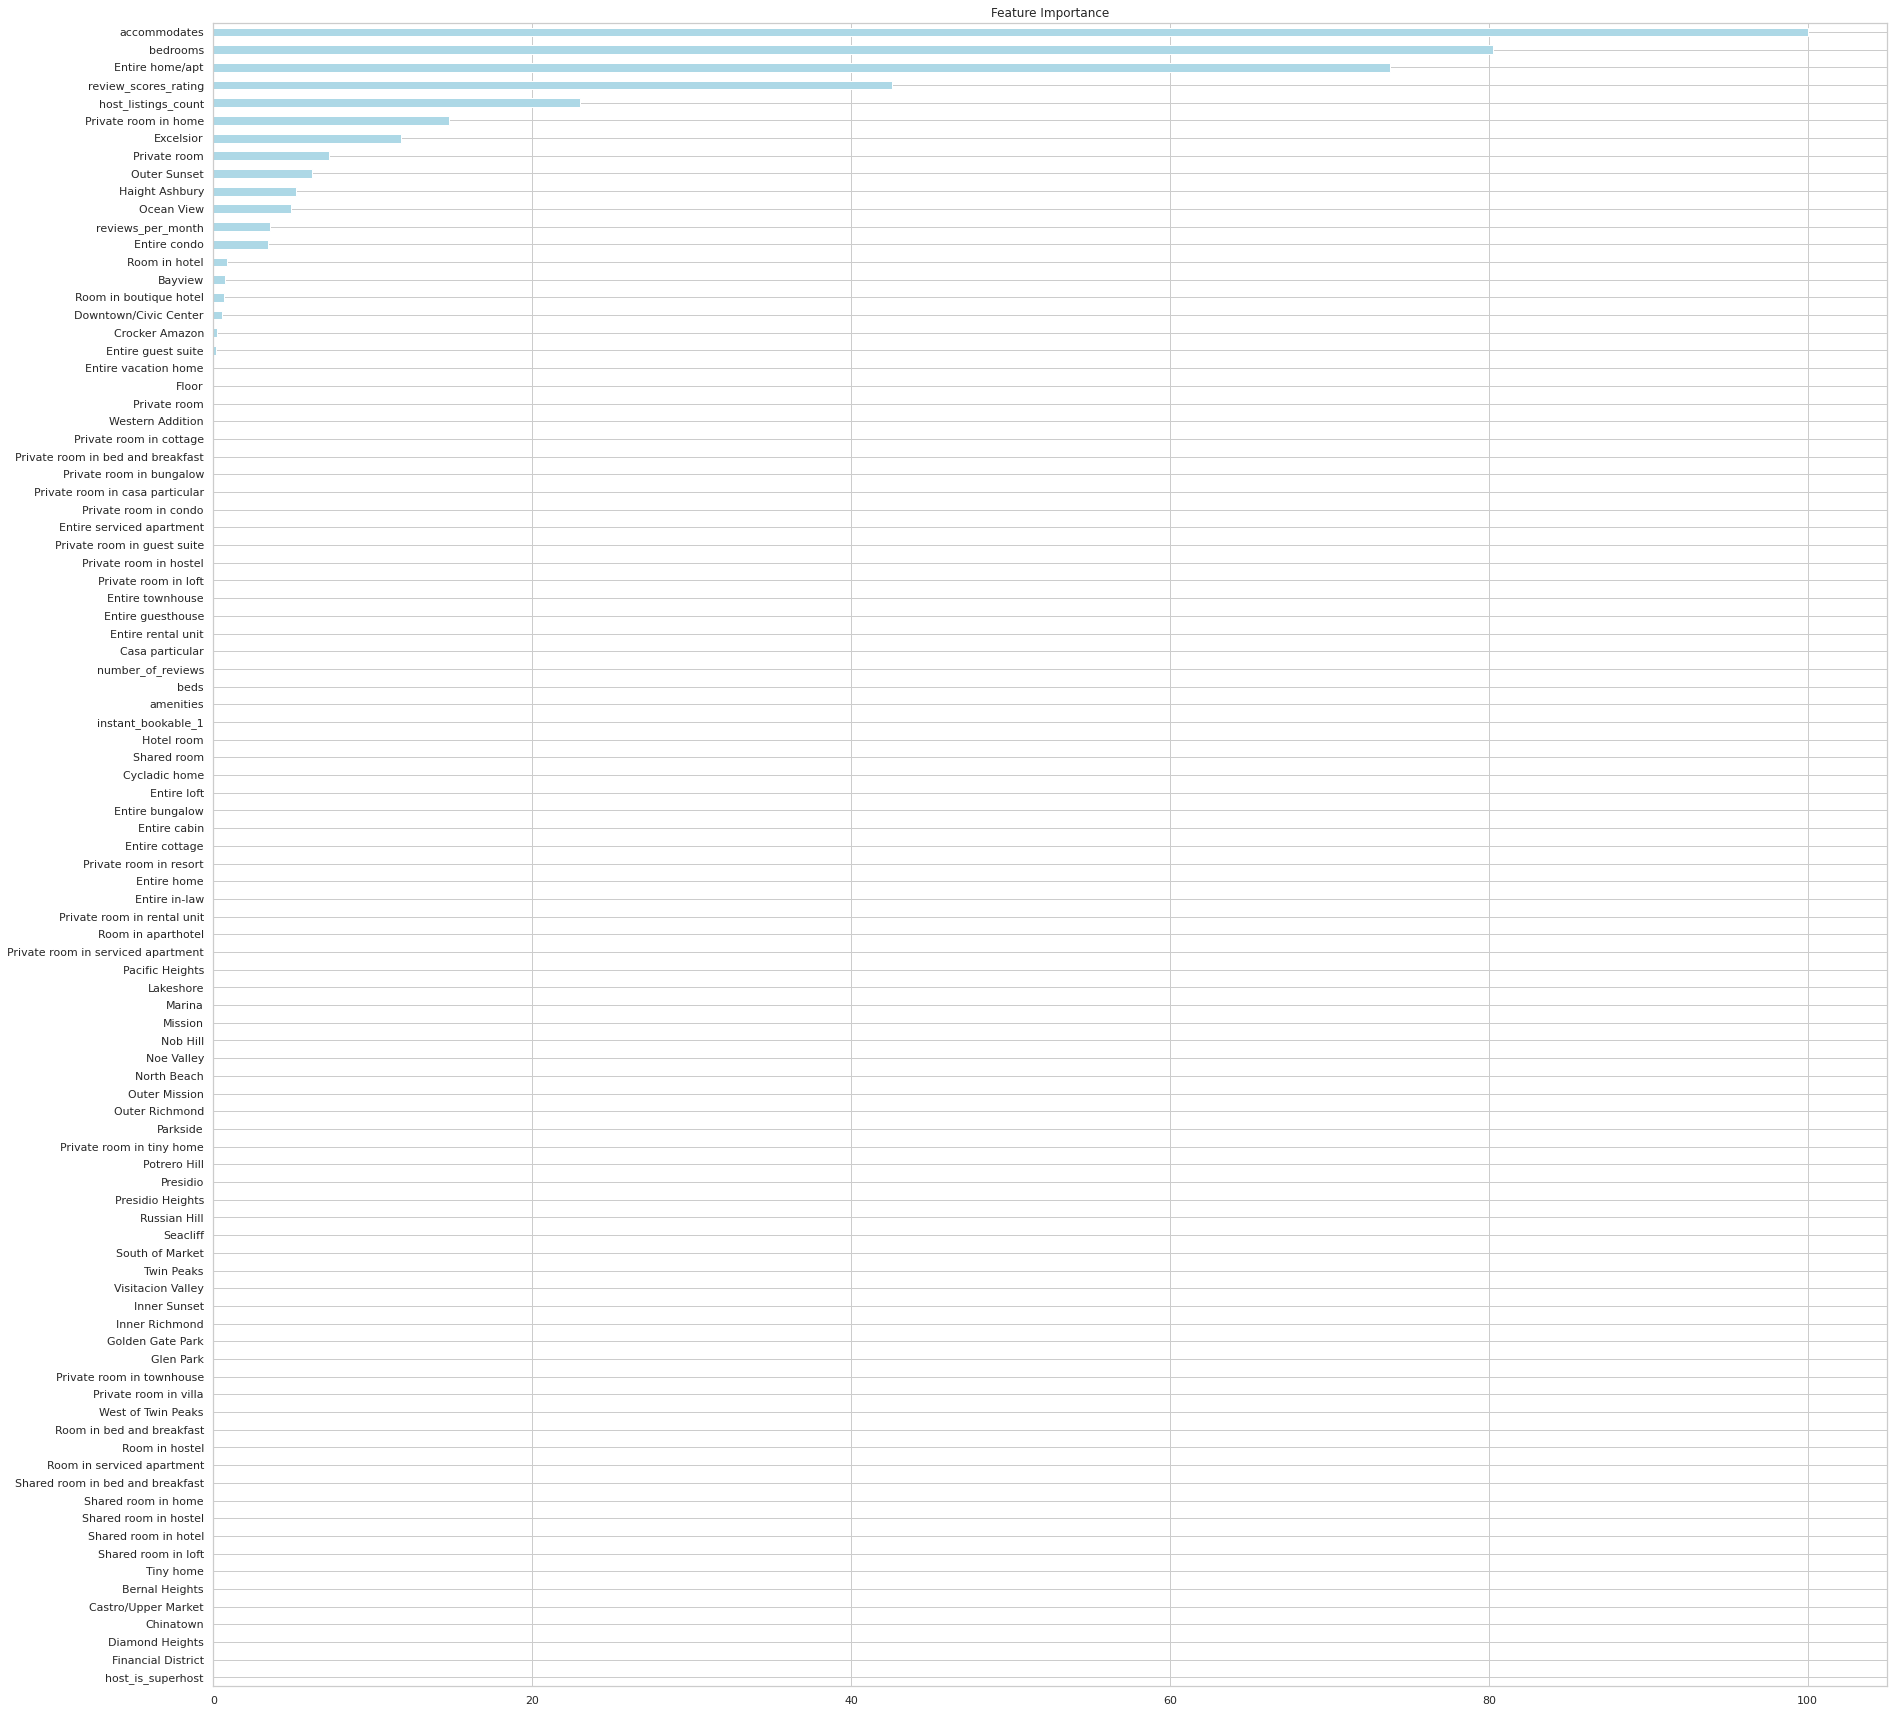

In [545]:
feature_importance = gbr_best_estimator.feature_importances_
feature_score = 100.0 * (feature_importance / feature_importance.max())

feature = pd.Series(feature_score, index = train1.columns).sort_values(ascending = True)

feature.plot(kind = 'barh',
              figsize = (30,30),
              color = 'LightBlue',
              title = 'Feature Importance')

By using GridSearchCV, we can run different combinations of selected hyper-parameters. It seems that AdaBoostRegressor and BaggingRegressor (after some tuning) arrives at similar results as our previous linear and ridge regressors. 

Gradient Boosting Regressor, however, seems to do singificantly better (error decreased by 25-30%) than all the others. We can take a closer look at the gradient boosting regressor's characteristics:

***Conclusion***

***Additional Note***

Managed to bring down baseline error compared to the original baseline through combination of Linear Regression, LassoCV, RidgeCV and ElasticNetCV by $10. I ignored those points in my data where number of reviews was less than 10 as usually there will be more number of reviews if we think about real world scenario based on domain understanding.

We really had a very noisy data and some with no reviews. I guess what some people will do is they will put their apartment for whatever maximum amount happens to be there and they will think they are set if people click and buy. Usually, people don't do this unless there is a good price. So, what runs continous and gets more reviews at the end gets more stable and is easier to predict. This is my take for this exercise and also the reasoning behind this additional note I have put here.

***In this data analysis project, I analyzed some of the most popular trends given the Airbnb's data on listings in San Francisco.***

***Summarized findings:***
- Most of the listings are clustered near the bart stations and center of the city / Most Airbnb rentals in San Francisco are in the north-east coastal areas.
- Prices in most neighbors are skewed to the right. The Downtown/Civic area, while having the lowest average price, shows a bimodal distribution. This suggests a gap between the rich and the poor.
- Superhosts, in general, provide better renting experience, their rating in all aspects were 0.02 - 0.2 higher in rating than regular hosts.
- Mission (421), Western Addition (306) and South of Market (291) at the top 3 neighborhoods with most listings
- Average price of all SF listings is `$`180.11.
- Prices vary wildly based on property and room types.
- Presidio (`$`301.83), Seacliff (`$`292.6), Twin Peaks (`$`246.34) are the most expensive neighborhoods.
- Majority of listings are rented for their entirety, although private room is a close second. This is the most important factor when people choose where to stay.
- Accomodates is the most important factor, meaning that most people who use Airbnb at SF travel in groups.
- Almost all of listings are Entire home/apt.
- Most frequent words in summaries show that more hosts talk about the surrounding area rather than the listing itself.
- Listings with prices around `$`100 - 300 get the most reviews, meaning that they are booked most often.
- We have used multiple machine learning algorithms to successfully make an estimation for Airbnb rent price. In which Gradient Boosting Regressor and Neural Network have the best performance.
- I also did few Ensemble Algorithms in this notebook if you scroll up just for experimentation.